In [1]:
from collections import Counter
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io as sio

In [2]:
# Set the seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

In [3]:
# Load the Caltech Silouttes dataset
mat_16 = sio.loadmat('data/caltech101_silhouettes_16.mat')
mat_28 = sio.loadmat('data/caltech101_silhouettes_28.mat')

In [4]:
classnames = []
selected_images = []
selected_labels = []

# Data with 16x16 images
dim = 16
images = mat_16['X']
labels = mat_16['Y']

# # Data with 28x28 images
# dim = 28
# images = mat_28['X']
# labels = mat_28['Y']

# Get classnames
for i in range(len(mat_28["classnames"][0])):
    classnames.append(mat_28["classnames"][0][i][0])

In [5]:
print(labels[0])    # contains the labels with their occurrence count
print("Number of images: ", len(images))
print("Number of labels: ", len(labels[0]))

# Count the number of occurrences of each label
label_counts = Counter(labels[0])
print("Label occurrences:", label_counts)
print("Classnames: ", classnames)

[  1   1   1 ... 101 101 101]
Number of images:  8641
Number of labels:  8641
Label occurrences: Counter({1: 798, 5: 798, 2: 435, 3: 435, 95: 235, 4: 200, 13: 128, 20: 123, 56: 114, 24: 107, 48: 100, 47: 99, 14: 98, 17: 91, 51: 88, 64: 87, 55: 86, 87: 86, 93: 86, 16: 85, 40: 85, 82: 84, 91: 84, 76: 82, 52: 80, 58: 78, 59: 78, 66: 76, 36: 75, 94: 75, 27: 73, 28: 70, 35: 68, 26: 67, 42: 67, 32: 66, 61: 66, 34: 65, 37: 64, 39: 64, 54: 64, 85: 64, 89: 64, 41: 63, 80: 63, 23: 62, 57: 61, 101: 60, 22: 59, 77: 59, 88: 59, 97: 59, 75: 57, 83: 57, 99: 56, 6: 55, 67: 55, 10: 54, 31: 54, 50: 54, 38: 53, 73: 53, 30: 51, 46: 51, 29: 50, 78: 49, 92: 49, 18: 47, 21: 47, 25: 47, 70: 47, 11: 46, 9: 45, 43: 45, 72: 45, 86: 45, 15: 43, 19: 43, 33: 43, 62: 43, 7: 42, 8: 42, 49: 42, 60: 41, 63: 40, 79: 40, 69: 39, 81: 39, 71: 38, 100: 38, 96: 37, 68: 35, 84: 35, 90: 35, 44: 34, 45: 34, 74: 34, 98: 34, 12: 32, 65: 32, 53: 31})
Classnames:  ['Airplanes Side 2', 'Faces 2', 'Faces 3', 'Leopards', 'Motorbikes 1

Classname: sea horse, Index: 83
Desired indices for sea horse: [7383 7384 7385 7386 7387 7388 7389 7390 7391 7392 7393 7394 7395 7396
 7397 7398 7399 7400 7401 7402 7403 7404 7405 7406 7407 7408 7409 7410
 7411 7412 7413 7414 7415 7416 7417 7418 7419 7420 7421 7422 7423 7424
 7425 7426 7427 7428 7429 7430 7431 7432 7433 7434 7435 7436 7437 7438
 7439]
Classname: headphone, Index: 49
Desired indices for headphone: [5403 5404 5405 5406 5407 5408 5409 5410 5411 5412 5413 5414 5415 5416
 5417 5418 5419 5420 5421 5422 5423 5424 5425 5426 5427 5428 5429 5430
 5431 5432 5433 5434 5435 5436 5437 5438 5439 5440 5441 5442 5443 5444]
Number of images selected:  4


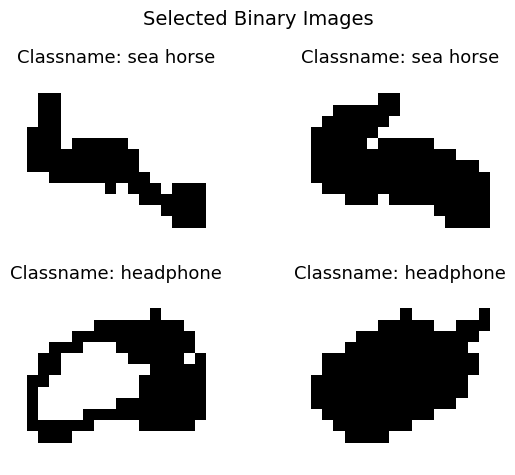

In [6]:
# Multiple labels, One or more images per label
num_labels = 2
num_images_per_label = 2

desired_classnames = ['sea horse', 'headphone', 'electric guitar', 'ant', 'bass', 'Leopards', 'accordion', 'beaver', 'binocular', 'bonsai']
# desired_classnames = ['electric guitar', 'ant', 'bass', 'Leopards', 'accordion', 'beaver', 'binocular', 'bonsai', 'brain', 'buddha']
# desired_classnames = ['binocular', 'starfish', 'flamingo', 'brontosaurus', 'accordion', 'beaver', 'binocular', 'bonsai', 'brain', 'buddha']

# Select up to the number of labels
desired_classnames = desired_classnames[:num_labels]

# Check if the number of labels match the number of desired classnames
assert num_labels == len(desired_classnames), "The number of labels must match the number of desired classnames."

# Check if the desired classnames are in the classnames
assert all(classname in classnames for classname in desired_classnames), "All desired classnames must be in the classnames."

# Select the images for the number of labels and images per label
classname_indices = []
desired_indices = []

for i, classname in enumerate(desired_classnames):
    classname_indices.append(classnames.index(classname) + 1)   # FIXME: indexing is off for nosiy inputs
    print(f"Classname: {classname}, Index: {classname_indices[i]}")
    print(f"Desired indices for {classname}: {np.where(labels[0] == classname_indices[i])[0]}")
    desired_indices.append(np.where(labels[0] == classname_indices[i])[0])

fig, ax = plt.subplots(num_labels, num_images_per_label)
fig.suptitle("Selected Binary Images", fontsize=14)

if num_labels == 1:
    ax = np.expand_dims(ax, axis=0)

# Get and show the selected images
for i in range(num_labels):
    for j in range(num_images_per_label):
        image = images[desired_indices[i][j]].reshape(dim, dim)
        selected_images.append(torch.Tensor(image))
        selected_labels.append(desired_classnames[i])
        
        if num_images_per_label == 1:
            ax[i].set_title(f"Classname: {desired_classnames[i]}", fontsize=13)
            ax[i].imshow(image, cmap='gray')
            ax[i].axis('off')
        else:
            ax[i, j].set_title(f"Classname: {desired_classnames[i]}", fontsize=13)
            ax[i, j].imshow(image, cmap='gray')
            ax[i, j].axis('off')

print("Number of images selected: ", min(num_labels * num_images_per_label, len(selected_images)))
plt.tight_layout()
plt.savefig('./images/init/selected_images.png')
plt.show()
plt.close(fig)

In [7]:
# Convert input image to binary patterns with values 1 and -1
binary_inputs = []

for i in range(len(selected_images)):
    binary_input = torch.where(selected_images[i] > 0, torch.tensor(1), torch.tensor(-1))
    binary_input = binary_input.view(dim, dim)
    binary_inputs.append(binary_input)

Number of selected images:  4
Unique values in weight matrix:  tensor([-1.0000, -0.5000,  0.0000,  0.5000,  1.0000])


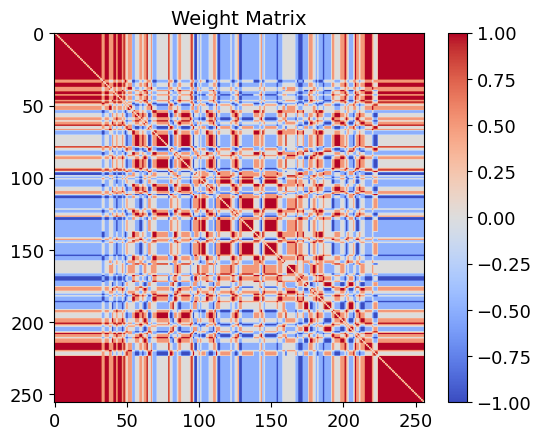

In [8]:
# From the selected images, build the weight matrix
print("Number of selected images: ", len(selected_images))

num_neurons = dim**2
weight = torch.zeros(num_neurons, num_neurons)
num_inputs = len(selected_images)

# Apply Hopfield weight matrix formula
for input in binary_inputs:
	flattened_binary_input = torch.flatten(input).unsqueeze(dim=1)
	weight += torch.matmul(flattened_binary_input, flattened_binary_input.T)

# No recurrent weights
weight.fill_diagonal_(0)

# Normalize weight values
weight /= num_inputs

print("Unique values in weight matrix: ", torch.unique(weight))

weight_map = plt.imshow(weight, cmap=cm.coolwarm)
color_bar = plt.colorbar(weight_map)
color_bar.ax.tick_params(labelsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Weight Matrix", fontsize=14)
plt.savefig('./images/init/init_weight_matrix.png')
plt.show()

In [9]:
# Model parameters
flipped_percents = [25, 50, 75]
bias = torch.zeros(weight.size(0)).float()
num_iterations = 50

length of removed percents 3
length of binary inputs 4
classname indices:  [83 83 49 49]


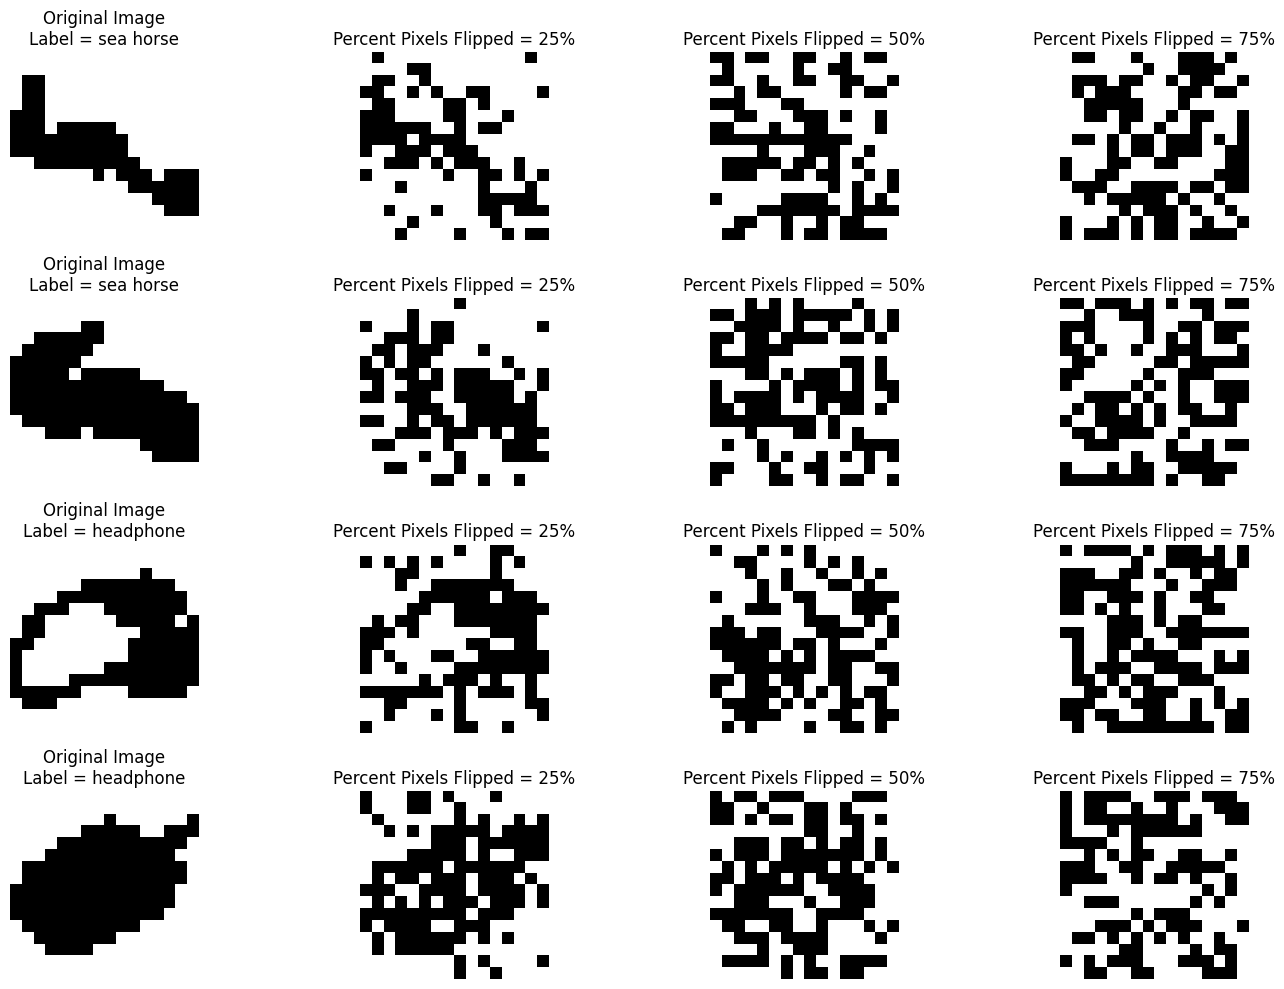

In [10]:
def flip_pixels(pattern, percent):
    pattern = torch.Tensor(pattern)
    num_pixels = pattern.numel()
    num_pixels_to_remove = int(num_pixels * percent / 100)
    indices_to_remove = np.random.choice(range(num_pixels), num_pixels_to_remove)
    noisy_pattern = pattern.clone()
    flattened_noisy_pattern = noisy_pattern.flatten()
    flattened_noisy_pattern[indices_to_remove] *= -1
    
    return flattened_noisy_pattern

noisy_inputs = []

# Get noisy inputs
for i in range(len(binary_inputs)):
    for j in range(len(flipped_percents)):
        noisy_inputs.append(flip_pixels(binary_inputs[i], flipped_percents[j]))

def plot_noisy_inputs(binary_inputs, noisy_inputs, flipped_percents, classnames, classname_indices, num_images_per_label):
    num_rows = len(binary_inputs)
    num_cols = len(flipped_percents) + 1
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    print("length of removed percents", len(flipped_percents))
    print("length of binary inputs", len(binary_inputs))

    classname_indices = np.repeat(classname_indices, num_images_per_label)
    print("classname indices: ", classname_indices)
    
    # Ensure axs is always 2D
    if num_rows == 1 or num_cols == 1:
        axs = np.atleast_2d(axs).reshape(num_rows, num_cols)
    
    for i in range(num_rows):
        for j in range(num_cols):
            # Plot the binary inputs
            if j == 0:
                classname = classnames[classname_indices[i] - 1]
                axs[i, j].set_title(f'Original Image\nLabel = {classname}', fontsize=12)
                axs[i, j].imshow(binary_inputs[i].reshape(dim, dim), cmap='gray')
                axs[i, j].axis('off')
            # Plot the noisy inputs
            else:
                idx = i * len(flipped_percents) + j - 1
                axs[i, j].set_title(f'Percent Pixels Flipped = {flipped_percents[j - 1]}%', fontsize=12)
                axs[i, j].imshow(noisy_inputs[idx].reshape(dim, dim), cmap='gray')
                axs[i, j].axis('off')

    plt.tight_layout()
    plt.savefig('./images/init/noisy_inputs.png')
    plt.show()
    plt.close(fig)

plot_noisy_inputs(binary_inputs, noisy_inputs, flipped_percents, classnames, classname_indices, num_images_per_label)

In [11]:
class HopfieldNetwork():
    def __init__(self, num_neurons, weight, bias):
        self.num_neurons = num_neurons
        self.weight = weight
        self.bias = bias
        self.is_async_update = True
        self.energy_values = []

    def compute_energy(self, state) -> float:
        return -0.5 * torch.dot(state.T, torch.matmul(self.weight, state)) - torch.dot(self.bias, state)

    def update(self, input_pattern, num_iter) -> torch.Tensor:
        curr_state = input_pattern.clone()
        curr_state = curr_state.float()
        curr_energy = self.compute_energy(curr_state)
        
        # Asychronous update rule
        if self.is_async_update:
            for i in range(num_iter):
                neuron_indices = list(range(self.num_neurons))
                np.random.shuffle(neuron_indices)
                for idx in neuron_indices:
                    new_state = torch.sign(torch.matmul(self.weight[idx], curr_state) - self.bias[idx])
                    new_state[new_state == 0] = -1
                    curr_state[idx] = new_state
                
                # Check convergence condition
                new_energy = self.compute_energy(curr_state)
                self.energy_values.append(new_energy)
                
                if curr_energy == new_energy:
                    return curr_state
                    
                curr_energy = new_energy
        # Sychronous update rule
        else:
            for _ in range(num_iter):
                new_state = torch.sign(torch.matmul(self.weight, curr_state) - self.bias)
                curr_state = new_state
                
                # Check convergence
                new_energy = self.compute_energy(curr_state)
                
                if curr_energy == new_energy:
                    return curr_state

                curr_energy = new_energy
        
        return curr_state

    def retrieve(self, dim, weight, binary_inputs, noisy_inputs, flipped_percents, num_iter, async_update, pruning, show_plot) -> list:
        self.pruning_method = None
        
        # If there is a valid pruning method, plot with that pruning
        if pruning is not None:
            self.pruning_method = next(iter(pruning))
            self.pruning_val = pruning[f'{self.pruning_method}']
        
        # Select pruning method
        if self.pruning_method not in ["sparse", "magnitude"]:
            self.pruning_method = "retrieved"

        retrieved_str = ""
        plot_name = self.pruning_method
        
        if self.pruning_method == "sparse":
            retrieved_str = f"Sparsity = {self.pruning_val}"
            plot_name += "_" + str(self.pruning_val)
        elif self.pruning_method == "magnitude":
            retrieved_str = f"Magnitude = {self.pruning_val:.2f}"
            plot_name += "_" + str(self.pruning_val)

        retrieved_patterns = []
    
        # Process the noisy inputs and retrieve patterns
        for i in range(len(noisy_inputs)):
            noisy_input = noisy_inputs[i]
            flattened_noisy_input = noisy_input.flatten()
            retrieved_input = self.update(flattened_noisy_input, num_iter)
            retrieved_patterns.append(retrieved_input)
        
        if show_plot:
            for i, removed_percent in enumerate(flipped_percents):
                fig, axs = plt.subplots(len(binary_inputs), 3, figsize=(15, 5 * len(binary_inputs)))
                
                # Ensure axs is always a 2D array
                if len(binary_inputs) == 1:
                    axs = np.expand_dims(axs, axis=0)
                
                for j in range(len(binary_inputs)):
                    noisy_index = i * len(binary_inputs) + j
                    noisy_input = noisy_inputs[noisy_index]
                    retrieved_input = retrieved_patterns[noisy_index]
                    
                    # Plot title
                    if j == 0:
                        axs[j, 0].set_title('Original Input', fontsize=20)
                        axs[j, 1].set_title(f'Percent Pixels Flipped = {removed_percent}%\nNoisy Input', fontsize=20)
                    
                        if retrieved_str == "":
                            axs[j, 2].set_title(f'Retrieved Pattern', fontsize=20)
                        else:
                            axs[j, 2].set_title(f'Retrieved Pattern\n{retrieved_str}', fontsize=20)
                        
                    # Plot the original input
                    axs[j, 0].imshow(binary_inputs[j].view(dim, dim), cmap='gray')
                    axs[j, 0].axis('off')

                    # Plot the noisy input
                    axs[j, 1].imshow(noisy_input.view(dim, dim), cmap='gray')
                    axs[j, 1].axis('off')

                    # Plot the retrieved input
                    axs[j, 2].imshow(retrieved_input.view(dim, dim), cmap='gray')
                    axs[j, 2].axis('off')
                
                plt.tight_layout()
                plt.savefig(f'./images/retrieved/{plot_name}_fig_removed_{removed_percent}.png')
                plt.show()
                plt.close(fig)
        
        return retrieved_patterns

C:\Users\brian\AppData\Local\Temp\ipykernel_20484\1865536940.py:10: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3641.)
  return -0.5 * torch.dot(state.T, torch.matmul(self.weight, state)) - torch.dot(self.bias, state)


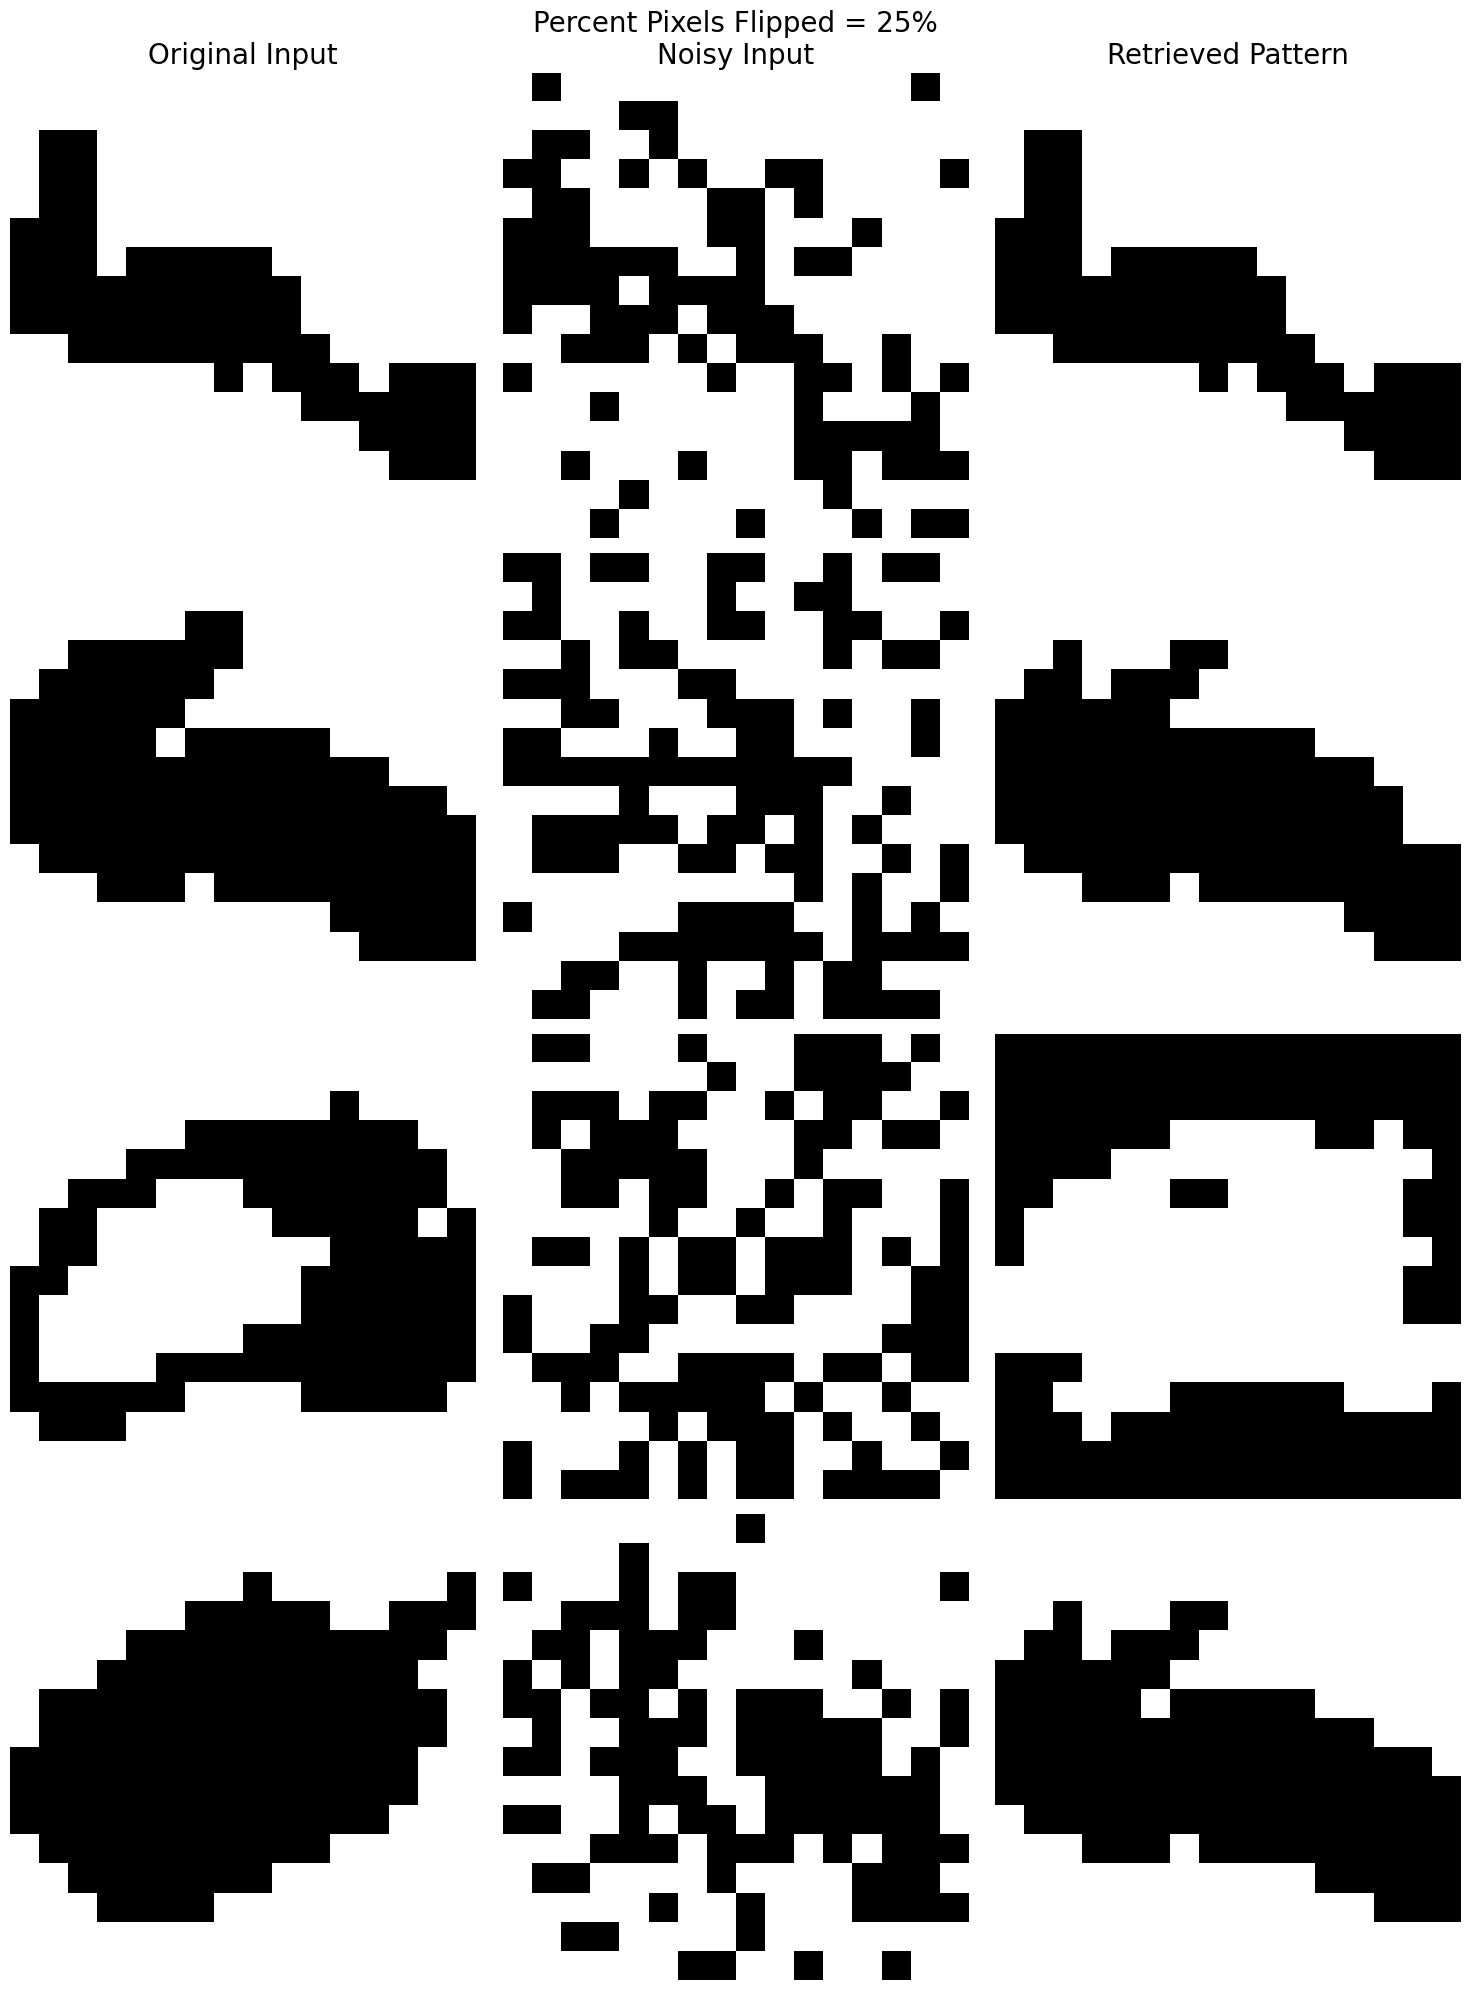

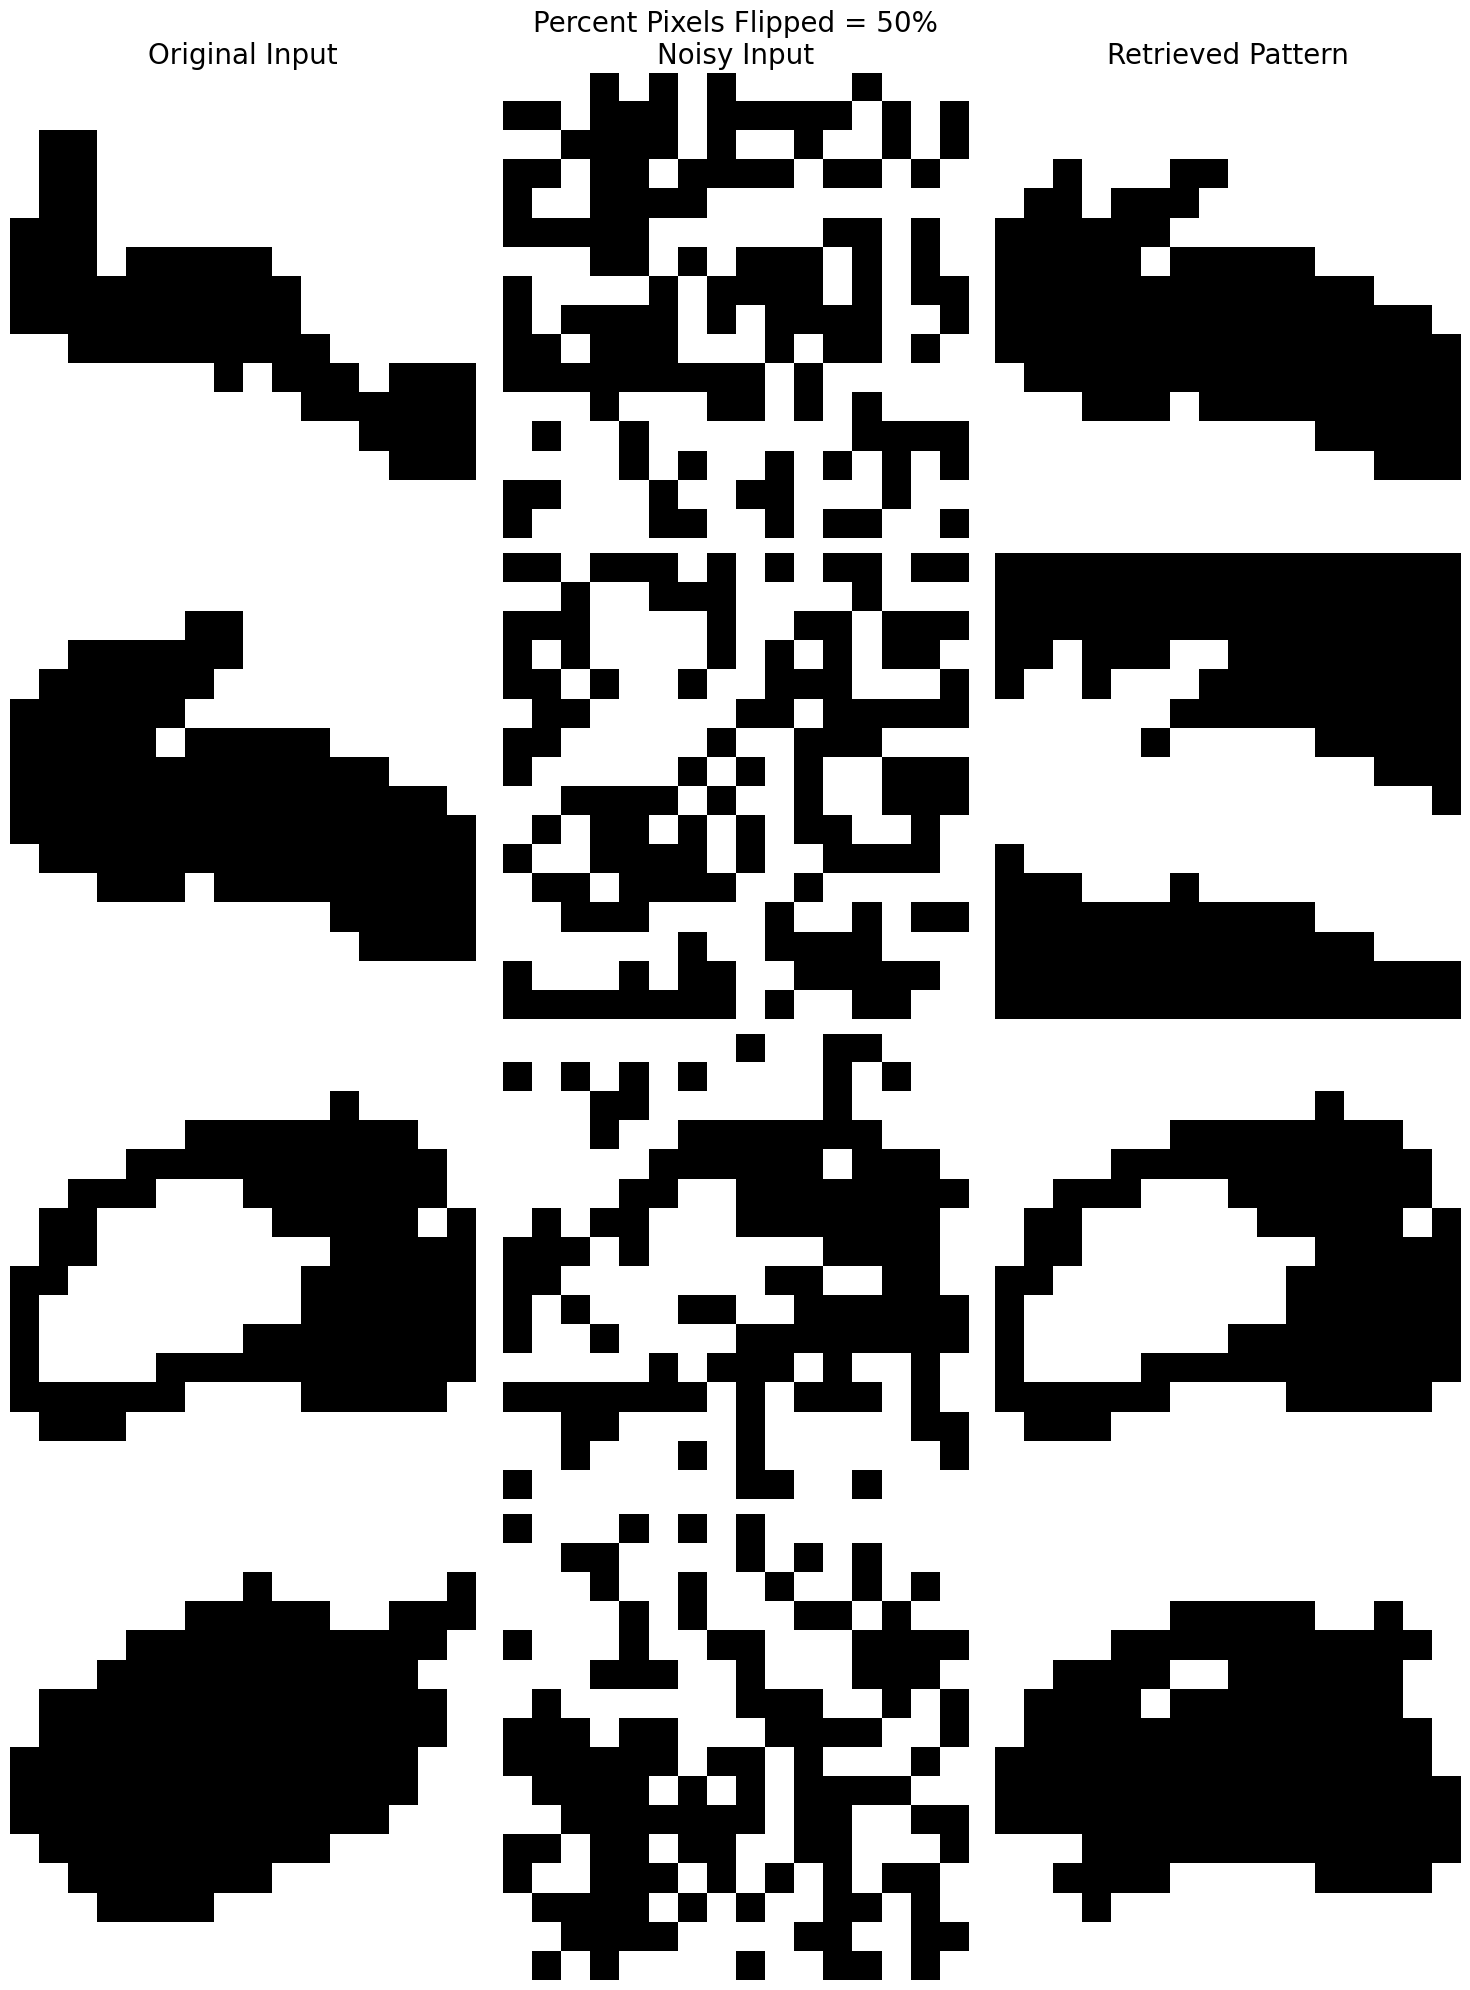

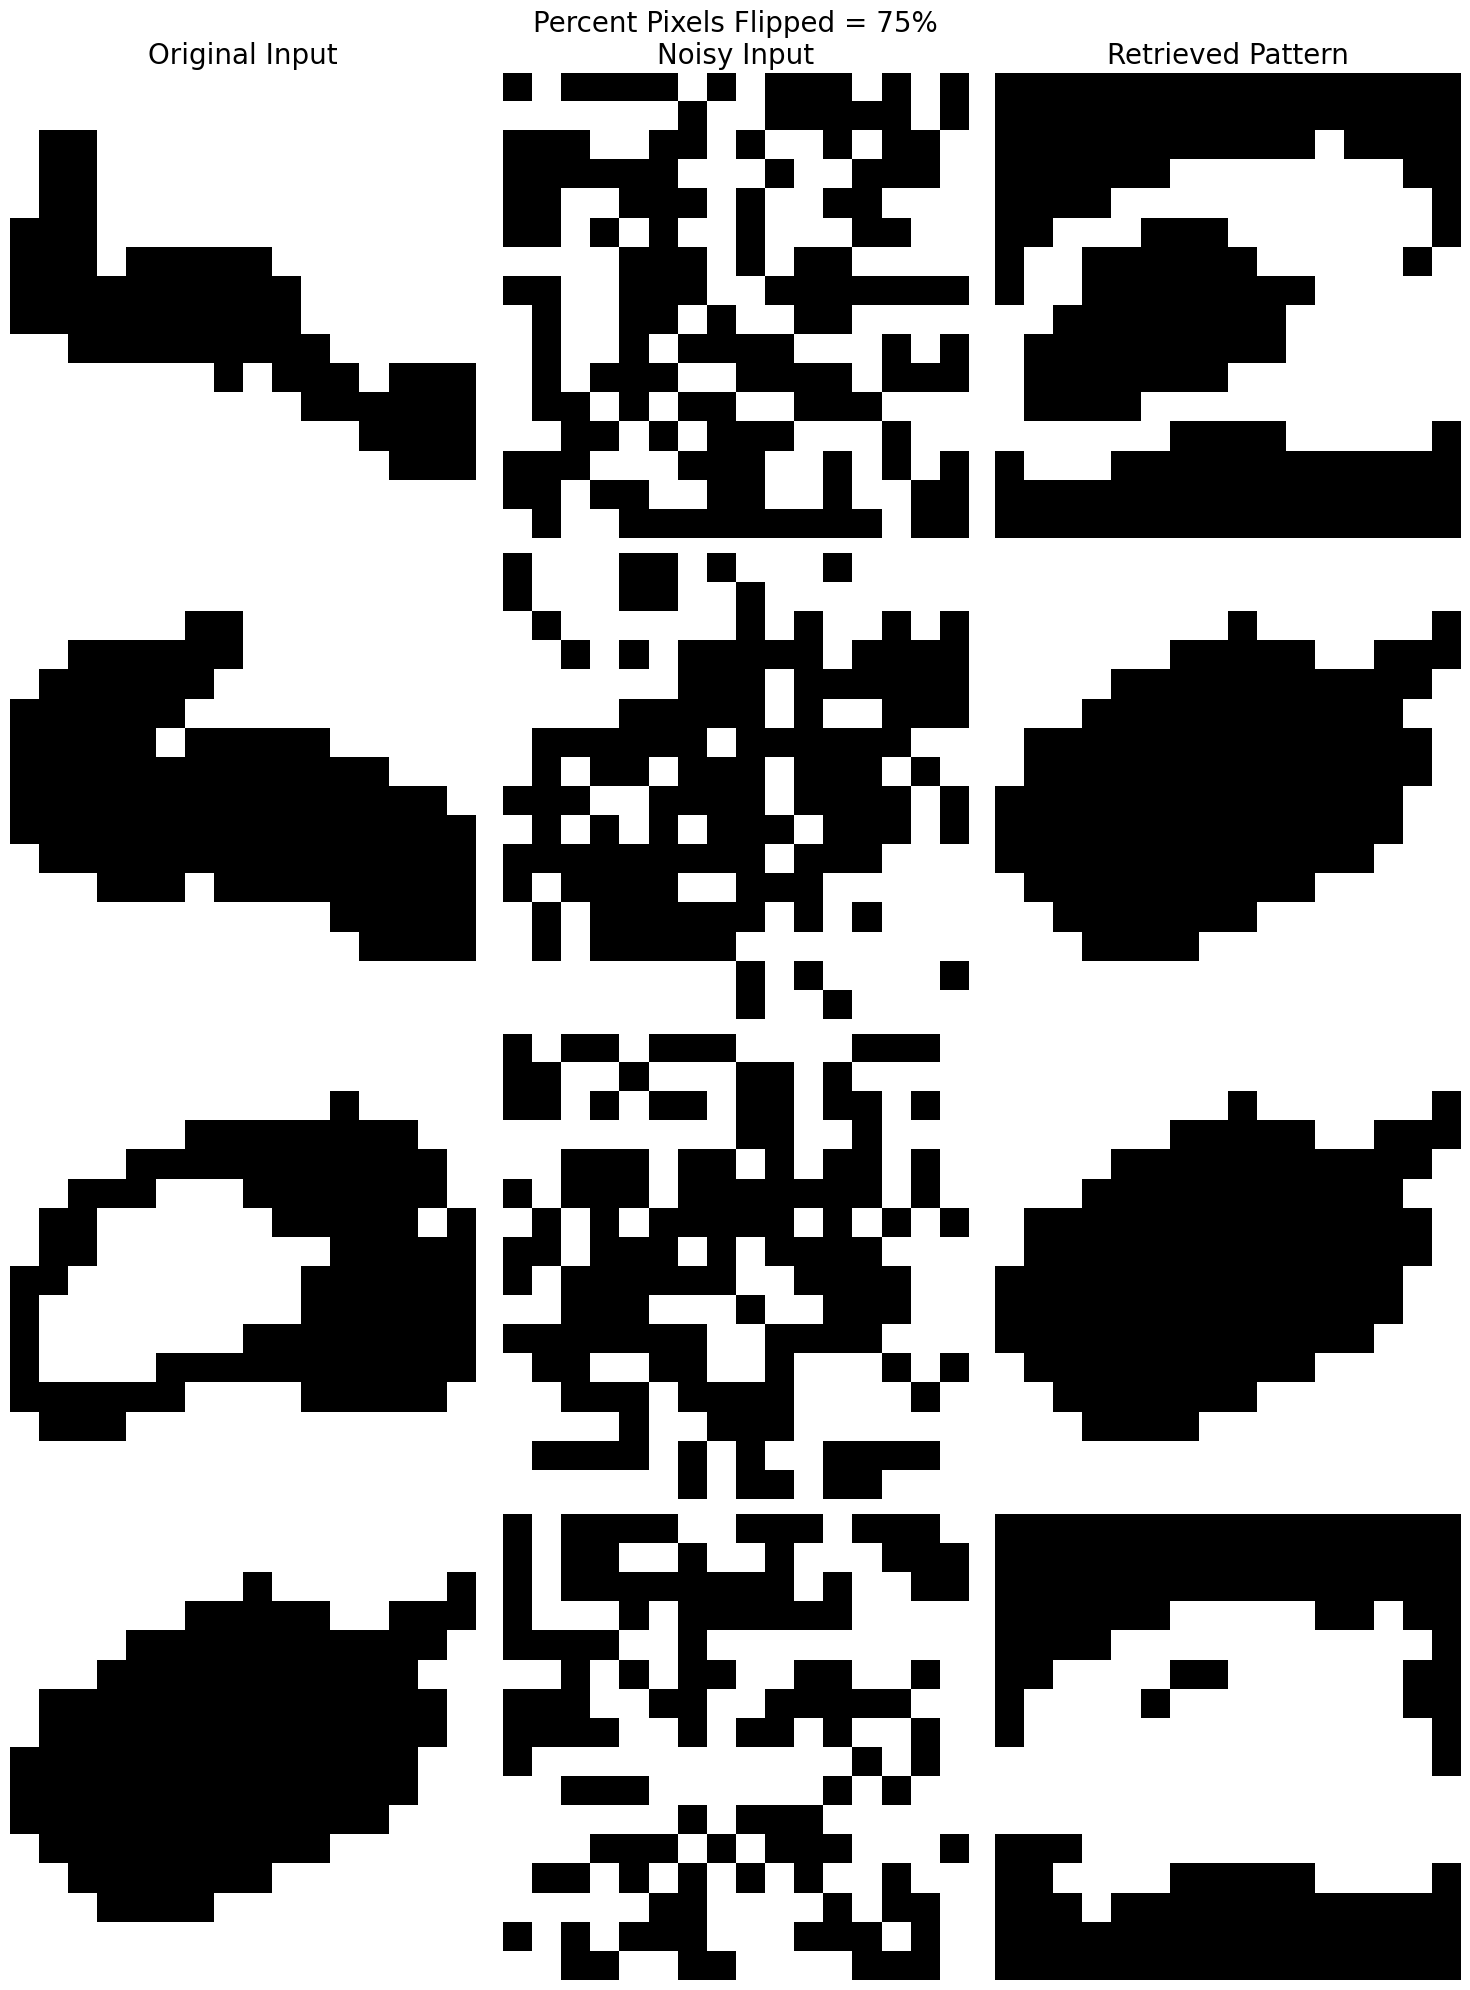

In [12]:
# Build the Hopfield Network on the dataset
model = HopfieldNetwork(num_neurons, weight, bias)

async_update = True
pruning_method = None

showcase_pat = model.retrieve(dim, weight, selected_images, noisy_inputs, flipped_percents, num_iterations, async_update, pruning_method, show_plot=True)

In [13]:
def pruning_performance(orig_input, pruned_input) -> float:
    """
    Calculate the performance of the pruning method
    
    Args:
        orig_input (torch.Tensor): The original input pattern
        pruned_input (list): The pruned input pattern
    
    Returns:
        float: The performance of the pruning method.
    """
    
    pruned_input_tensor = torch.Tensor(pruned_input)
    
    # Count the number of mismatching pixels
    mismatches = torch.ne(orig_input.flatten(), pruned_input_tensor)
    num_incorrect_pixels = mismatches.sum().item()
    
    # Calculate the pruning performance
    num_pixels = orig_input.numel()
    performance = (1 - (num_incorrect_pixels / num_pixels)) * 100
    
    return performance

# Sparse Pruning

Running trial with a sparsity of 25


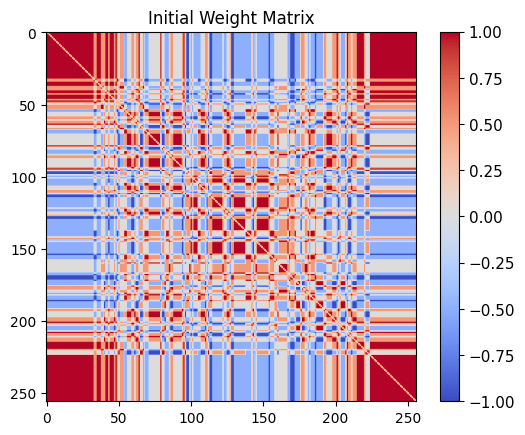

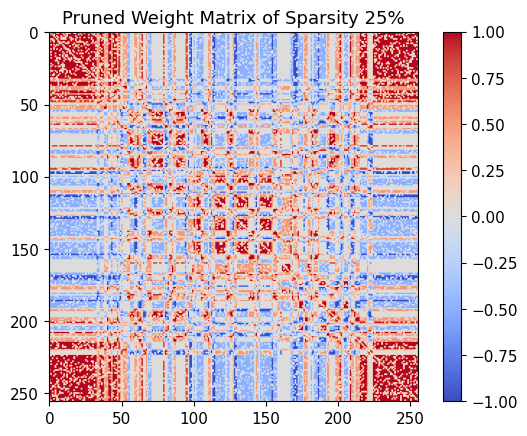

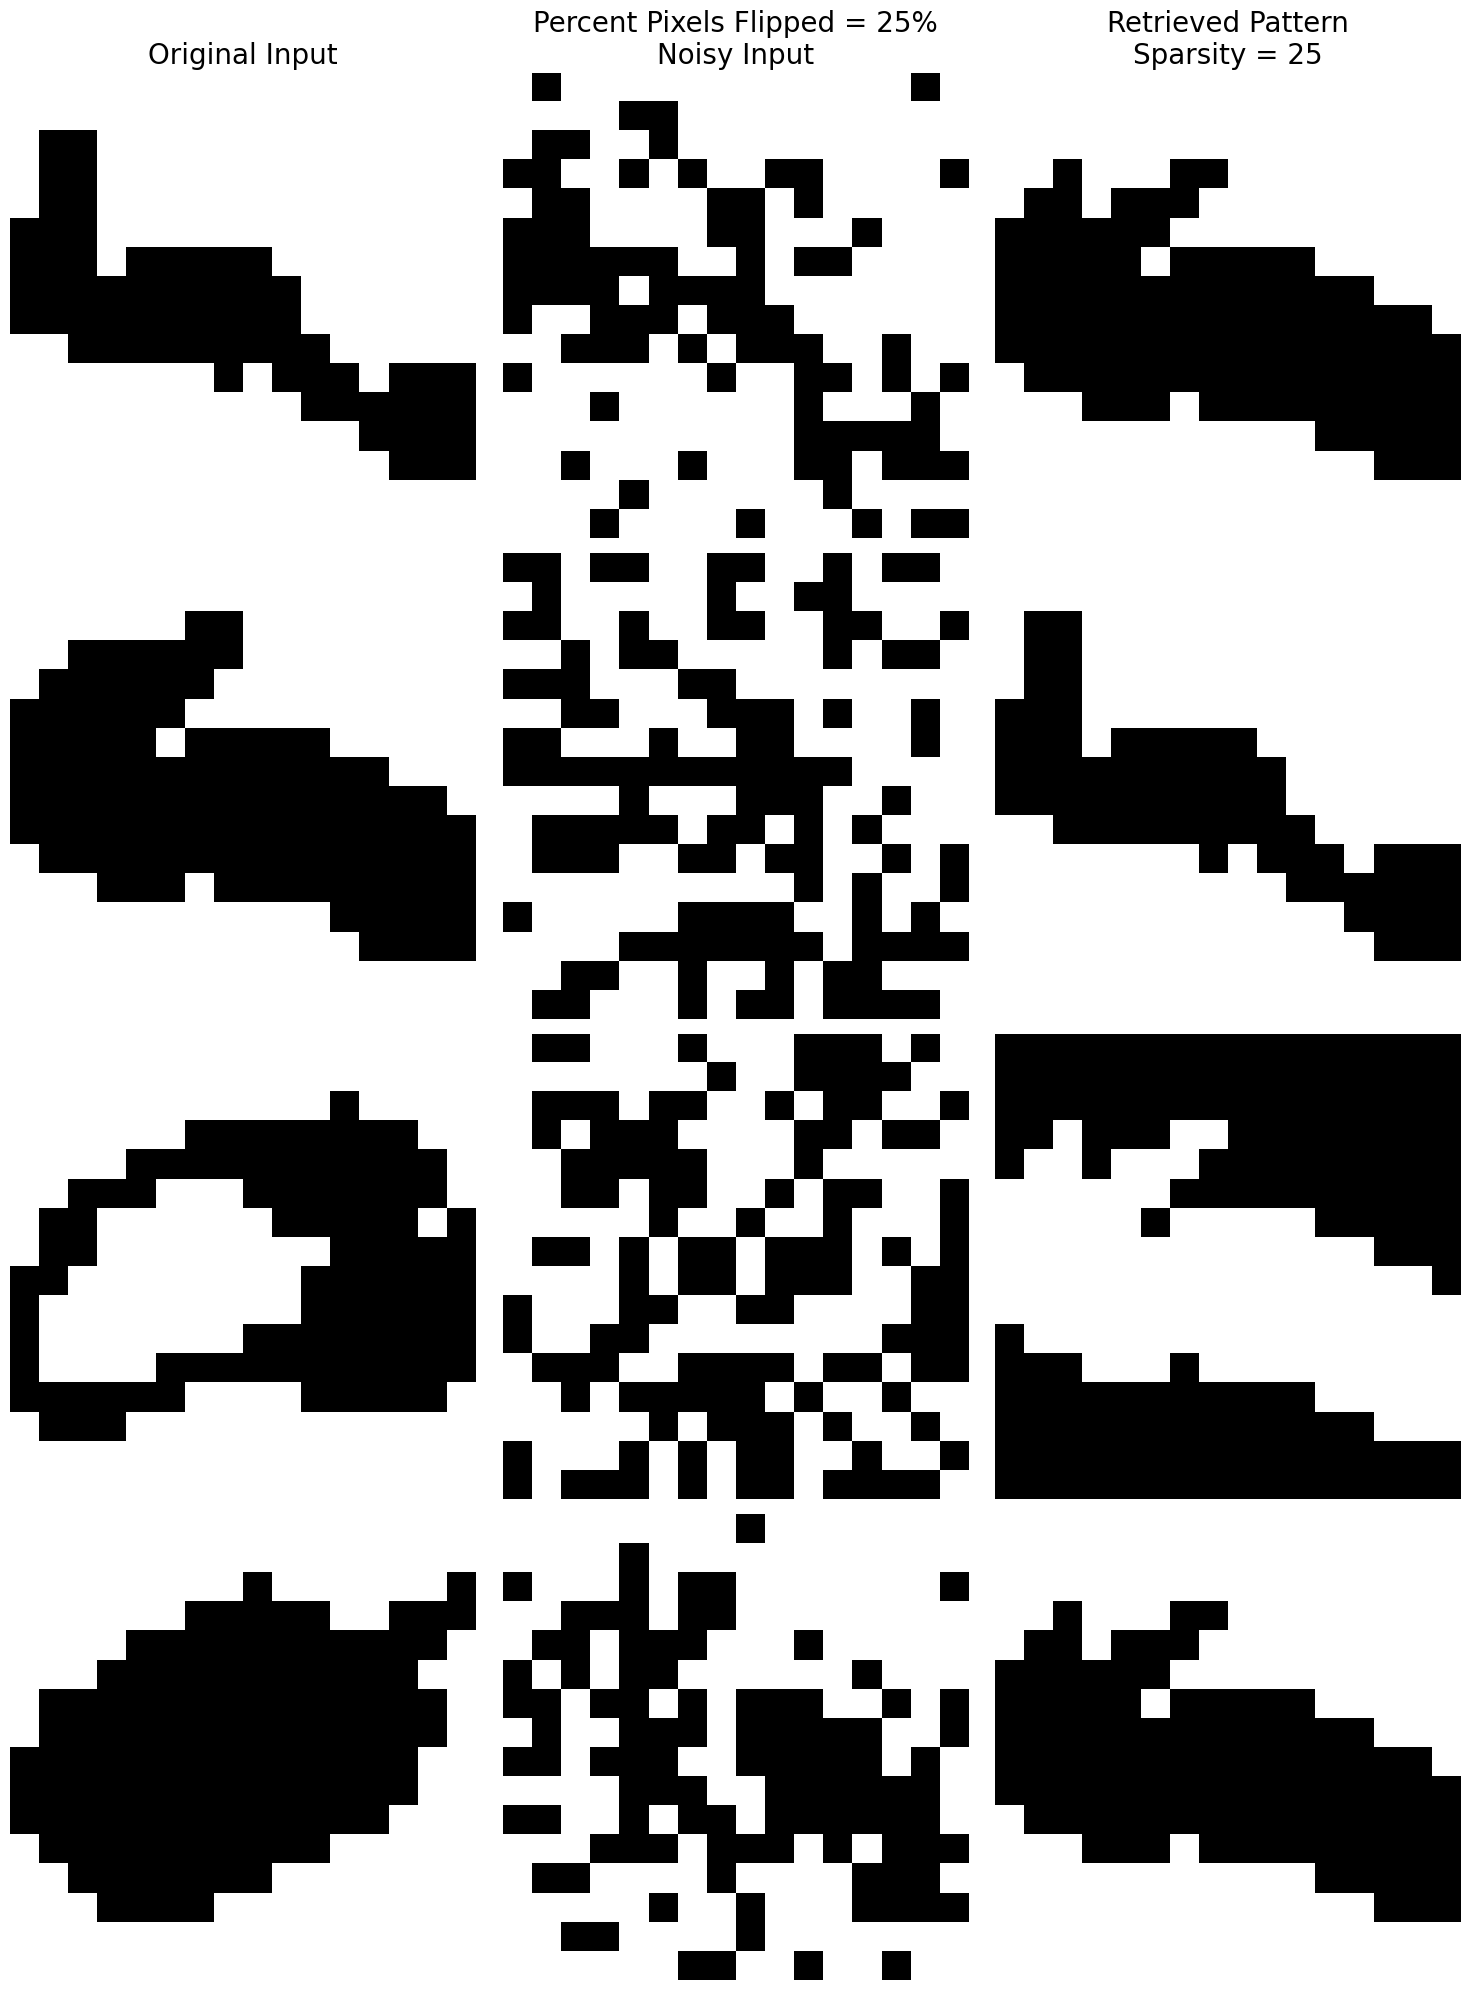

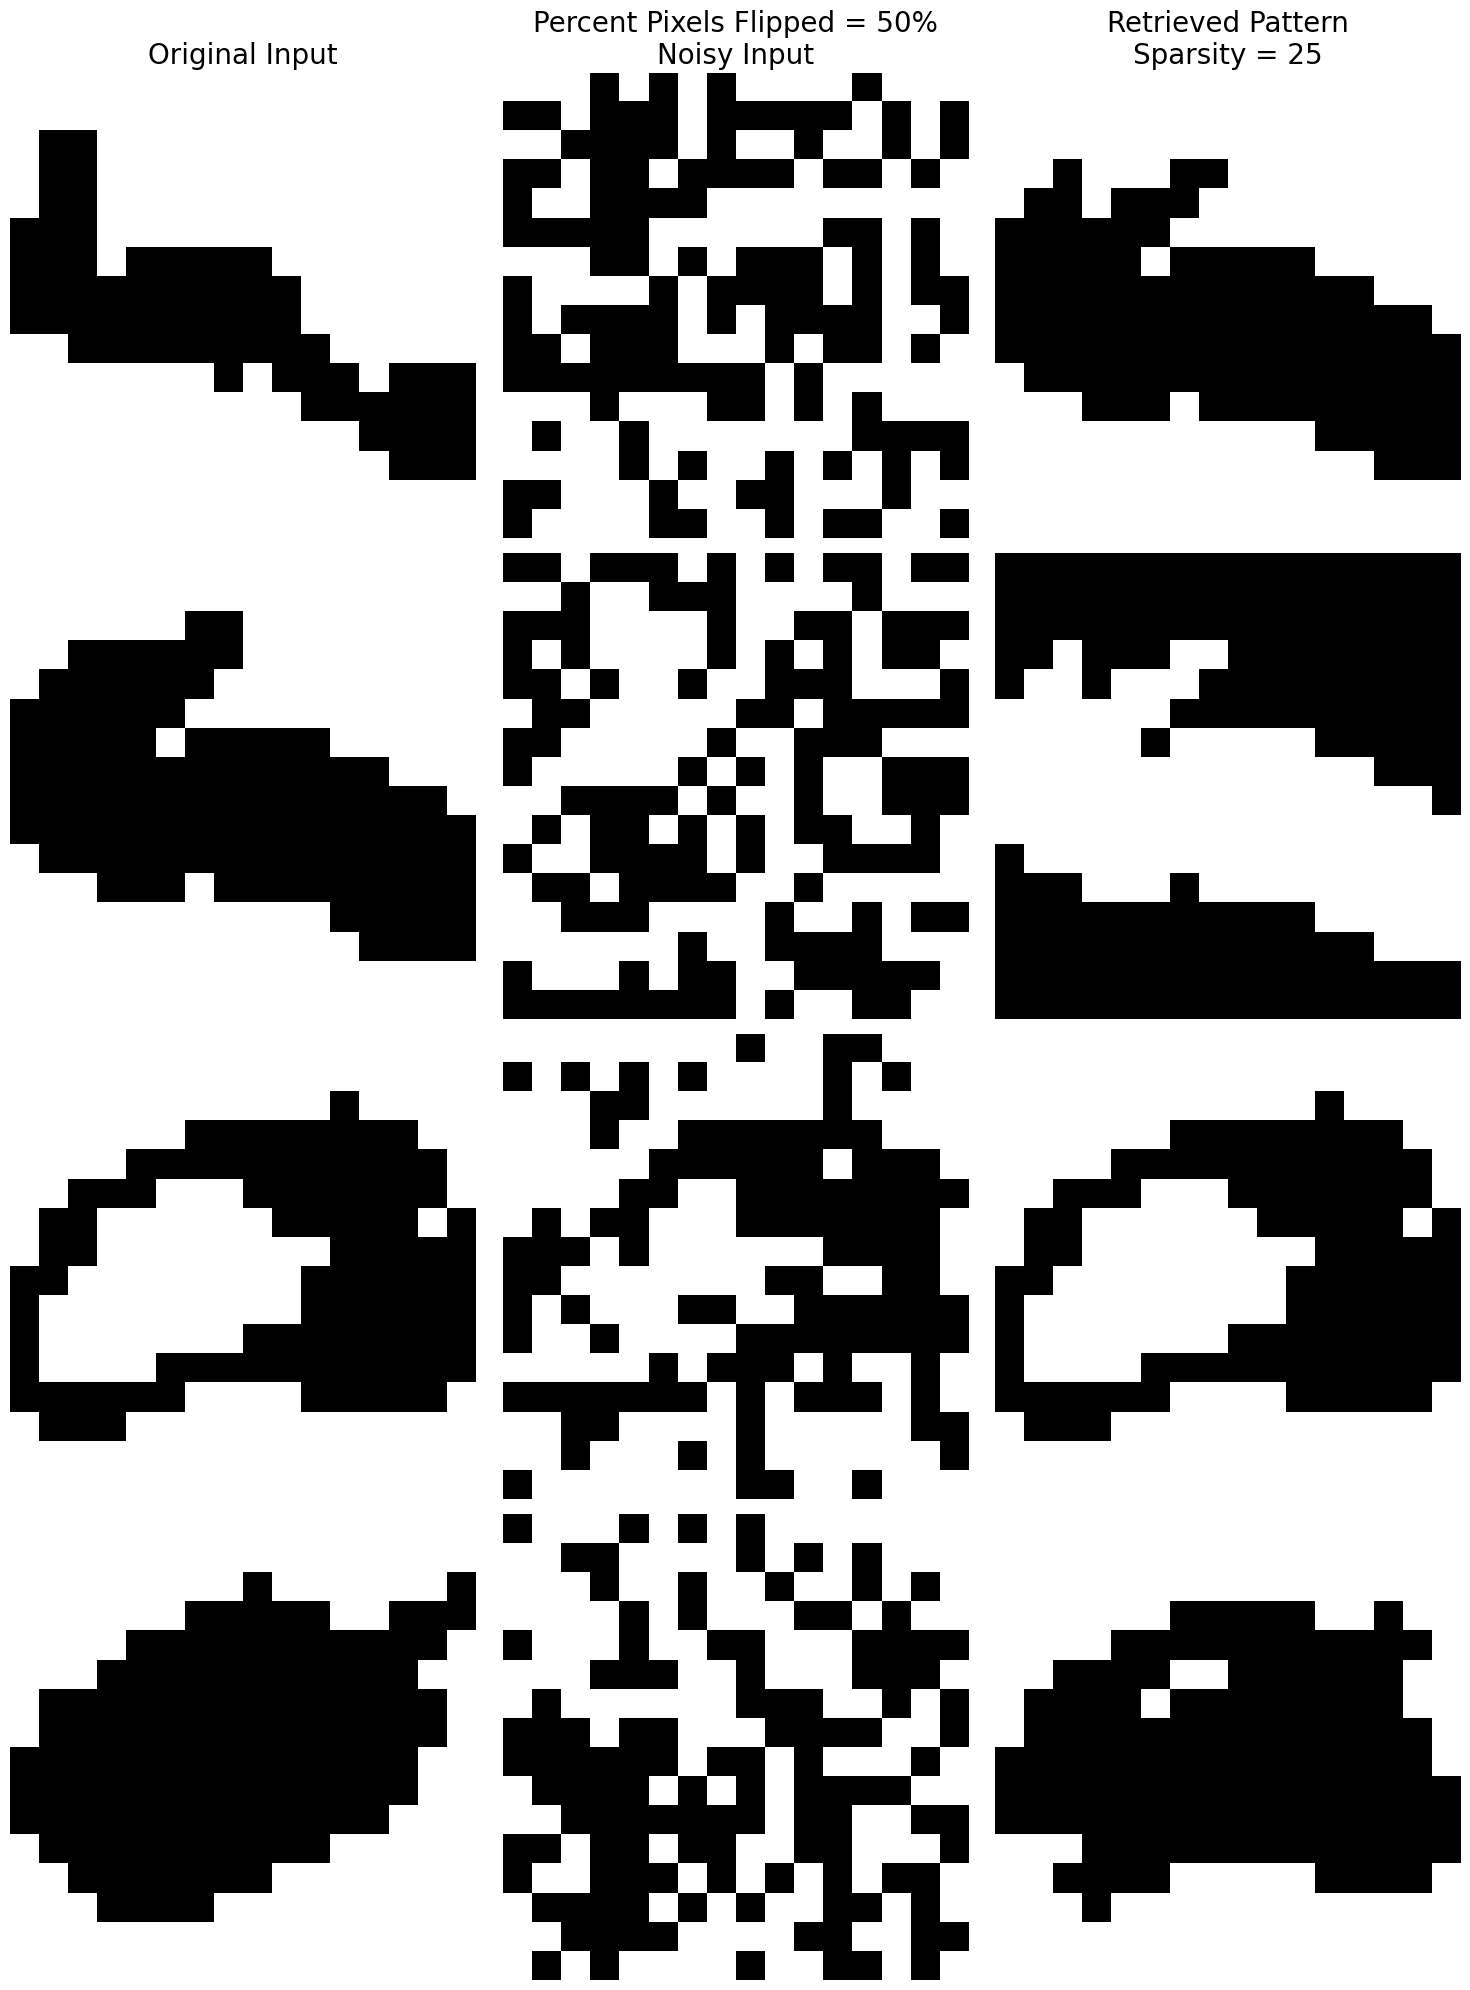

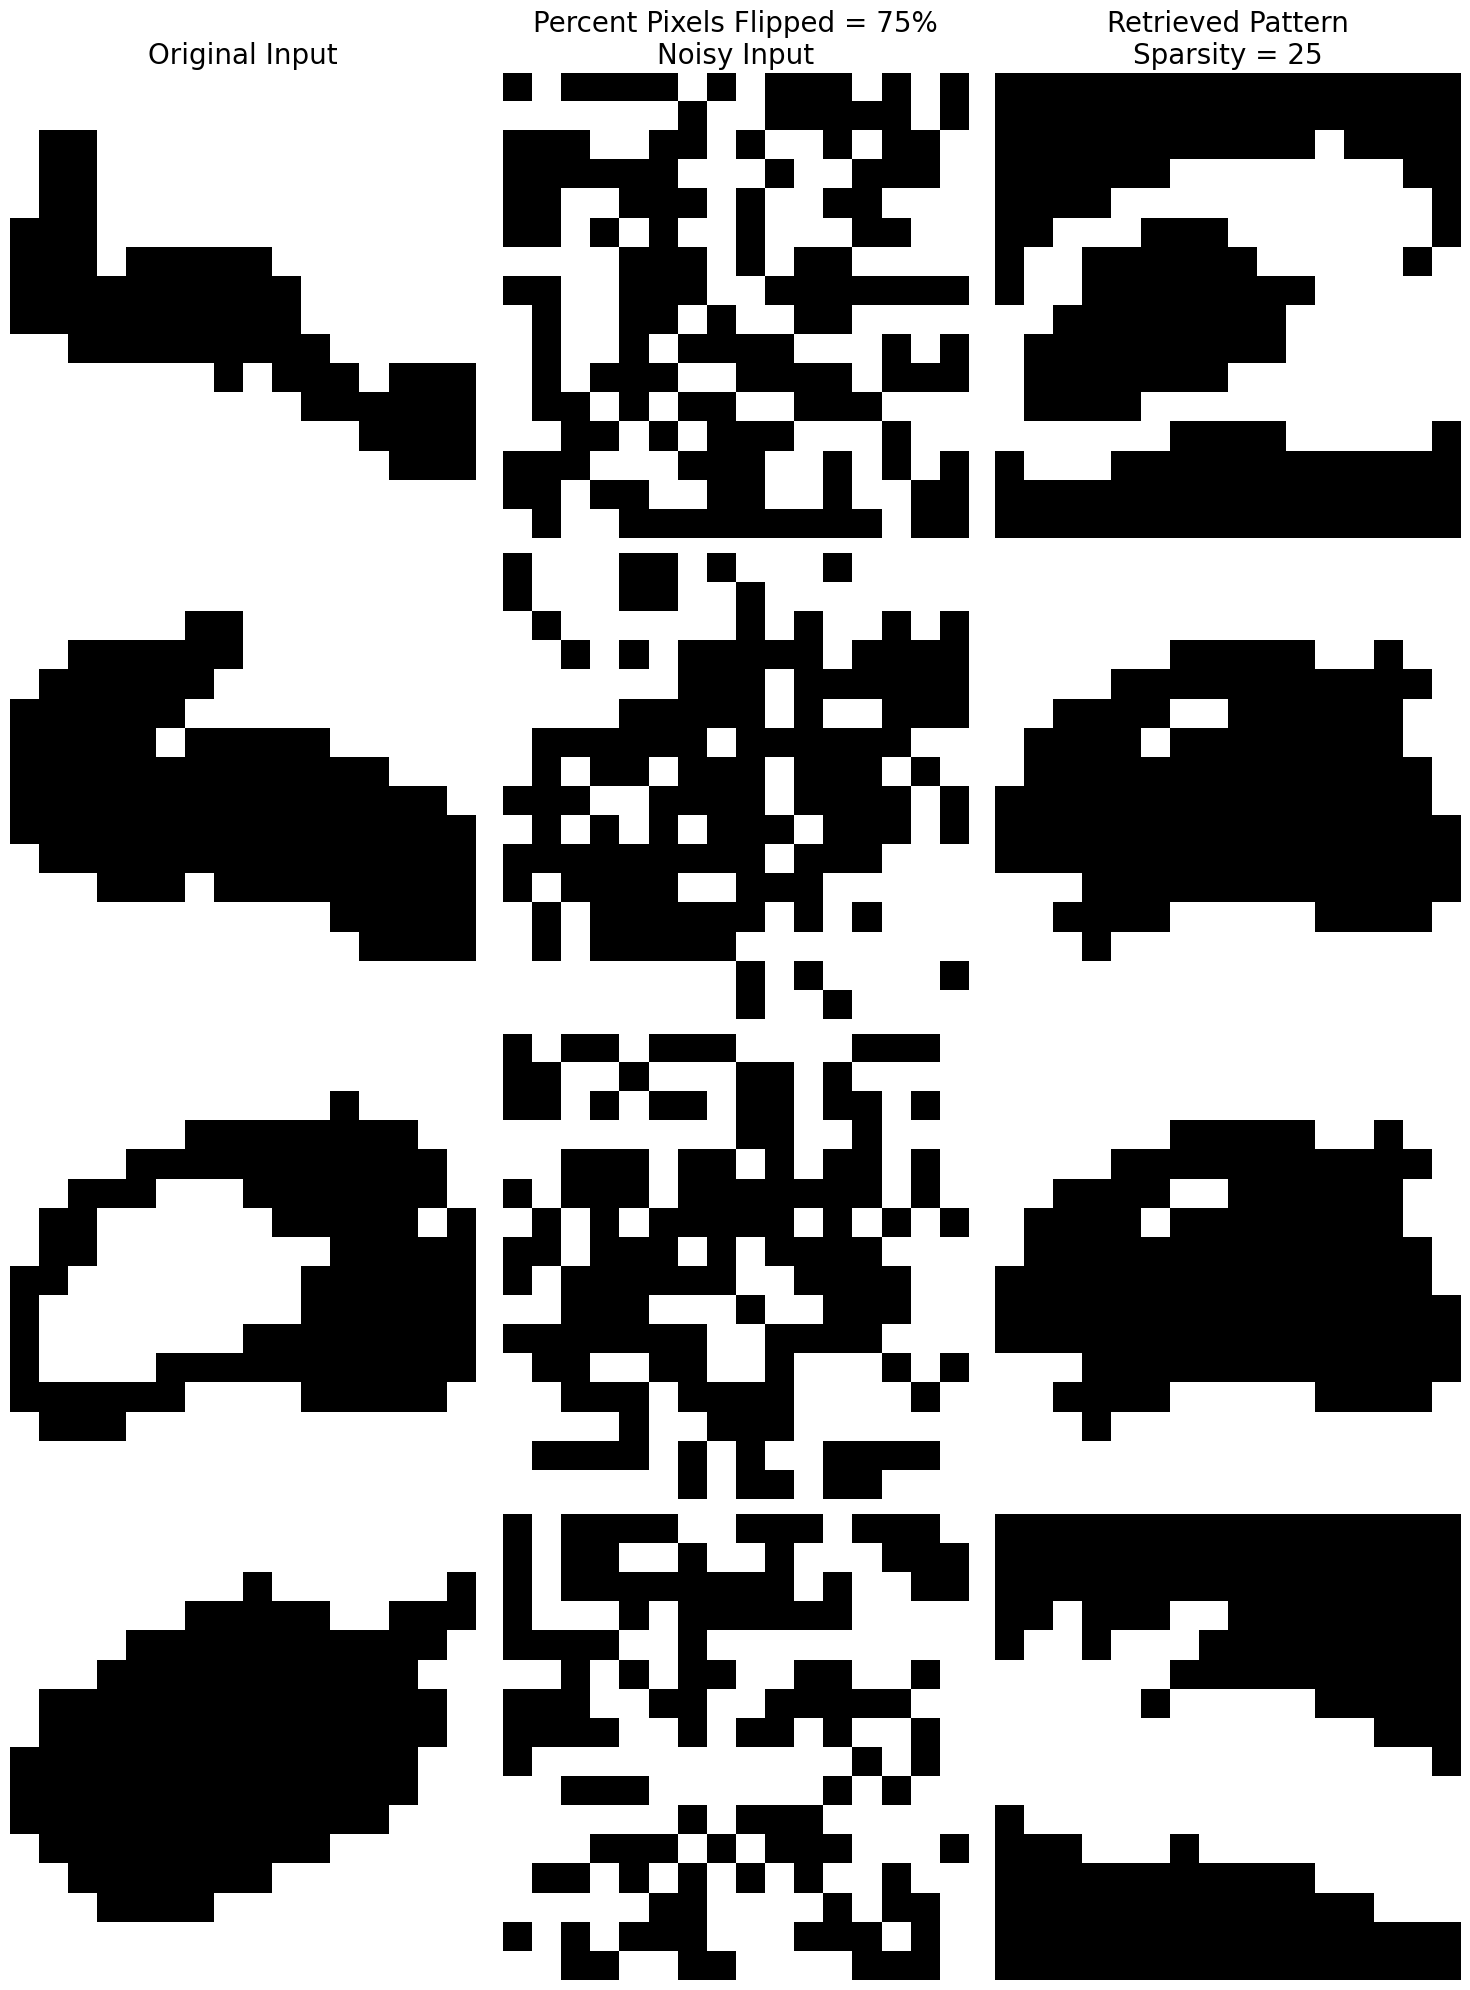

Running trial with a sparsity of 50


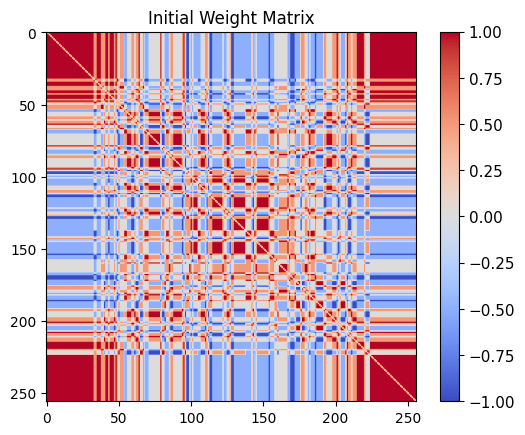

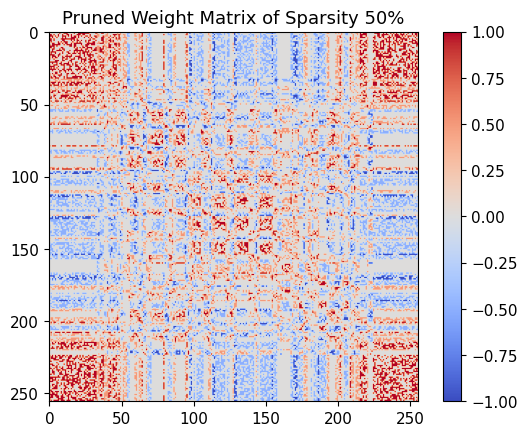

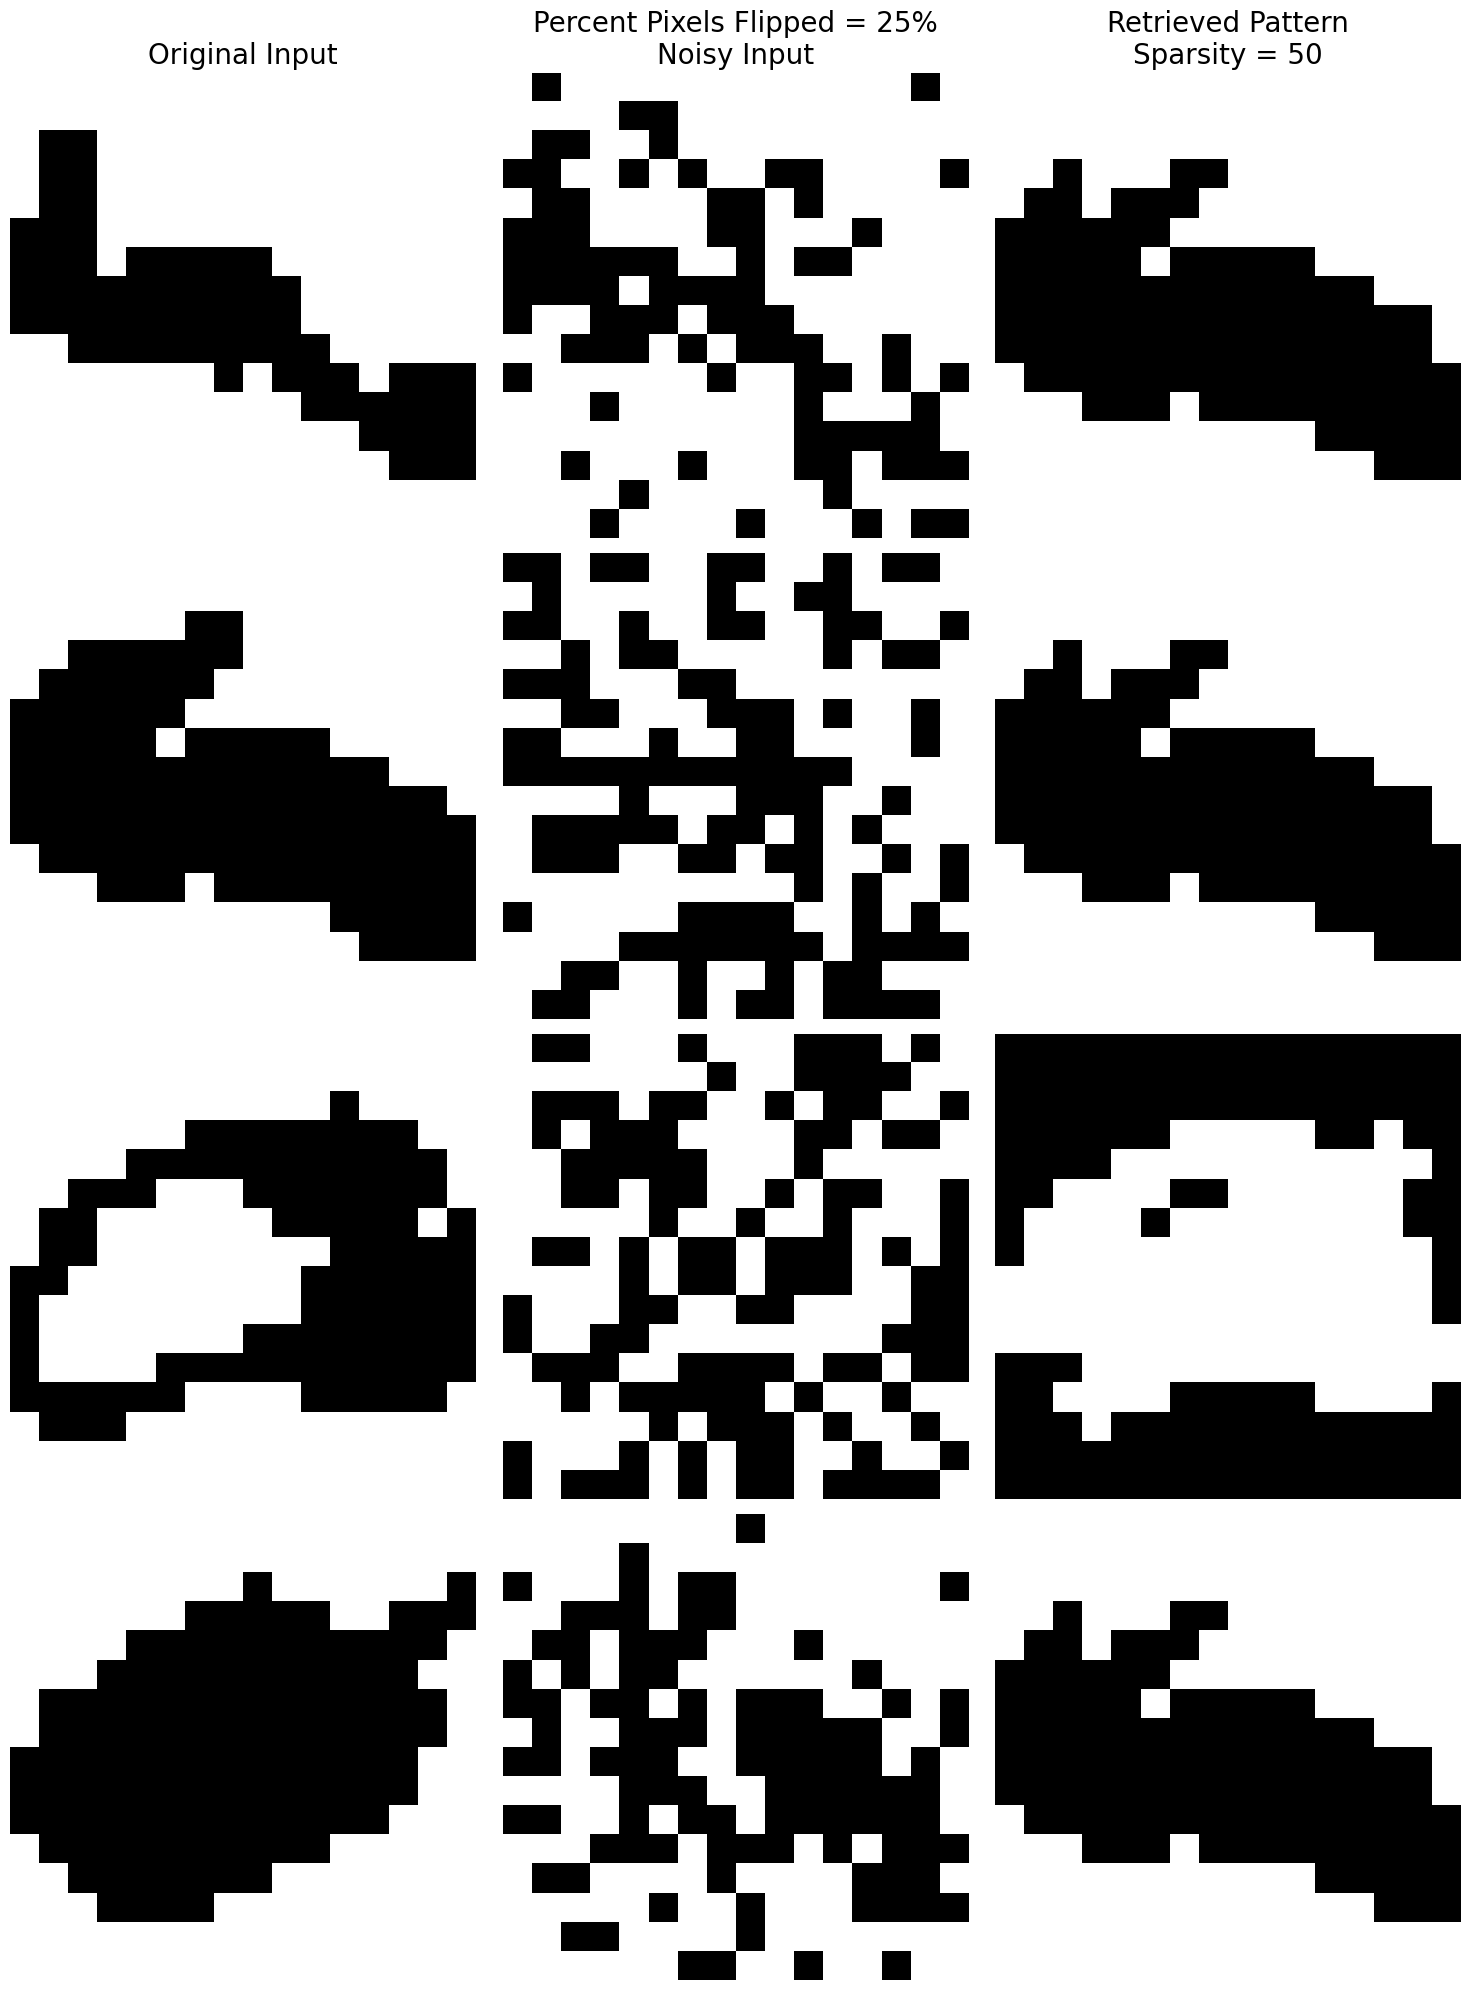

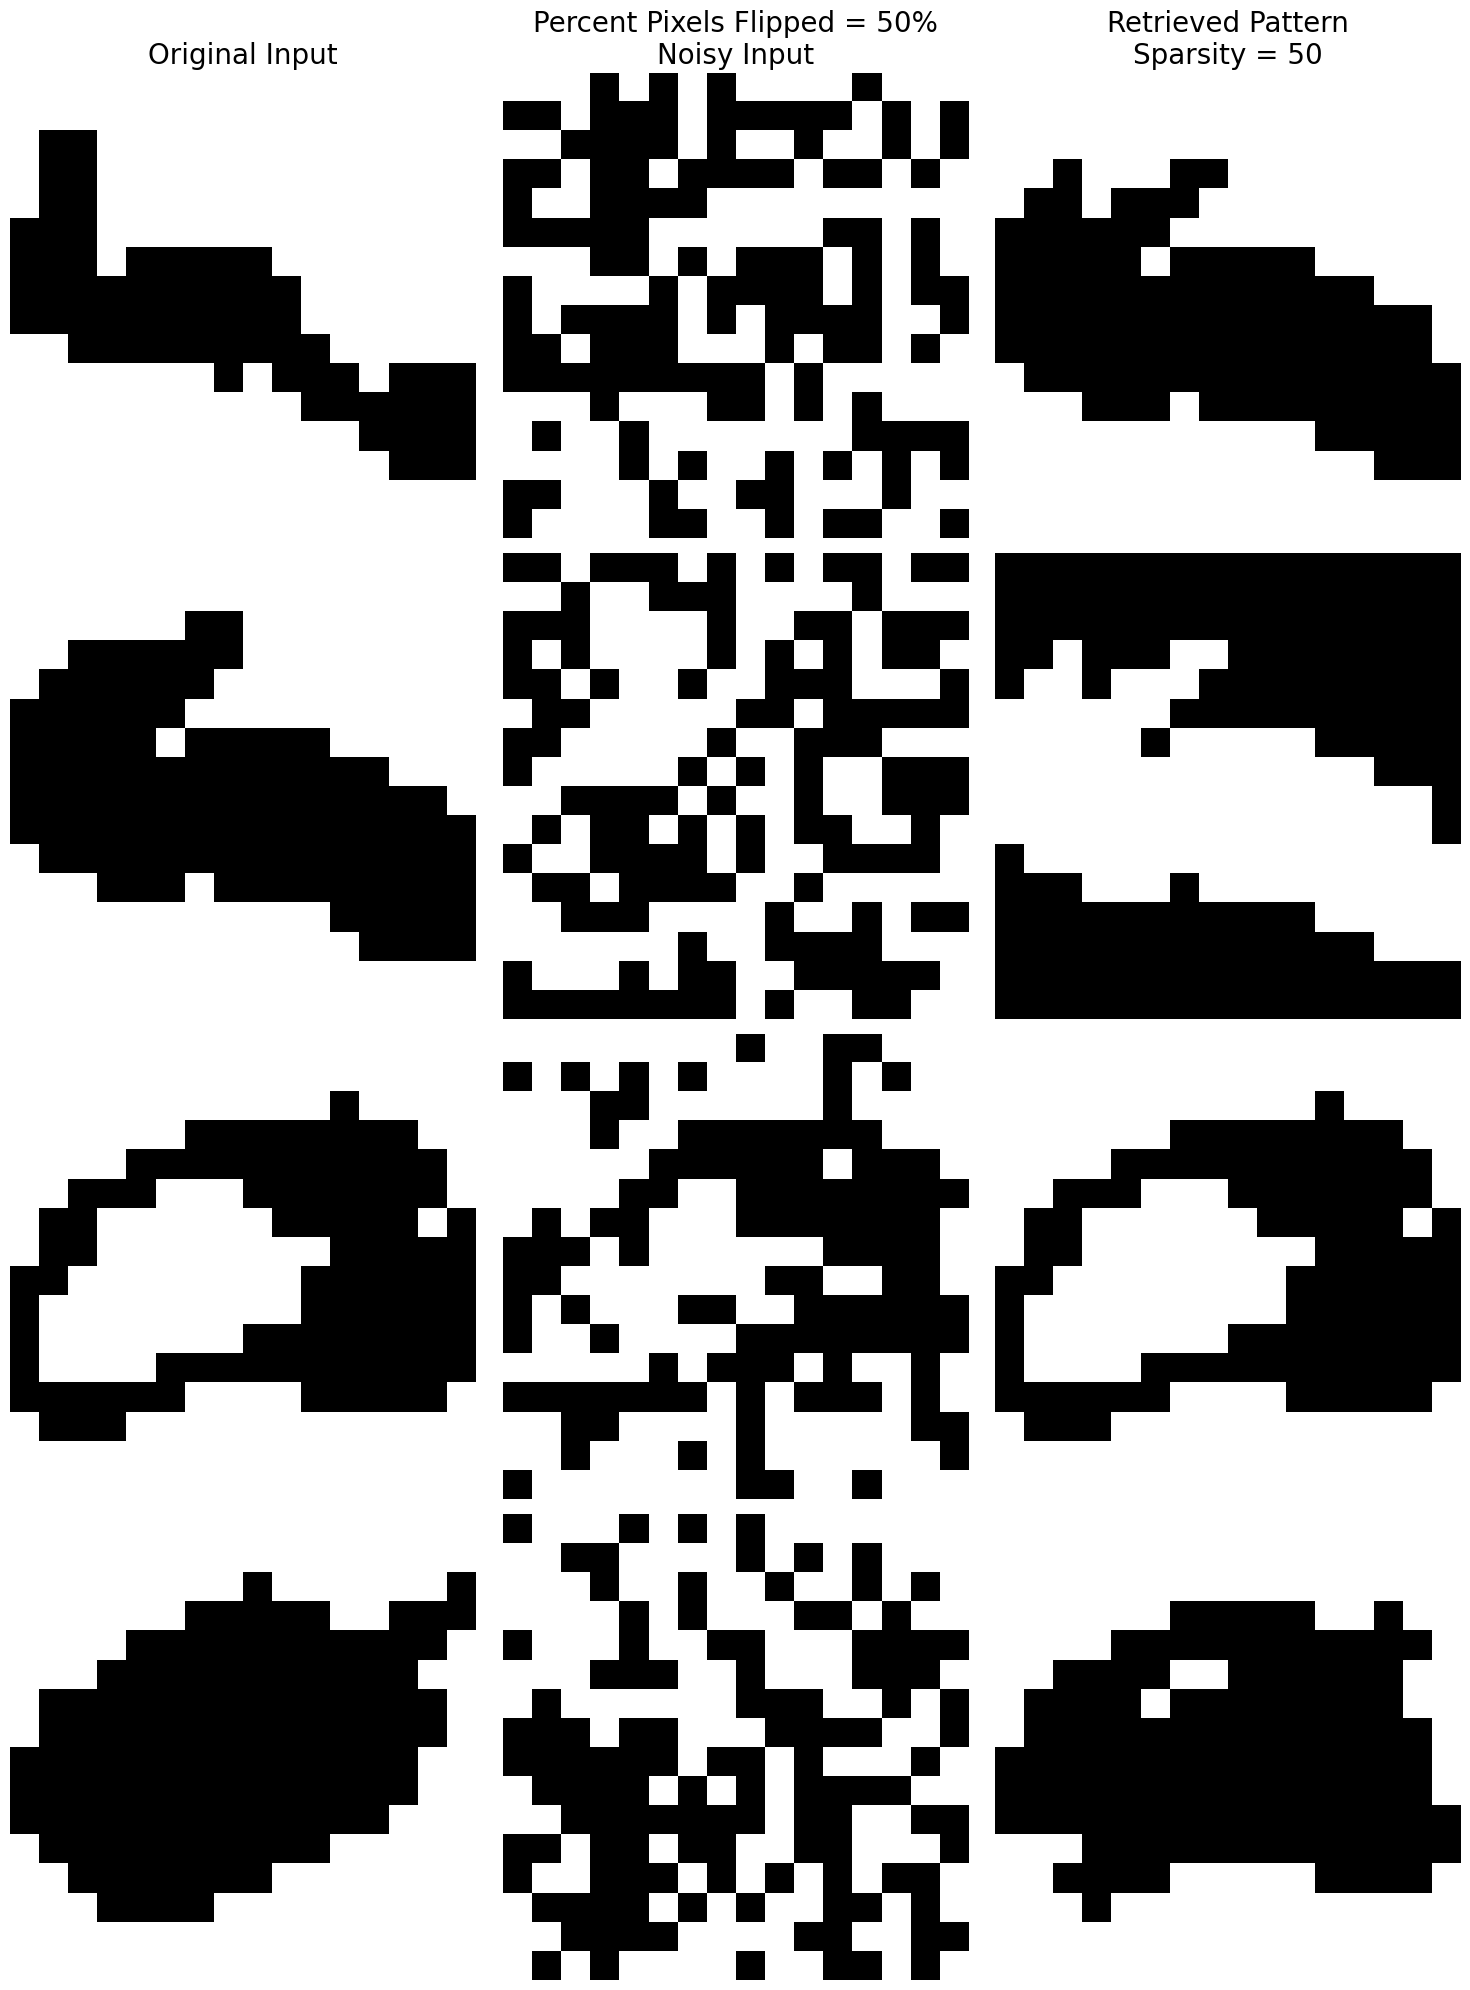

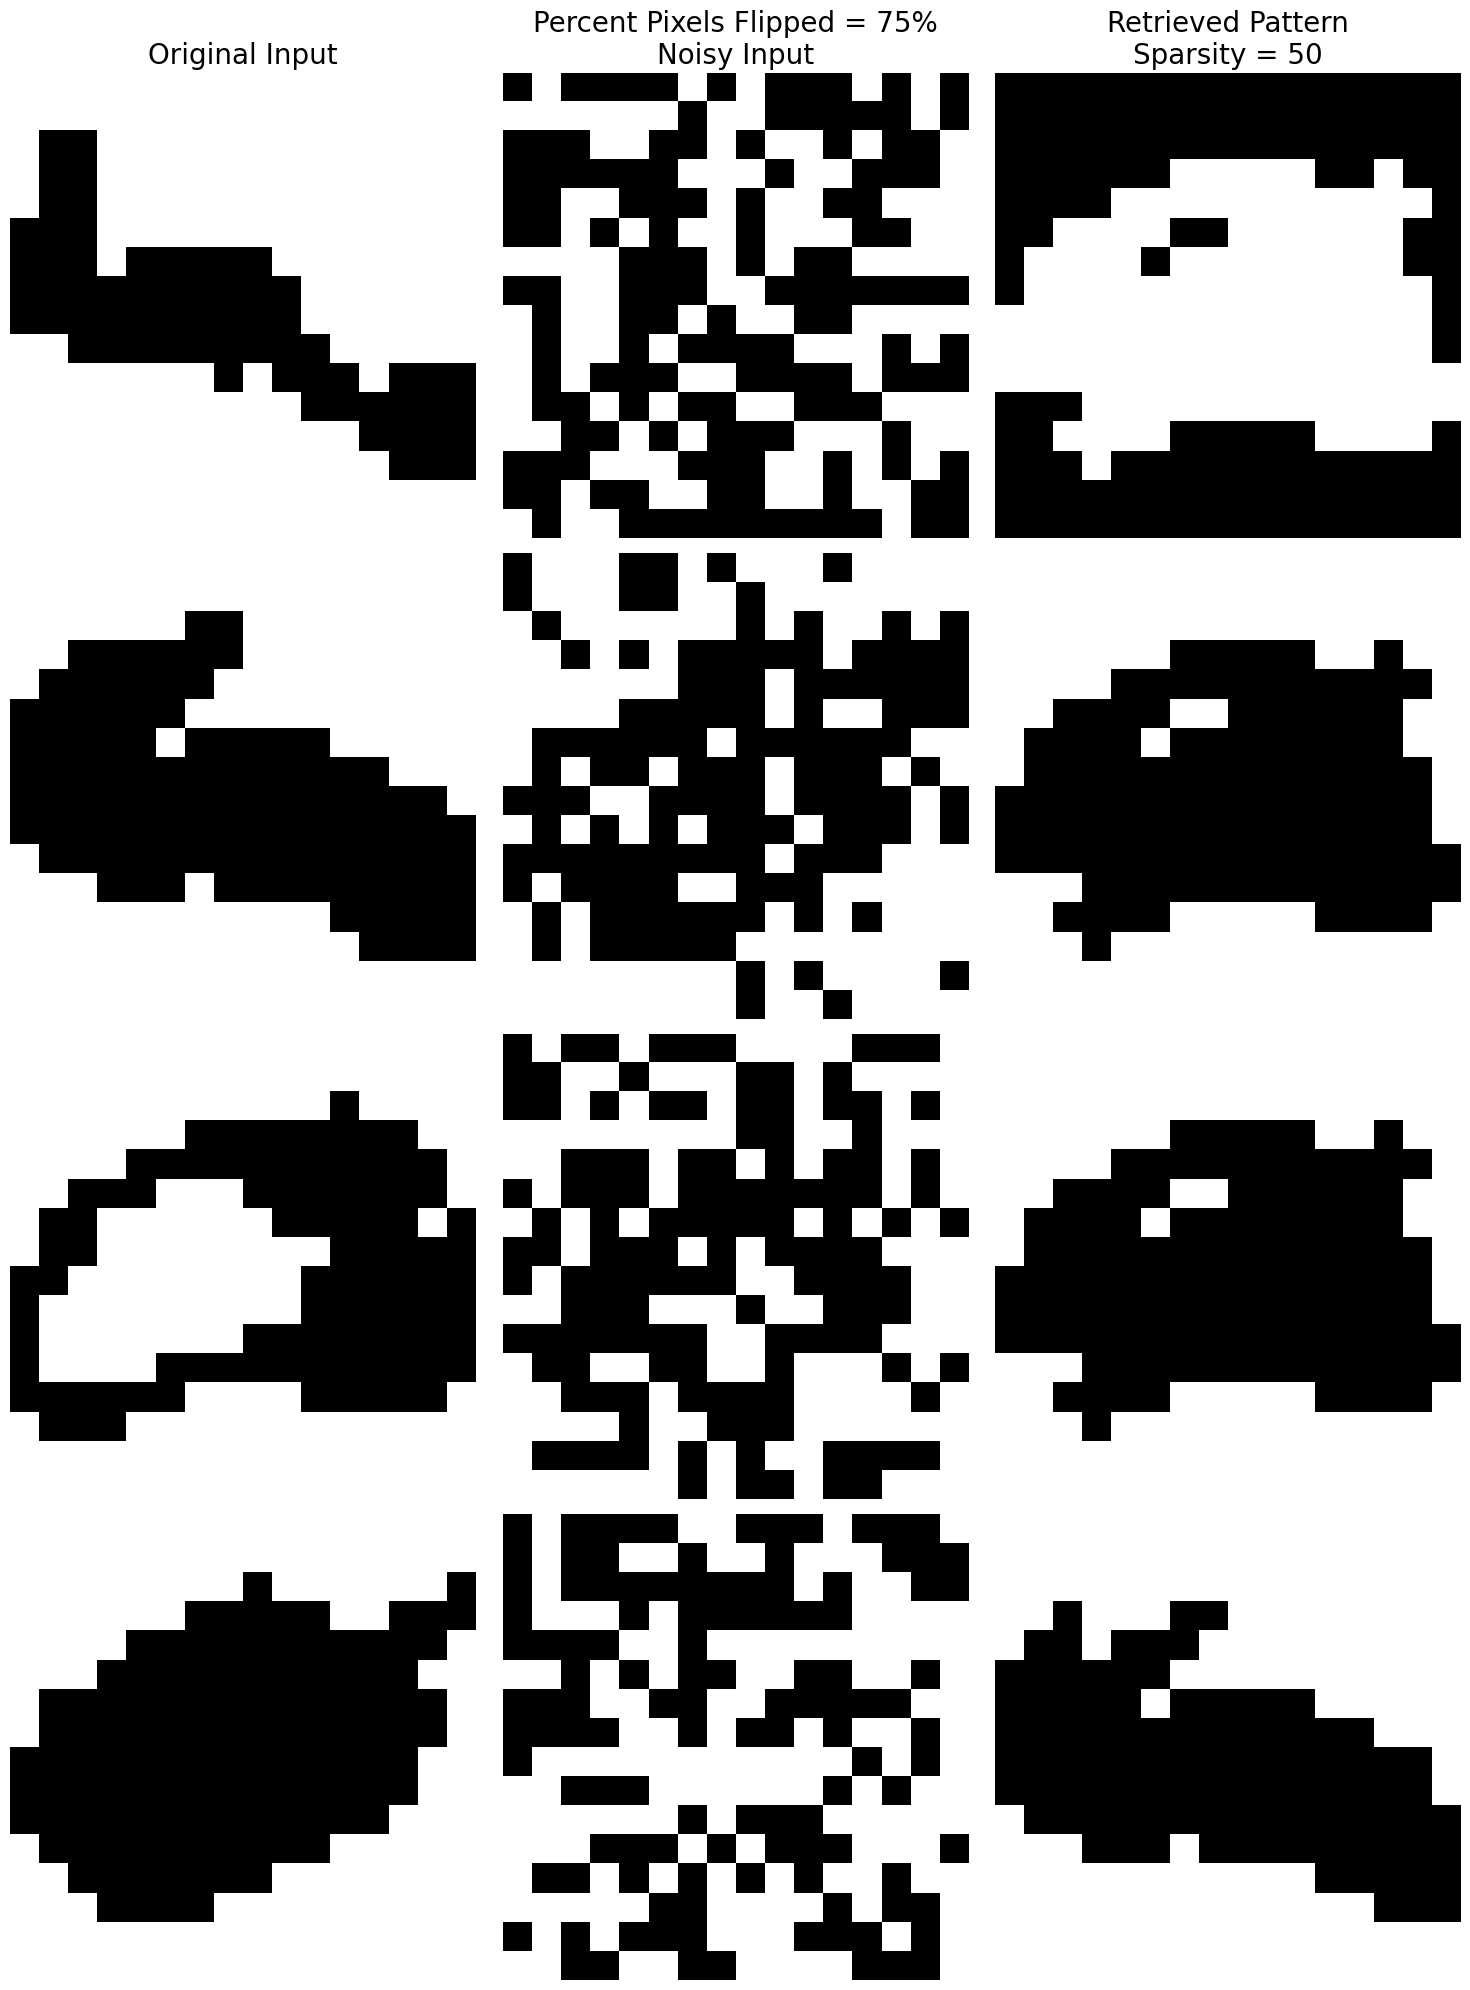

Running trial with a sparsity of 75


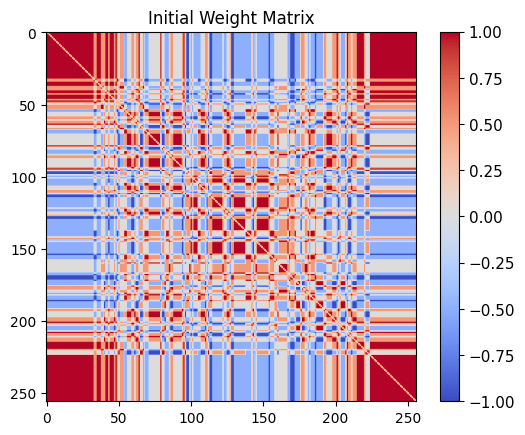

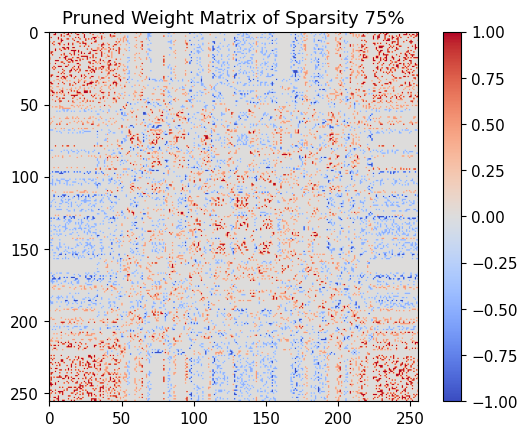

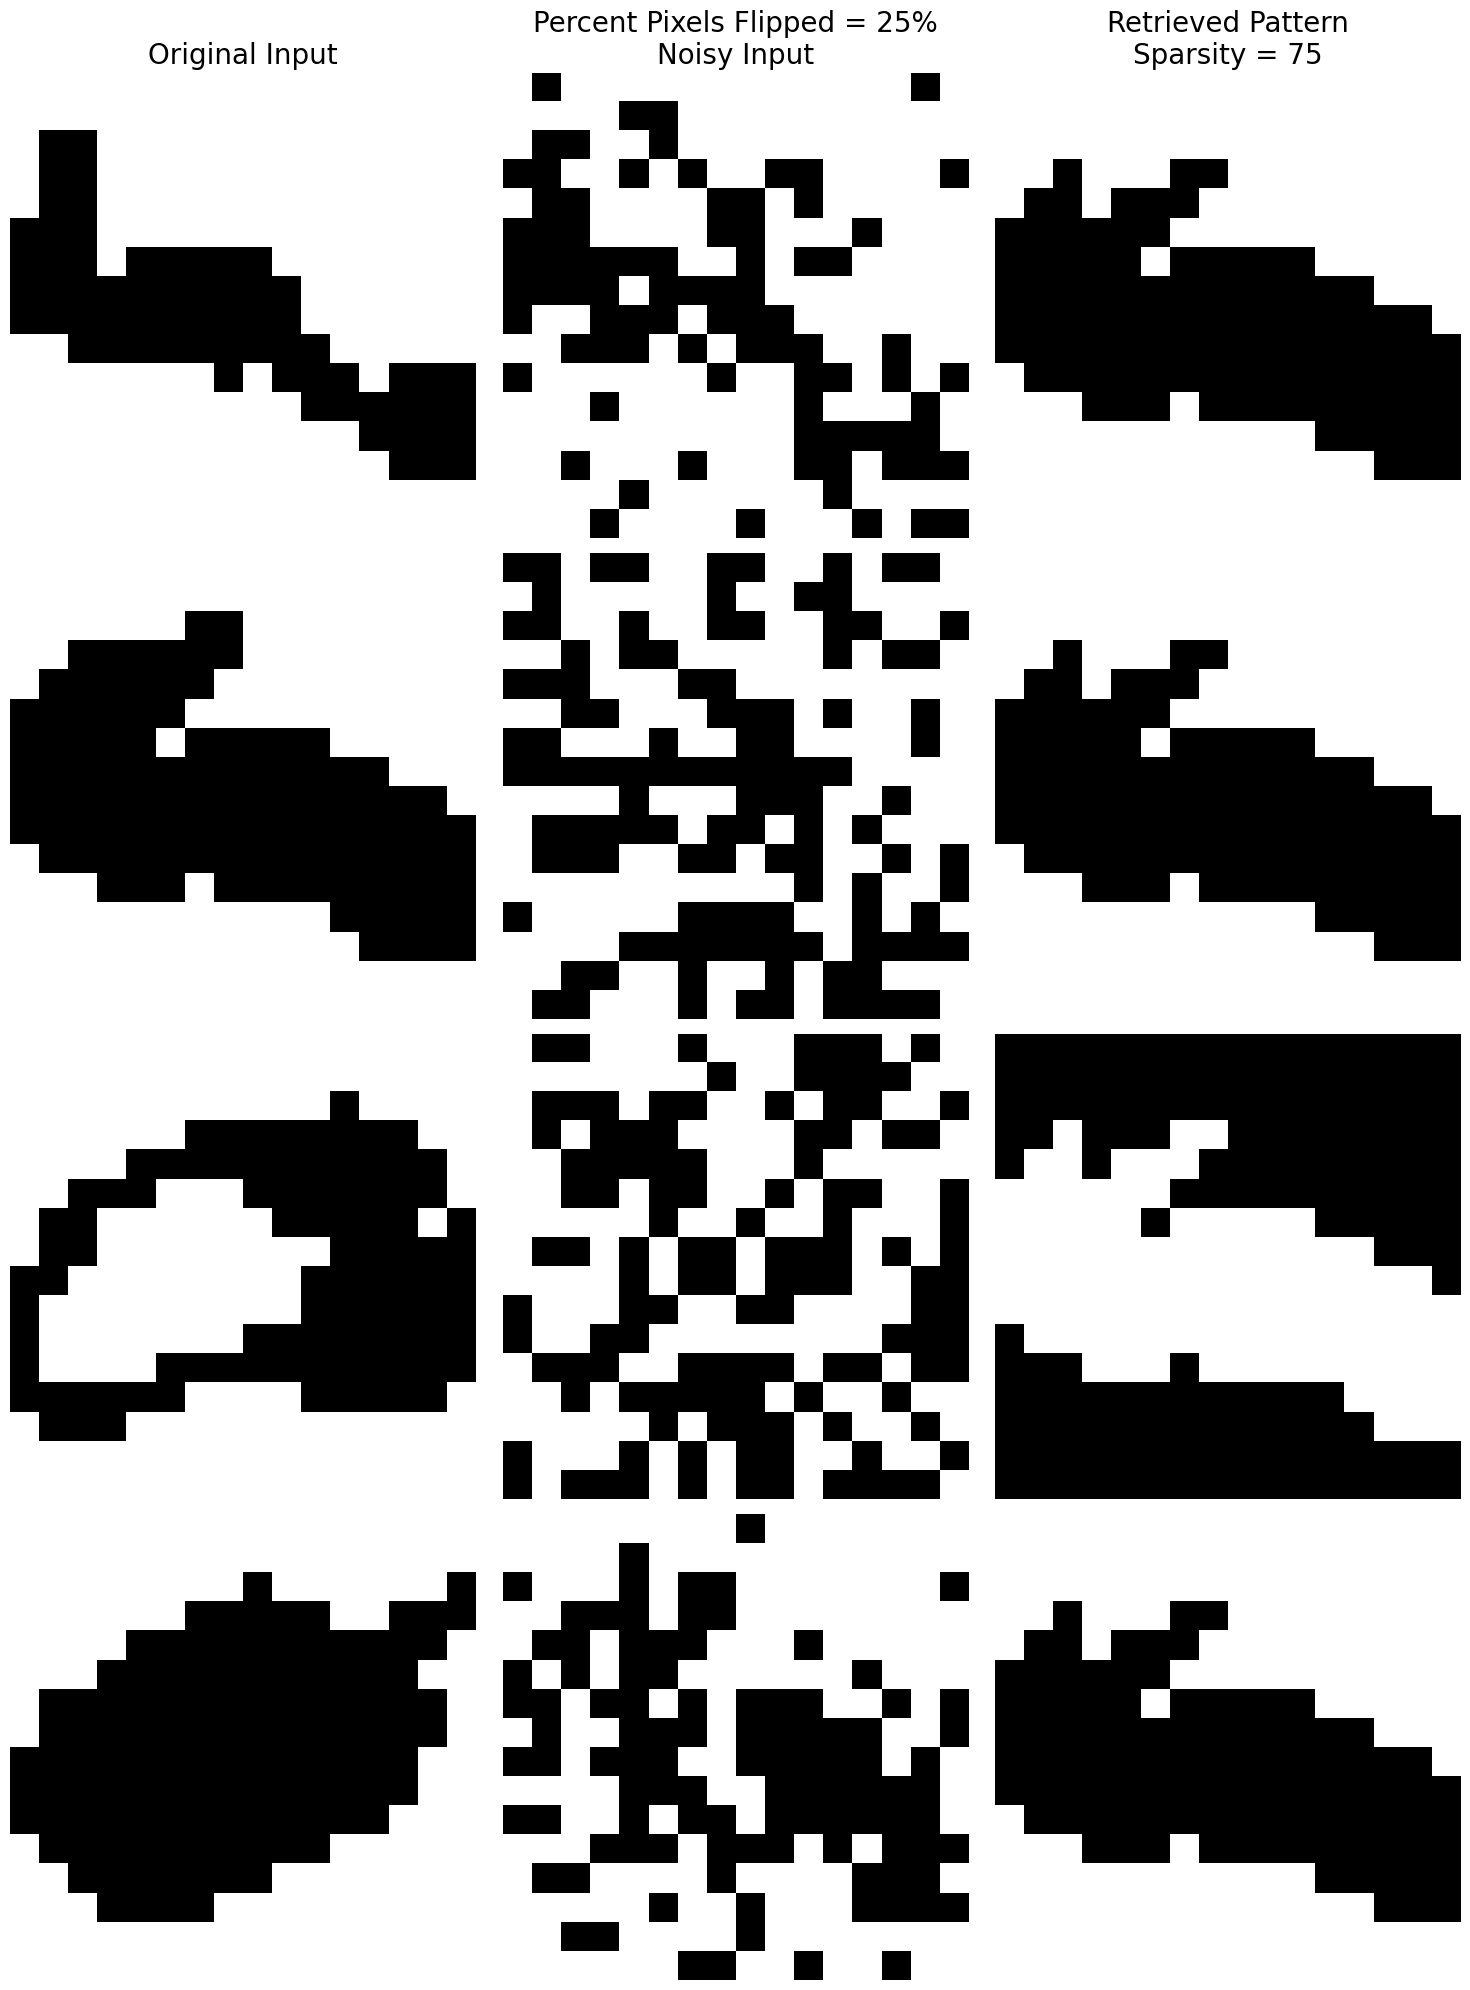

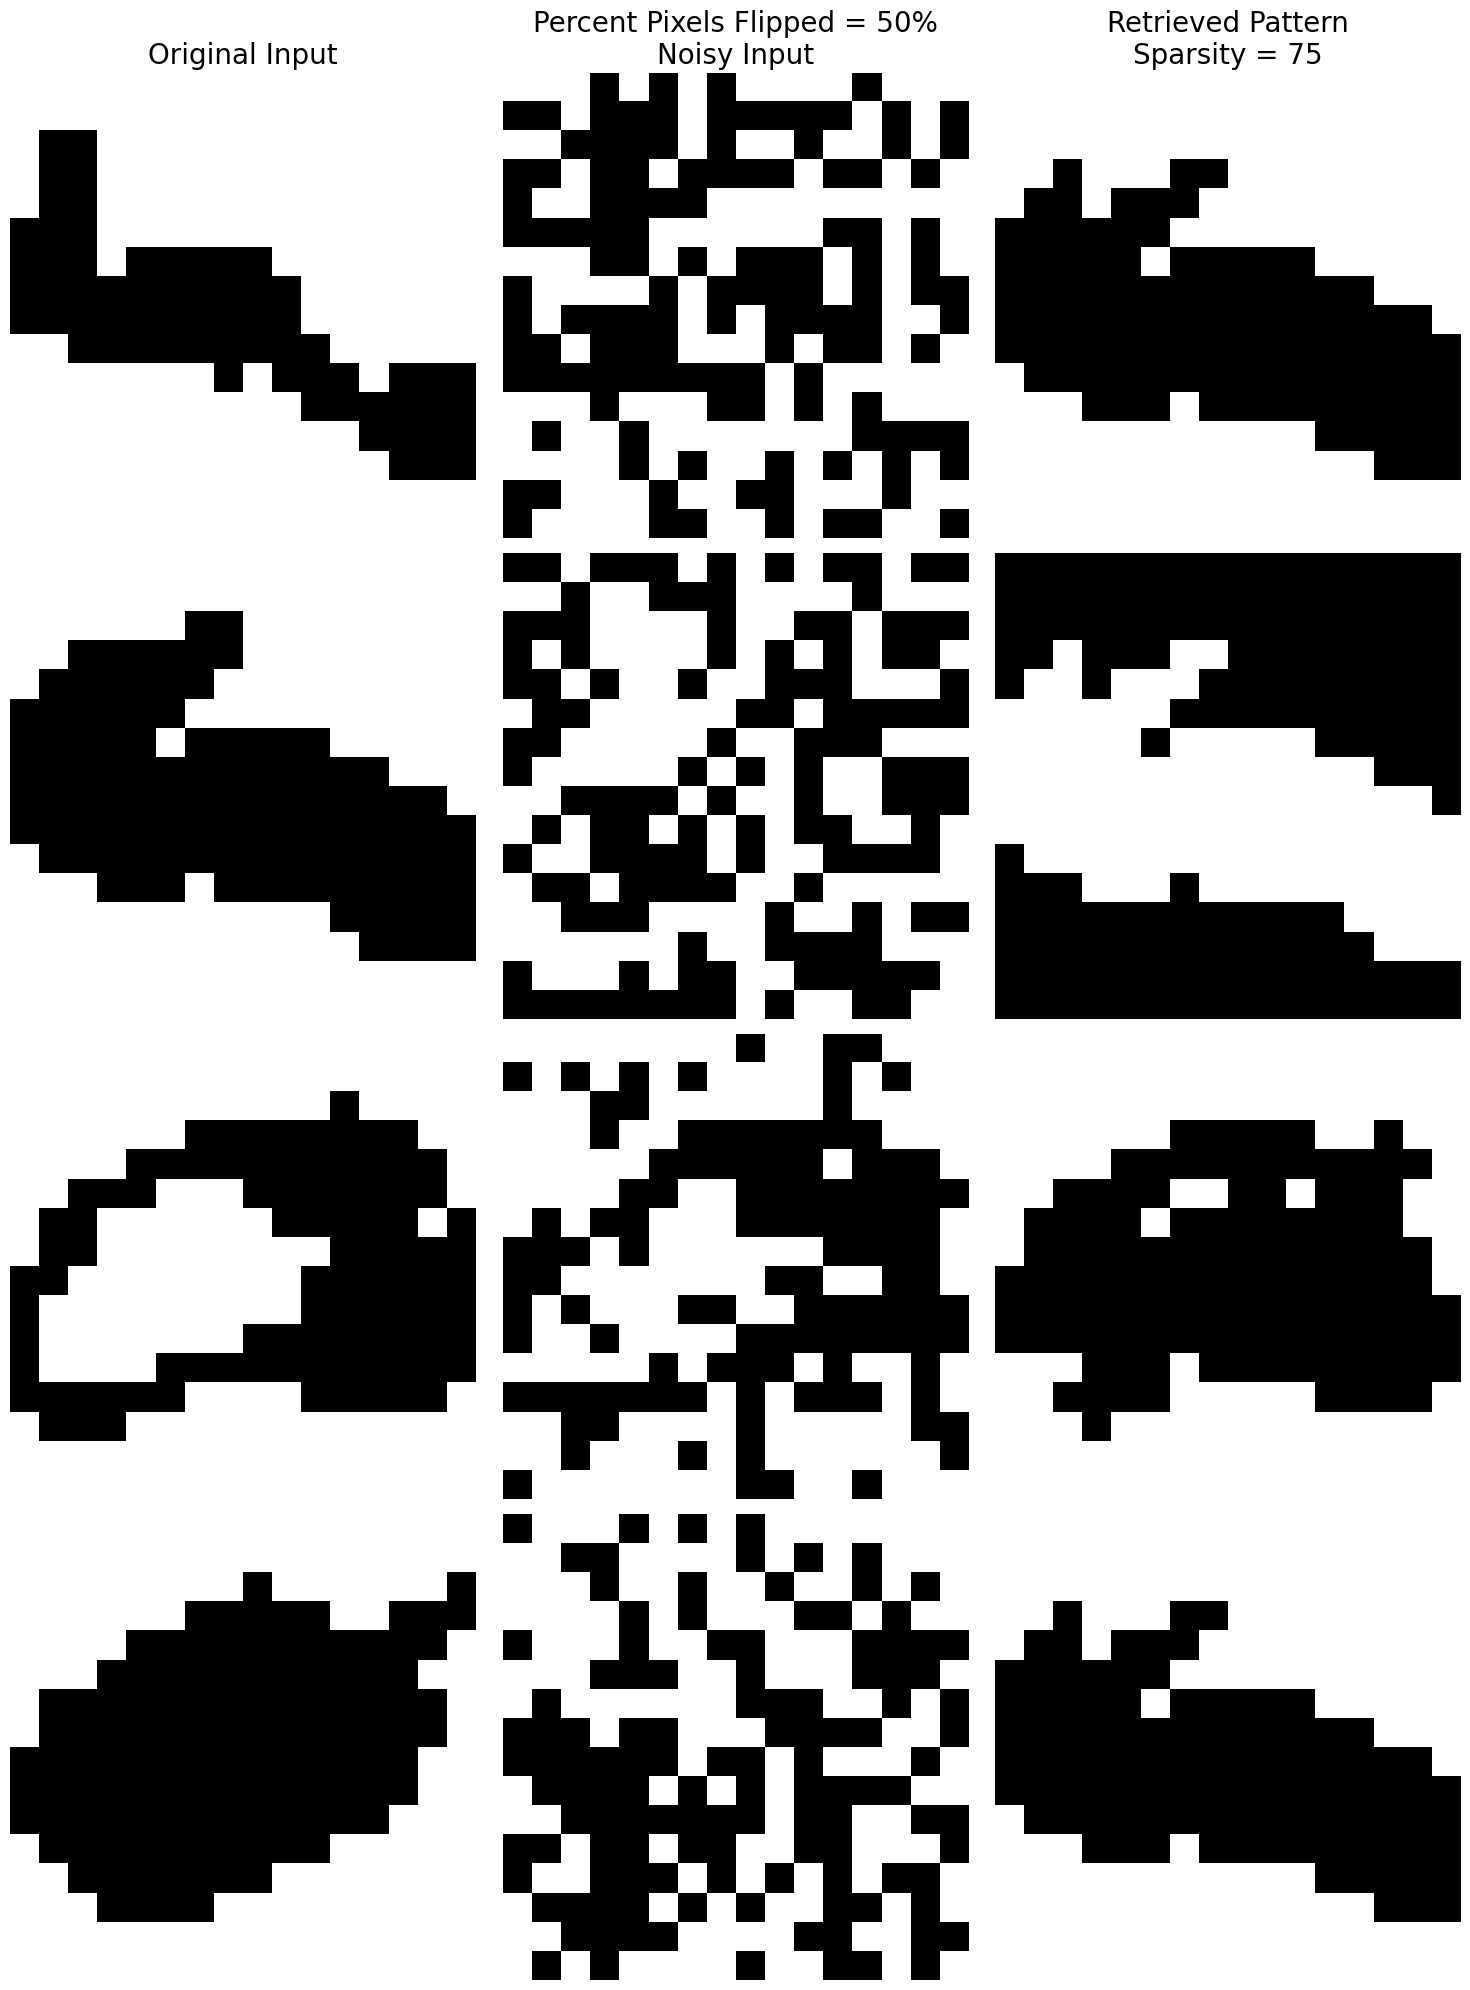

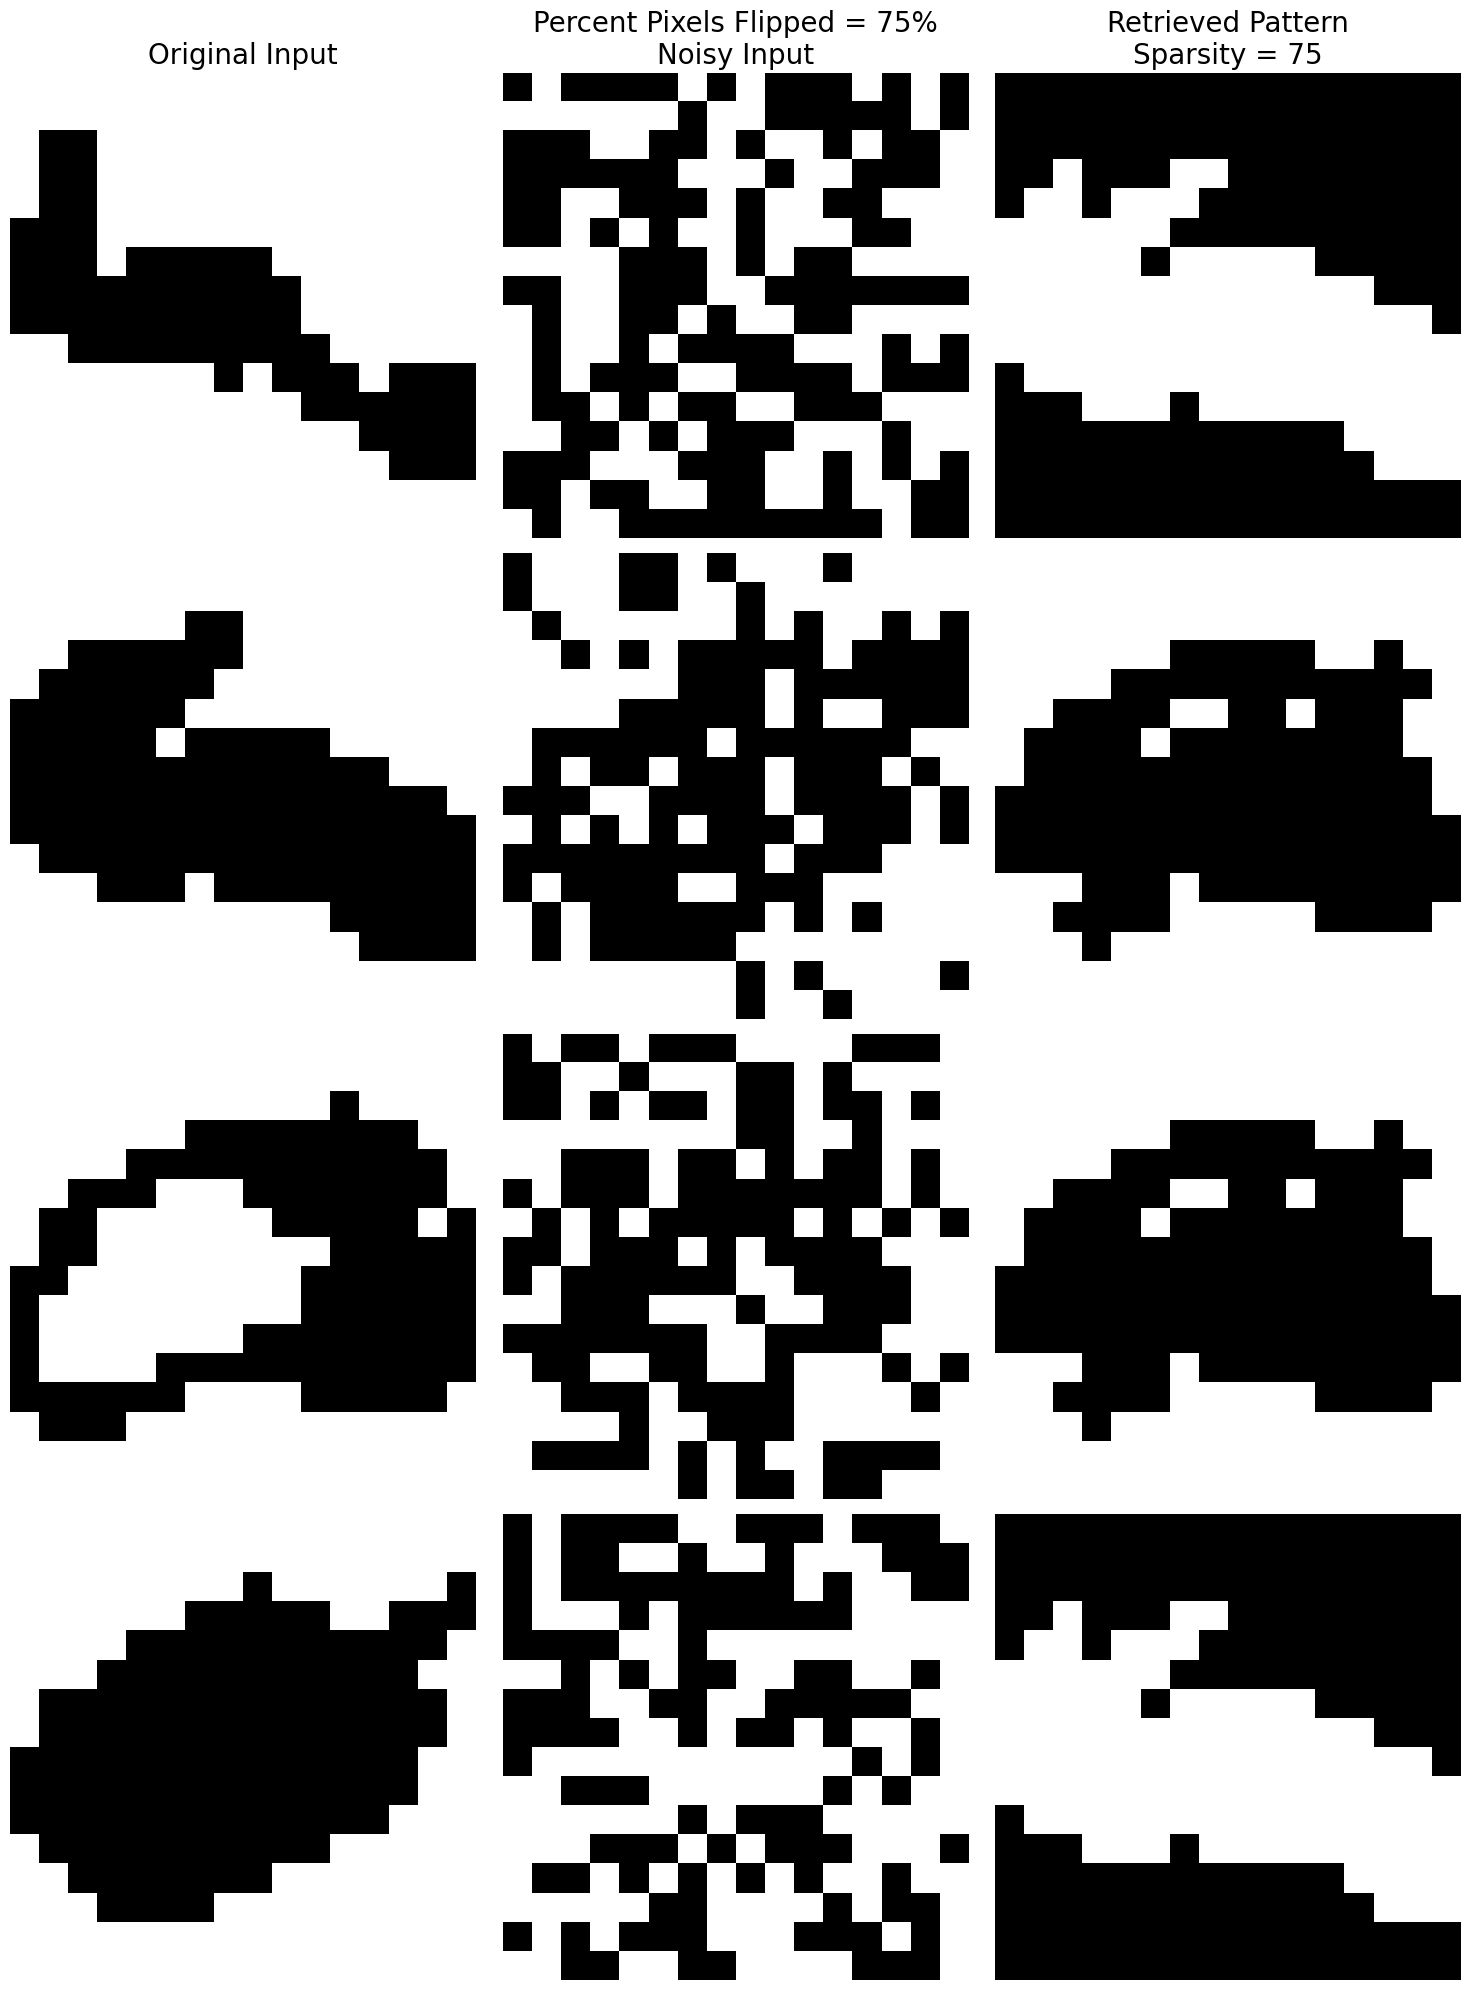

In [14]:
def sparse_pruning(weight_matrix, sparsity, show_plot) -> torch.Tensor:
    """
    Apply sparse pruning the weight matrix a Hopfield network
    
    Args:
        weight_matrix (torch.Tensor): The weight matrix of the Hopfield network.
        sparsity (float): The desired sparsity level, a percentage between 0 and 100.
    
    Returns:
        torch.Tensor: The pruned weight matrix.
    """
    
    # Plot the initial weight matrix
    if show_plot:
        plt.figure(2)
        weight_map = plt.imshow(weight_matrix, cmap=cm.coolwarm)
        color_bar = plt.colorbar(weight_map)
        color_bar.ax.tick_params(labelsize=11)
        plt.title("Initial Weight Matrix")
    
    indices = weight_matrix.flatten(0)
    num_weights = len(indices)
    num_pruned_weights = int(num_weights * (sparsity / 100))
    
    # No weights to prune
    if num_pruned_weights == 0:
        return weight_matrix

    indices_to_prune = np.random.choice(num_weights, num_pruned_weights, replace=False)
    
    pruned_weight_matrix = weight_matrix.clone()
    flat_pruned_weight_mat = pruned_weight_matrix.flatten()
    flat_pruned_weight_mat[indices_to_prune] = 0
    pruned_weight_matrix = flat_pruned_weight_mat.view(weight_matrix.size(0), weight_matrix.size(0))
    
    # Plot the pruned weight matrix
    if show_plot:
        plt.figure(3)
        weight_map = plt.imshow(pruned_weight_matrix, cmap=cm.coolwarm)
        color_bar = plt.colorbar(weight_map)
        color_bar.ax.tick_params(labelsize=11)
        plt.title(f"Pruned Weight Matrix of Sparsity {sparsity}%", fontsize=13)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)
        plt.show()
    
    return pruned_weight_matrix

def run_sparse_pruning(weight, binary_inputs, noisy_inputs, sparsity, bias, show_plot) -> None:
    """
    Runs a trial with the sparsity level
    
    Args:
        sparsity (float): The desired sparsity level, a percentage between 0 and 100.
        bias (torch.Tensor): The bias for the Hopfield network.
        pruning_method (str): The method of pruning to be used.
    """
    pruned_weight = sparse_pruning(weight, sparsity, show_plot)
    model = HopfieldNetwork(num_neurons, pruned_weight, bias)

    async_update = True
    pruning = {'sparse': sparsity}

    sparse_pruned_pat = model.retrieve(dim, weight, binary_inputs, noisy_inputs, flipped_percents, num_iterations, async_update, pruning, show_plot)
    
    return sparse_pruned_pat
    
def compare_sparse_pruning(weight, binary_inputs, noisy_inputs, sparsities, bias, show_plot) -> dict:
    """
    Compare the performance of the Hopfield network with different sparsity levels

    Args:
        sparsities (list): List of sparsity levels
        
    Returns:
        dict: A dictionary containing the retrieved patterns for each sparsity level.
    """
    
    sparse_pruned_patterns = {}
    for sparsity in sparsities:
        print(f"Running trial with a sparsity of {sparsity}")
        sparse_pruned_patterns[sparsity] = run_sparse_pruning(weight, binary_inputs, noisy_inputs, sparsity, bias, show_plot)
    
    return sparse_pruned_patterns

sparsities = [25, 50, 75]
sparse_pruned_patterns = compare_sparse_pruning(weight, binary_inputs, noisy_inputs, sparsities, bias, show_plot=True)

# Sparse pruning spectrum

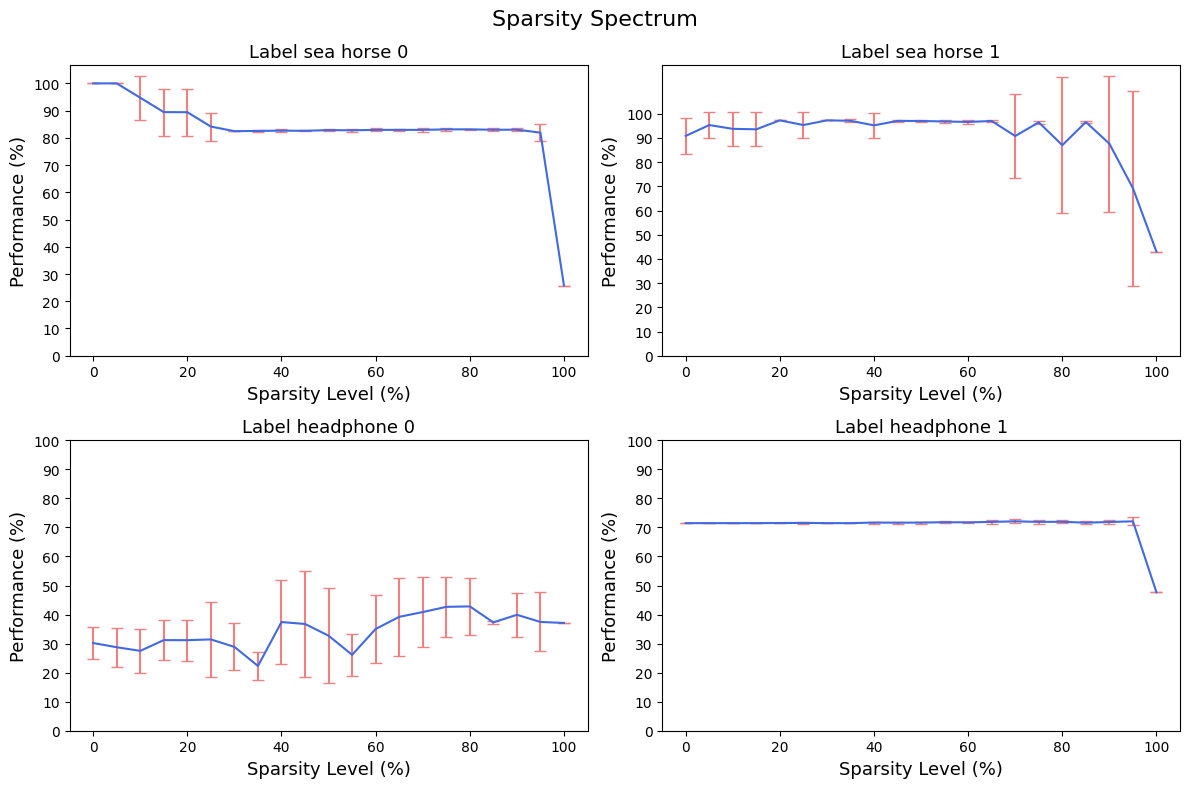

In [15]:
num_models = 10
sparsities_spectrum = np.arange(0, 101, 5)

# Separate the sparsity performace for each input
sparsities_perf = {i: [] for i in range(len(noisy_inputs))} 
sparsities_mean = {i: [] for i in range(len(noisy_inputs))}
sparsities_std = {i: [] for i in range(len(noisy_inputs))} 

for sparsity in sparsities_spectrum:
    for i, binary_input in enumerate(binary_inputs):
        performances = []
        for _ in range(num_models):
            sparse_pruned_pattern = run_sparse_pruning(weight, binary_inputs, noisy_inputs, sparsity, bias, show_plot=False)
            sparse_pruned_pattern = sparse_pruned_pattern[i]
            perf = pruning_performance(binary_input, sparse_pruned_pattern)
            performances.append(perf)
        sparsities_perf[i].append(np.mean(performances))
        sparsities_mean[i].append(np.mean(performances))
        sparsities_std[i].append(np.std(performances))

def plot_sparsities_spectrum(sparsities_spectrum, sparsities_perf, selected_labels, num_labels, num_images_per_label):
    num_rows = num_labels
    num_cols = num_images_per_label

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 4 * num_rows))
    fig.suptitle("Sparsity Spectrum", fontsize=16)

    # Ensure axs is always 2D
    if num_rows == 1 or num_cols == 1:
        axs = np.atleast_2d(axs).reshape(num_rows, num_cols)
    
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            # performance = sparsities_perf[idx]
            mean_perf = sparsities_mean[idx]
            std_perf = sparsities_std[idx]
            label = selected_labels[idx]
            
            axs[i, j].errorbar(sparsities_spectrum, mean_perf, yerr=std_perf, color='royalblue', ecolor='lightcoral', capsize=4)
            axs[i, j].set_xlabel('Sparsity Level (%)', fontsize=13)
            axs[i, j].set_ylabel('Performance (%)', fontsize=13)
            axs[i, j].set_yticks(range(0, 101, 10), fontsize=10)
            axs[i, j].set_title(f'Label {label} {j}', fontsize=13)
            axs[i, j].axis('on')

    plt.tight_layout()
    plt.xticks(fontsize=10)
    plt.savefig(f"./images/spectrum/sparsity_spectrum.png")
    plt.show()
    plt.close(fig)

plot_sparsities_spectrum(sparsities_spectrum, sparsities_perf, selected_labels, num_labels, num_images_per_label)

# Magnitude Pruning

In [16]:
def magnitude_pruning(weight_matrix, threshold, show_plot) -> torch.Tensor:
    """
    Apply sparse pruning the weight matrix a Hopfield network
    
    Args:
        weight_matrix (torch.Tensor): The weight matrix of the Hopfield network.
        threshold (float): The desired magnitude threshold to keep
    
    Returns:
        torch.Tensor: The pruned weight matrix.
    """
    
    # Plot the initial weight matrix
    if show_plot:
        plt.figure(2)
        weight_map = plt.imshow(weight_matrix, cmap=cm.coolwarm)
        plt.colorbar(weight_map)
        plt.title("Initial Weight Matrix")
    
    weight_arr = weight_matrix.flatten().clone()
    indices_to_prune = torch.abs(weight_arr) <= threshold
    weight_arr[indices_to_prune] = 0
    
    pruned_weight_matrix = weight_arr.view(weight_matrix.size(0), weight_matrix.size(0)).clone().detach()
    
    # Plot the pruned weight matrix
    if show_plot:
        plt.figure(3)
        weight_map = plt.imshow(pruned_weight_matrix, cmap=cm.coolwarm)
        plt.colorbar(weight_map)
        plt.title(f"Pruned Weight Matrix of Magnitude Threshold {threshold:.2f}", fontsize=10)
        plt.show()

    return pruned_weight_matrix

def run_magnitude_pruning(weight, binary_inputs, noisy_inputs, magnitude, bias, show_plot) -> None:
    """
    Runs a trial with a specified magnitude threshold.
    
    Args:
        threshold (float): The magnitude threshold. Weights above this threshold are retained.
    
    Returns:
        torch.Tensor: 
    """
    pruned_weight = magnitude_pruning(weight, magnitude, show_plot)
    model = HopfieldNetwork(num_neurons, pruned_weight, bias)

    async_update = True
    pruning = {'magnitude': magnitude}

    magnitude_pruned_pat = model.retrieve(dim, weight, binary_inputs, noisy_inputs, flipped_percents, num_iterations, async_update, pruning, show_plot)
    
    return magnitude_pruned_pat
    
def compare_magnitude_pruning(weight, binary_inputs, noisy_inputs, magnitudes, bias, show_plot) -> dict:
    """
    Compare the performance of the Hopfield network with different magnitude levels

    Args:
        magnitudes (list): List of magnitudes
        
    Returns:
        dict: A dictionary containing the retrieved patterns for each magnitude level.
    """
    
    magnitude_pruned_patterns = {}
    for magnitude in magnitudes:
        print(f"Running trial with a magnitude of {magnitude:.2f}")
        magnitude_pruned_patterns[magnitude] = run_magnitude_pruning(weight, binary_inputs, noisy_inputs, magnitude, bias, show_plot)
    
    return magnitude_pruned_patterns

Unique values in the weight matrix:  [0.5, 1.0]
Magnitude values:  [0.   0.25 0.5  0.75 1.  ]
Running trial with a magnitude of 0.00


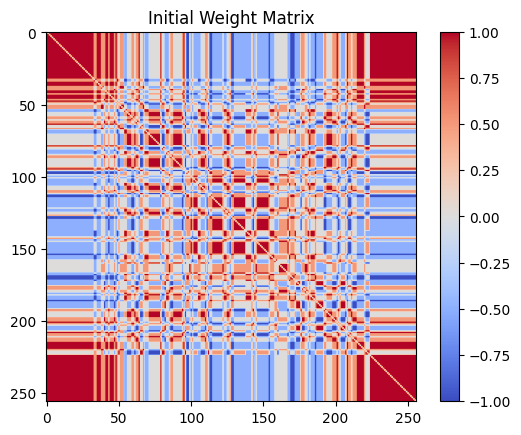

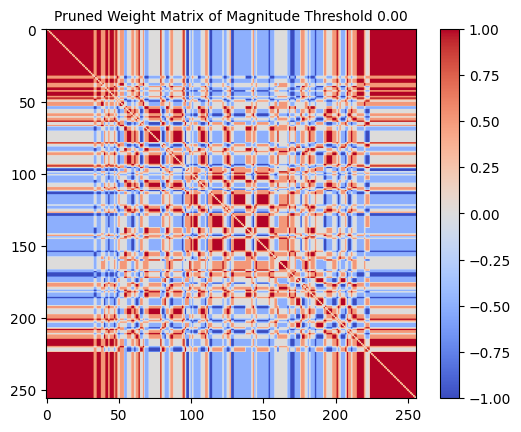

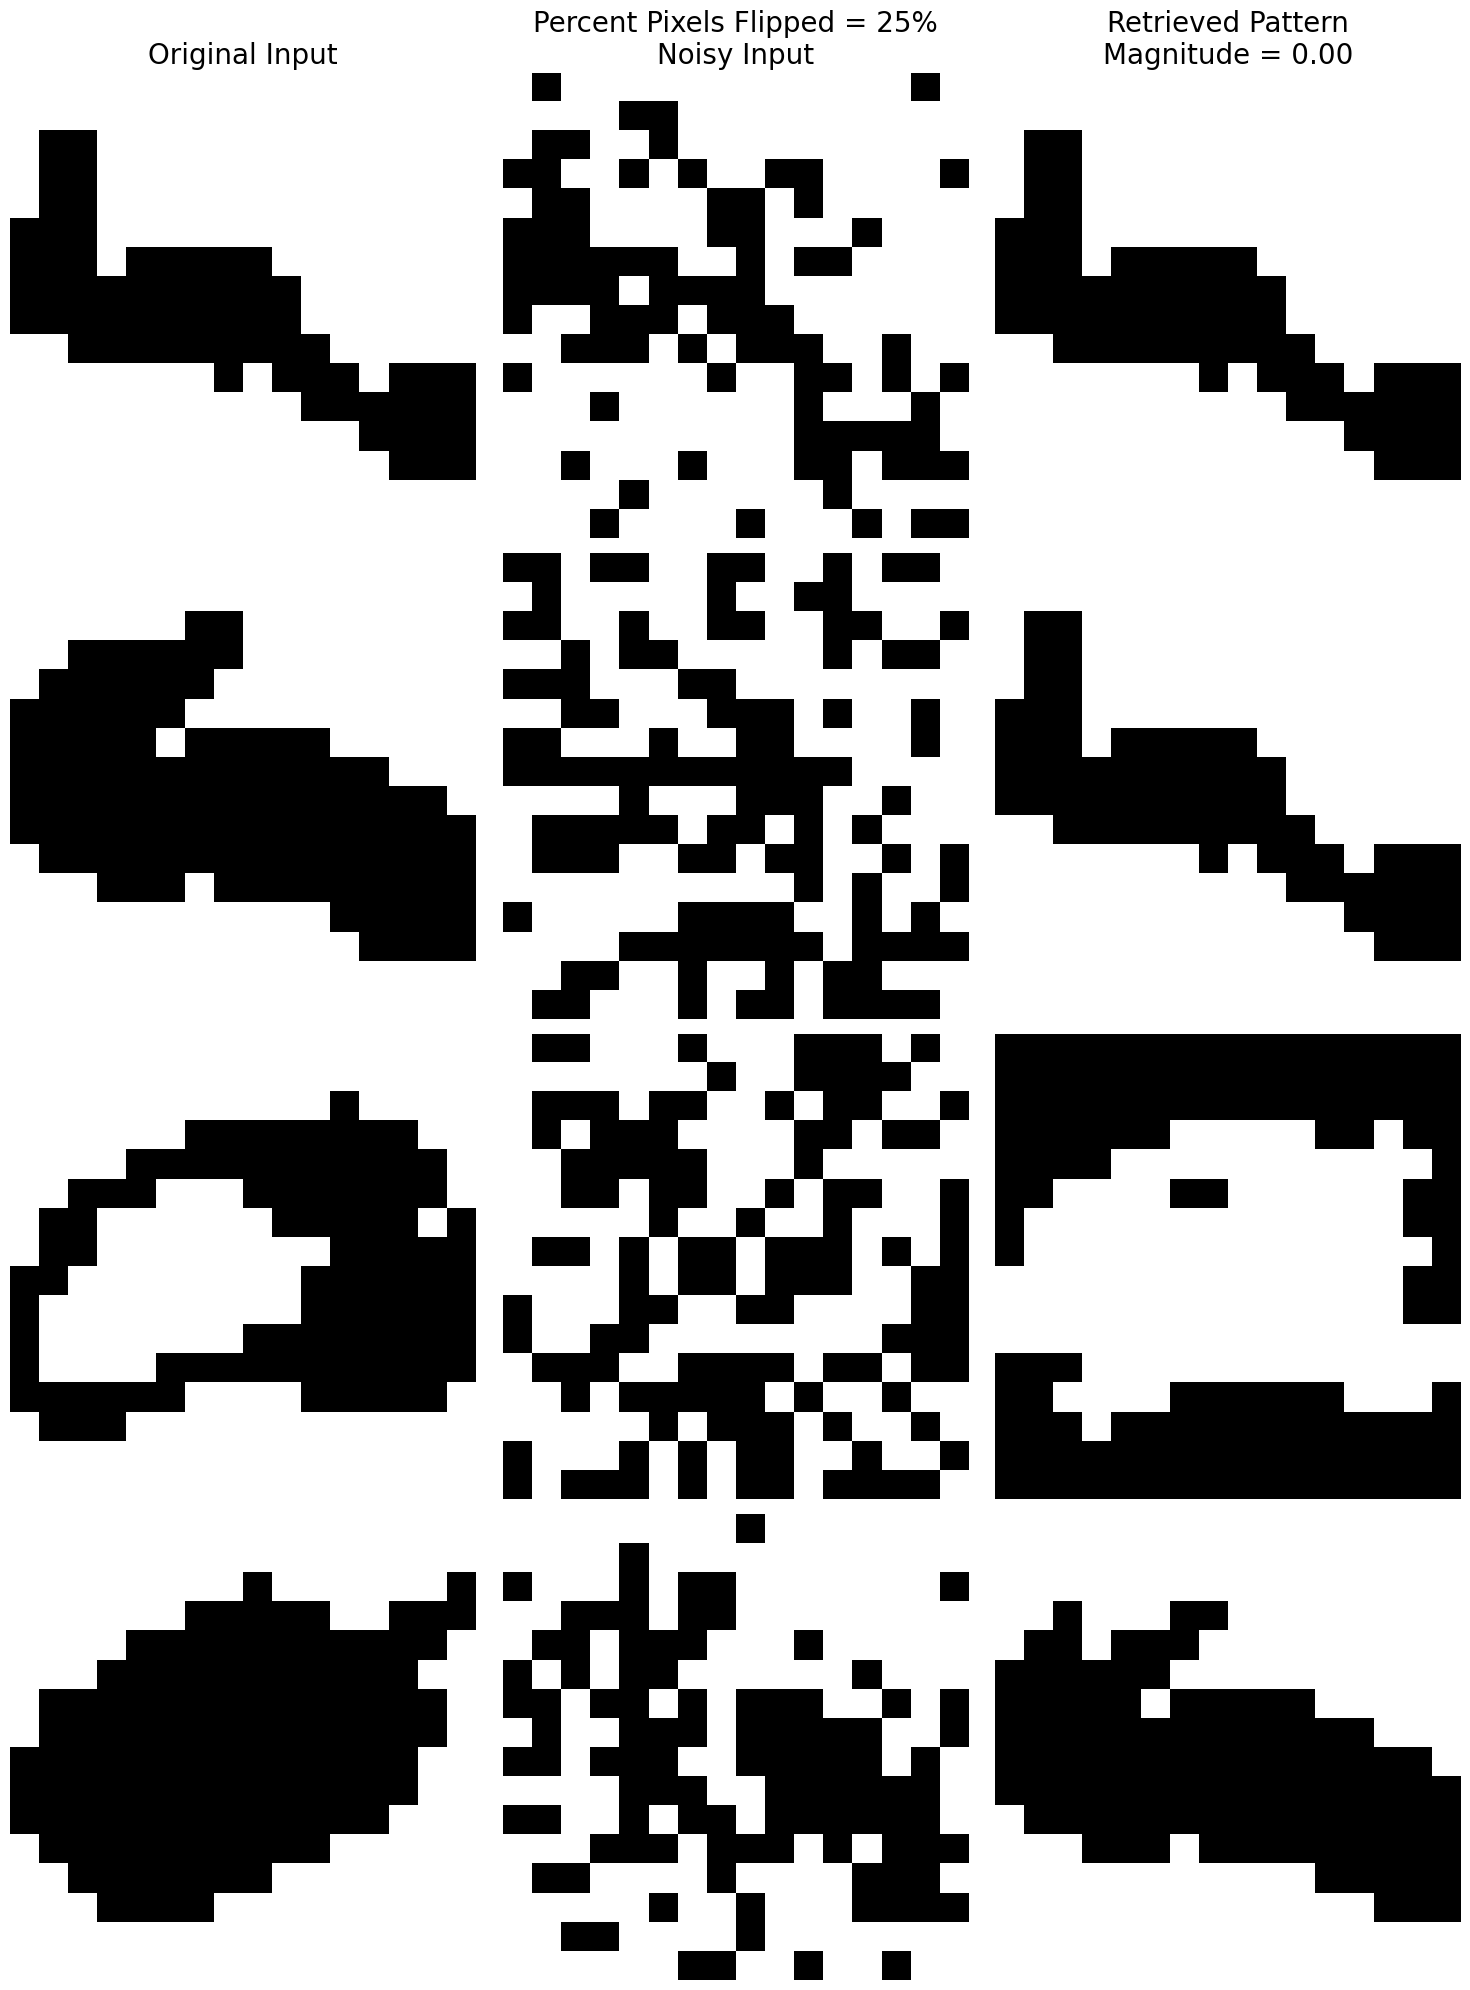

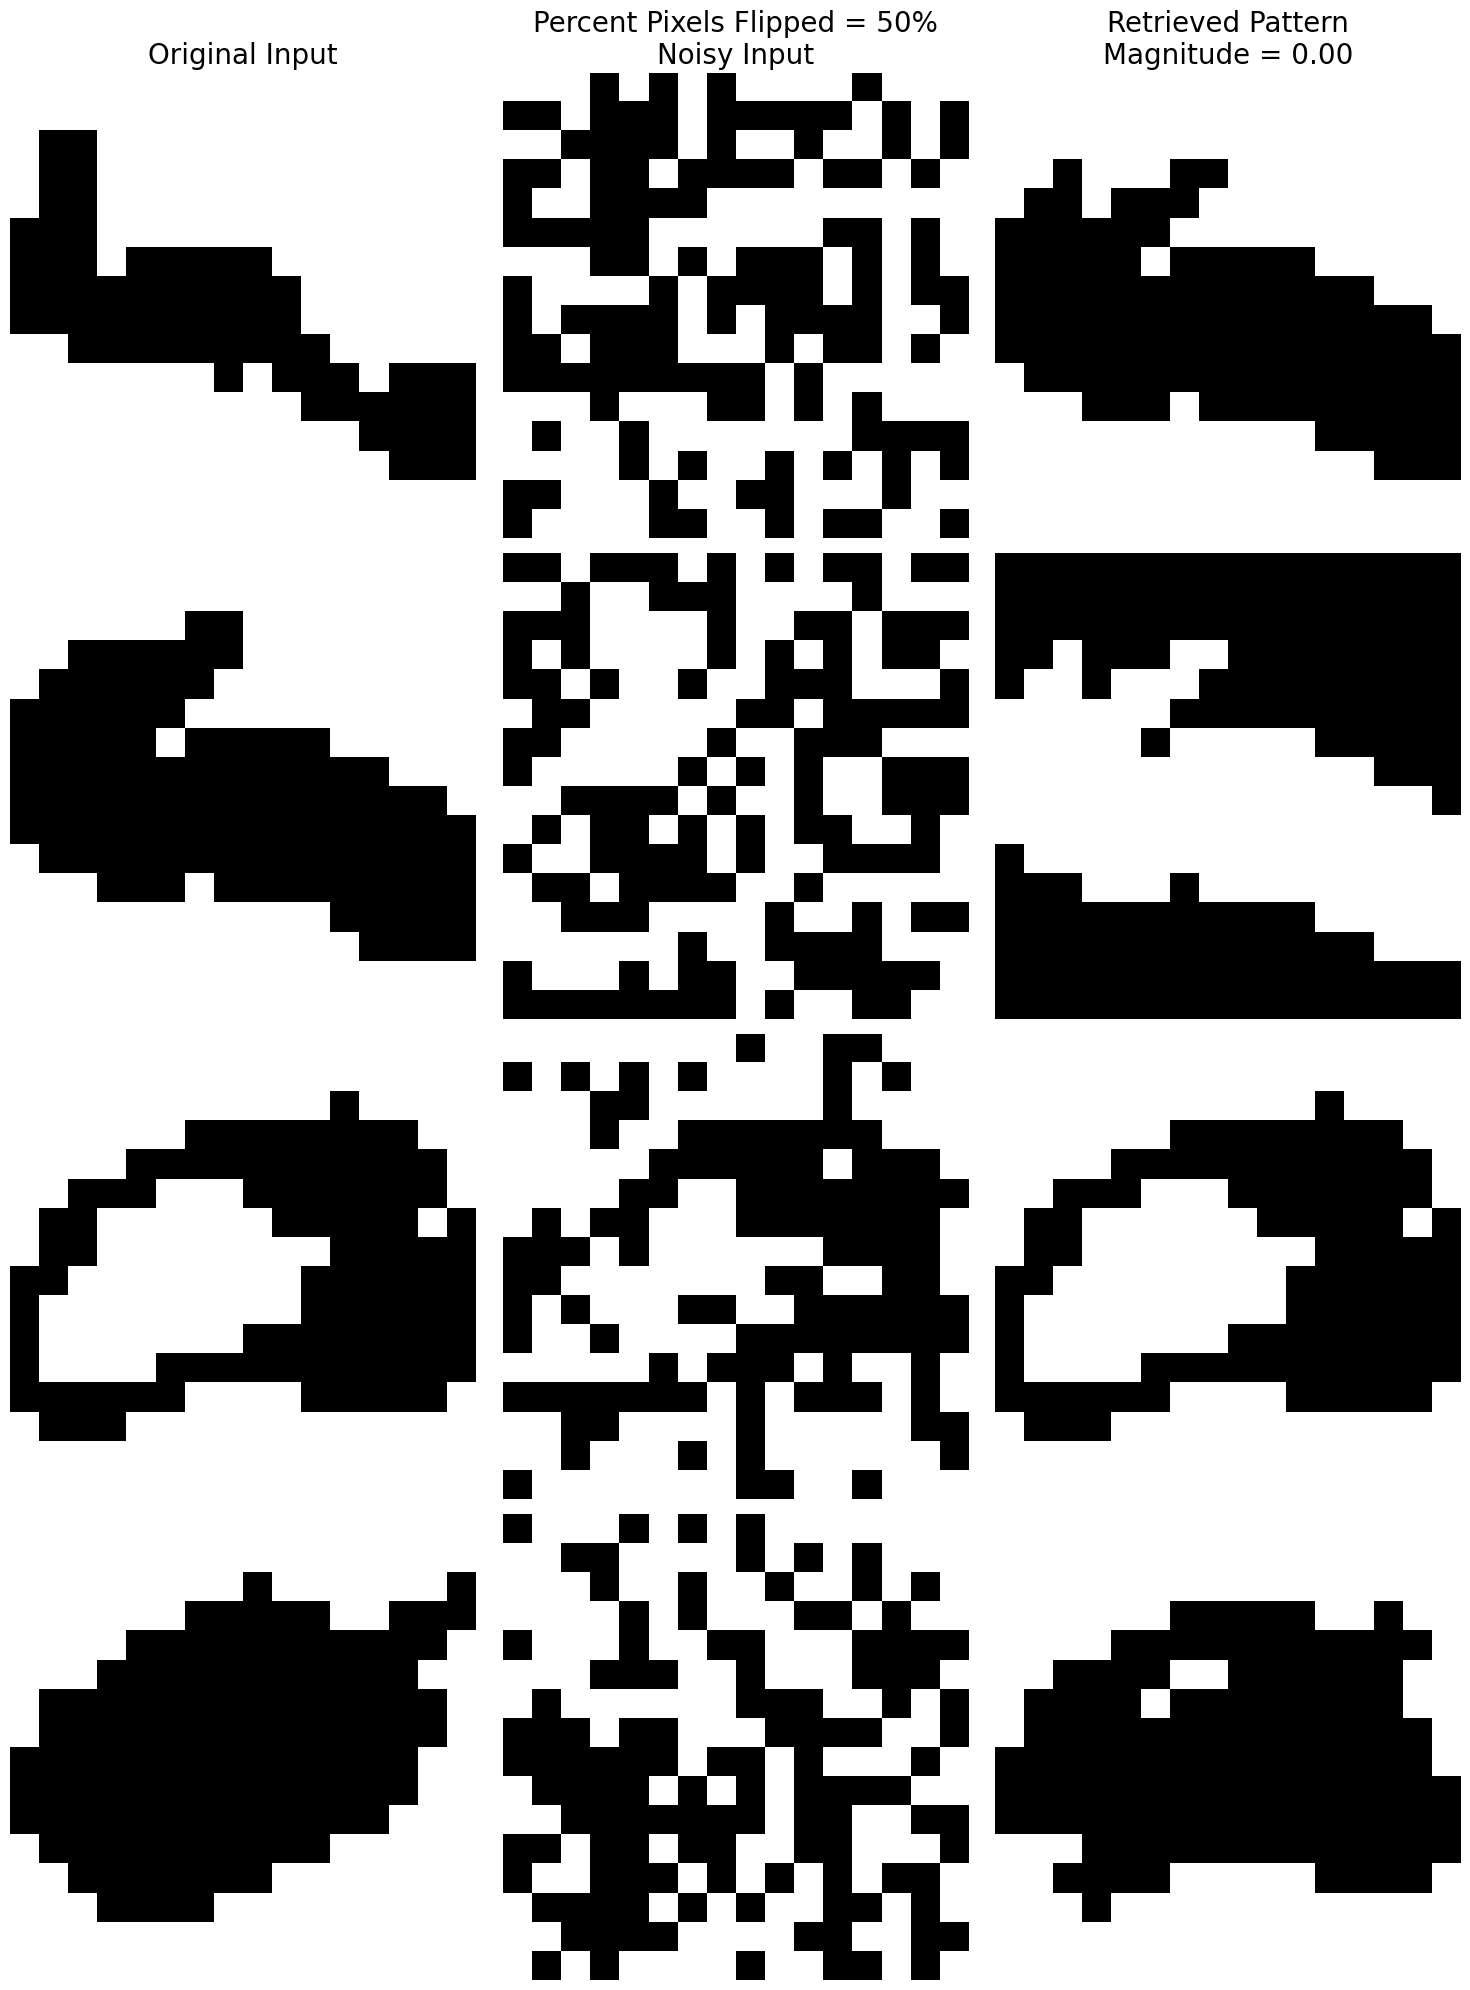

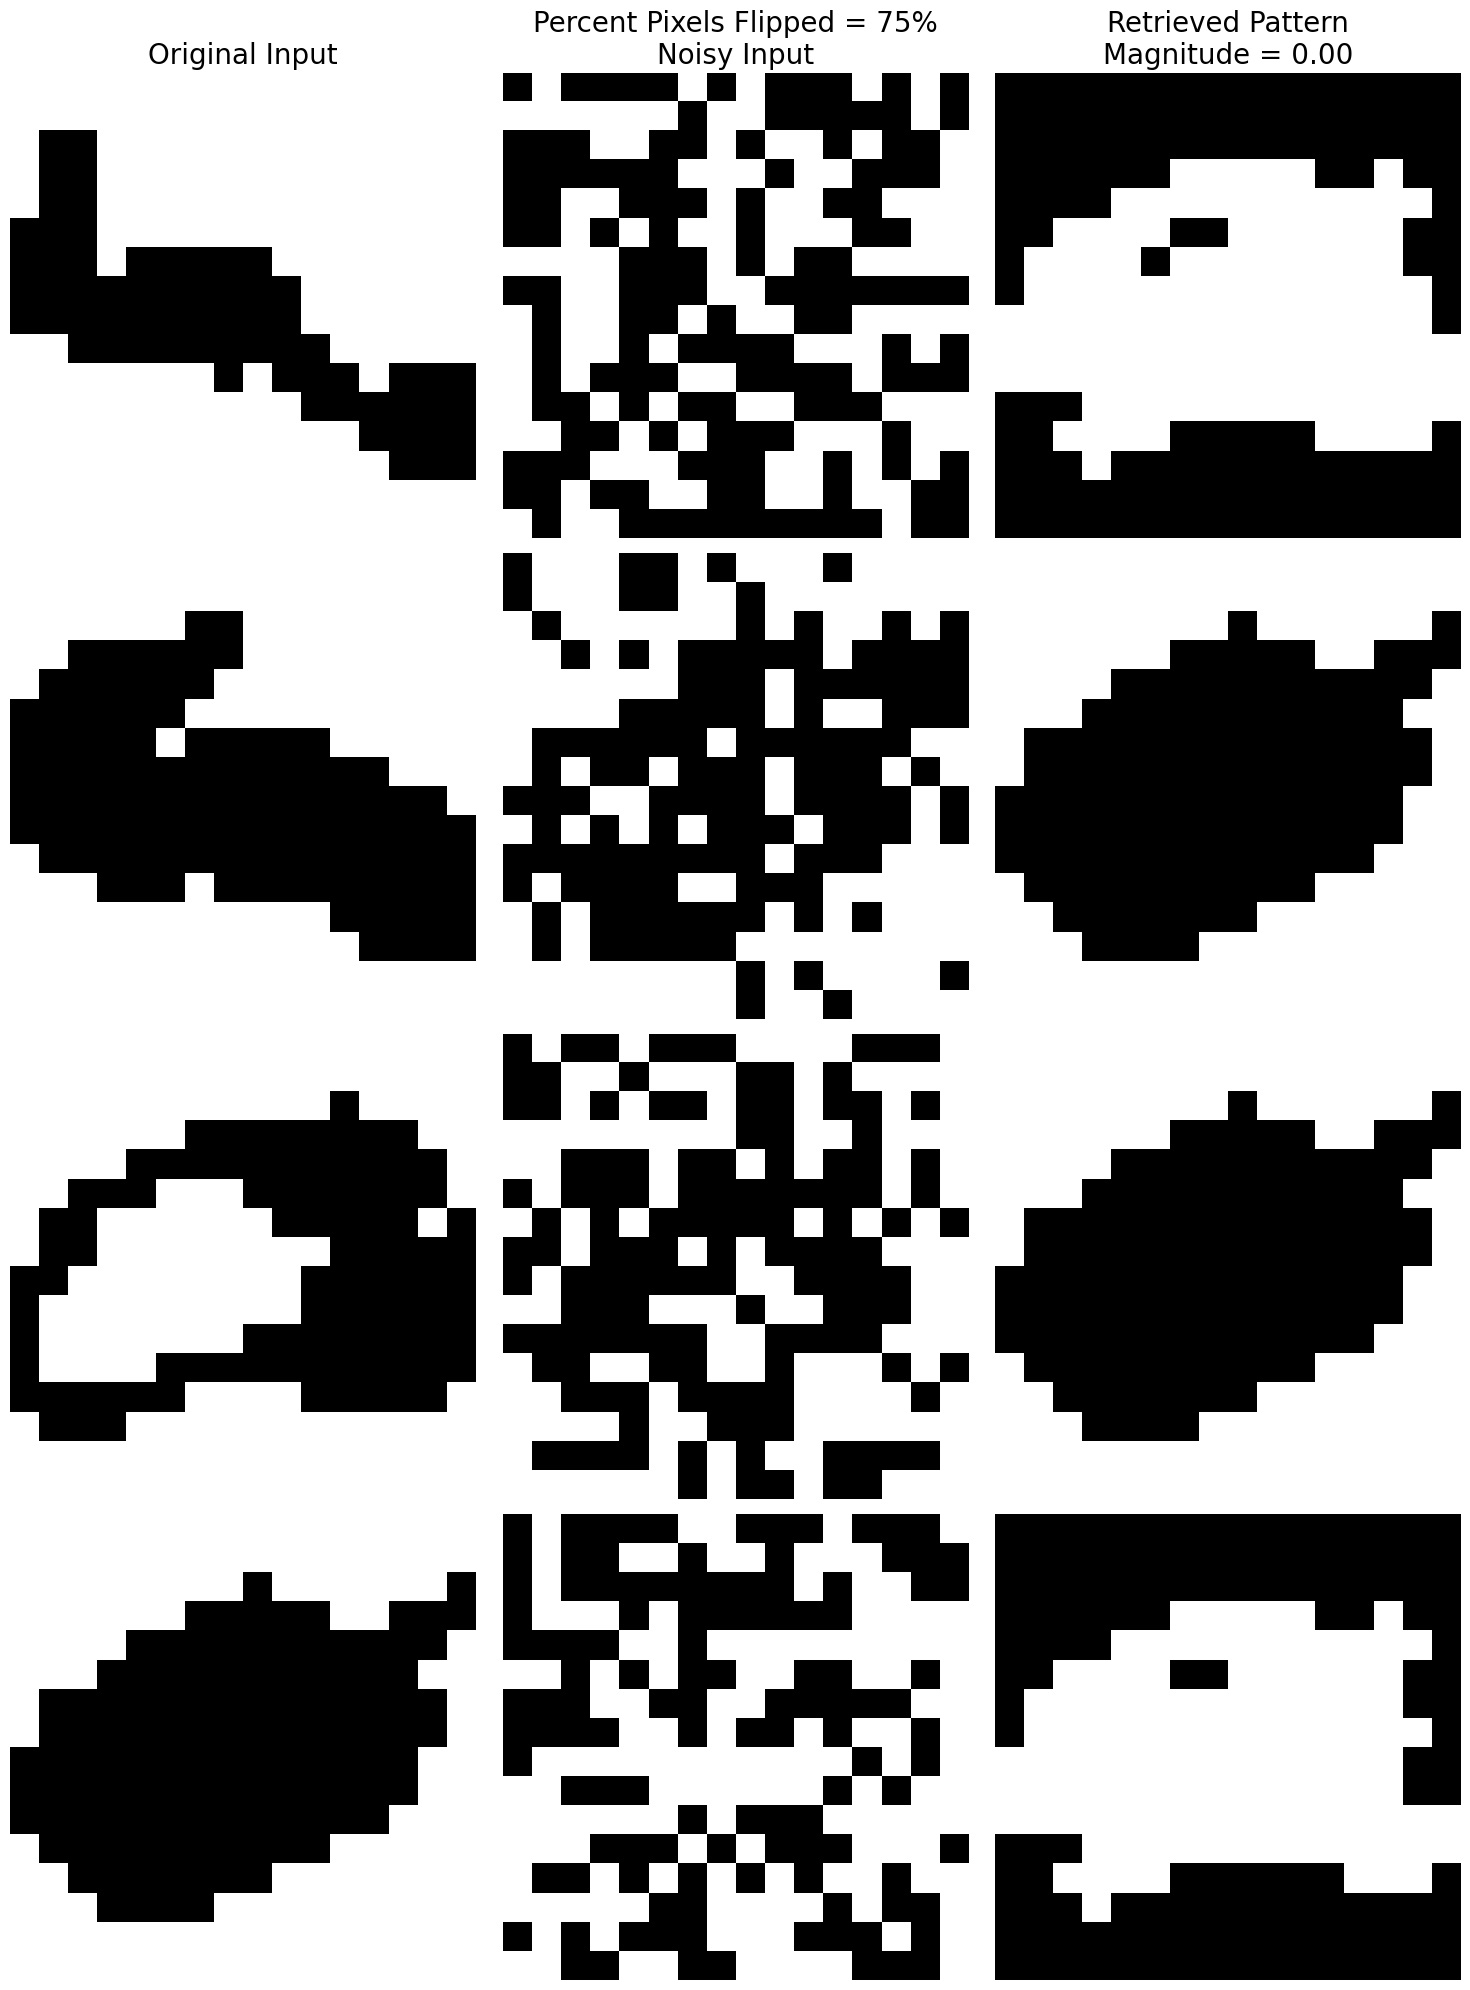

Running trial with a magnitude of 0.25


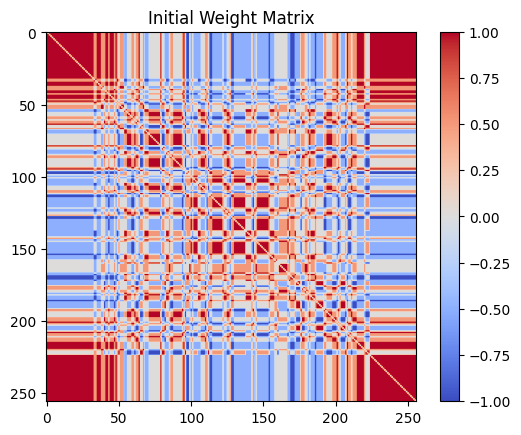

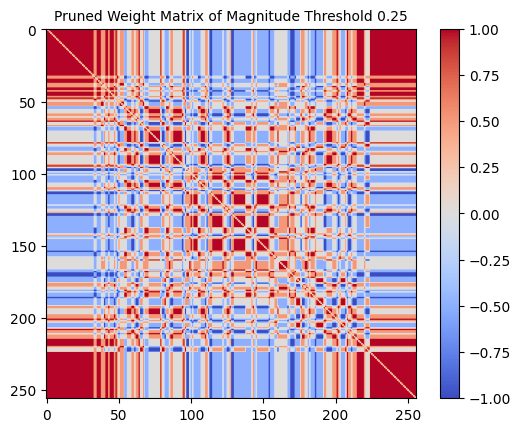

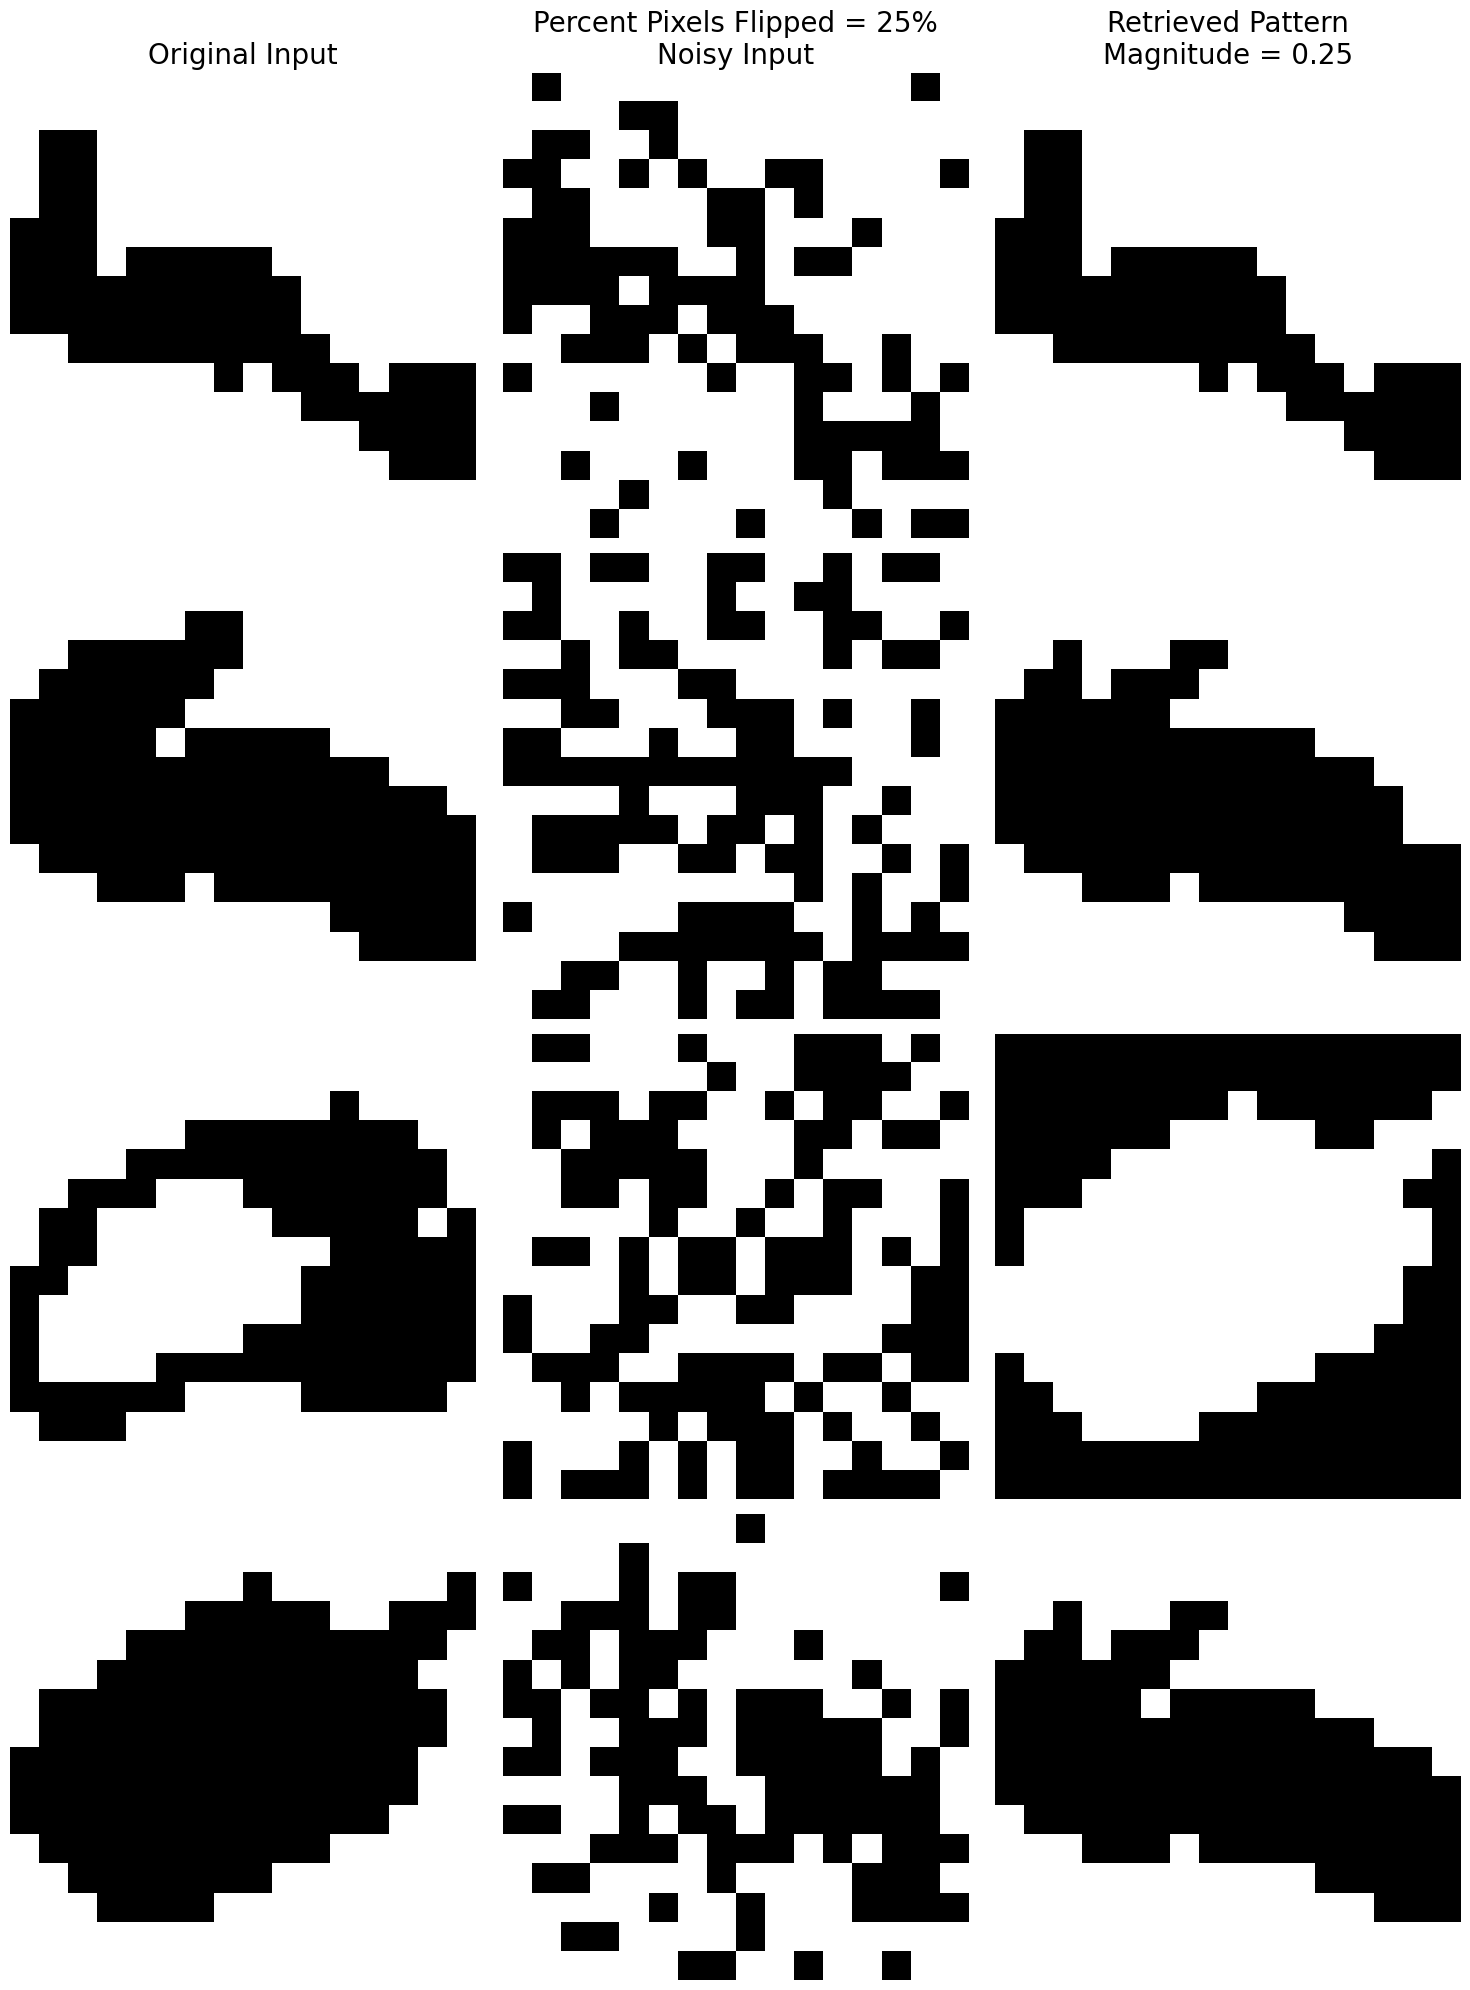

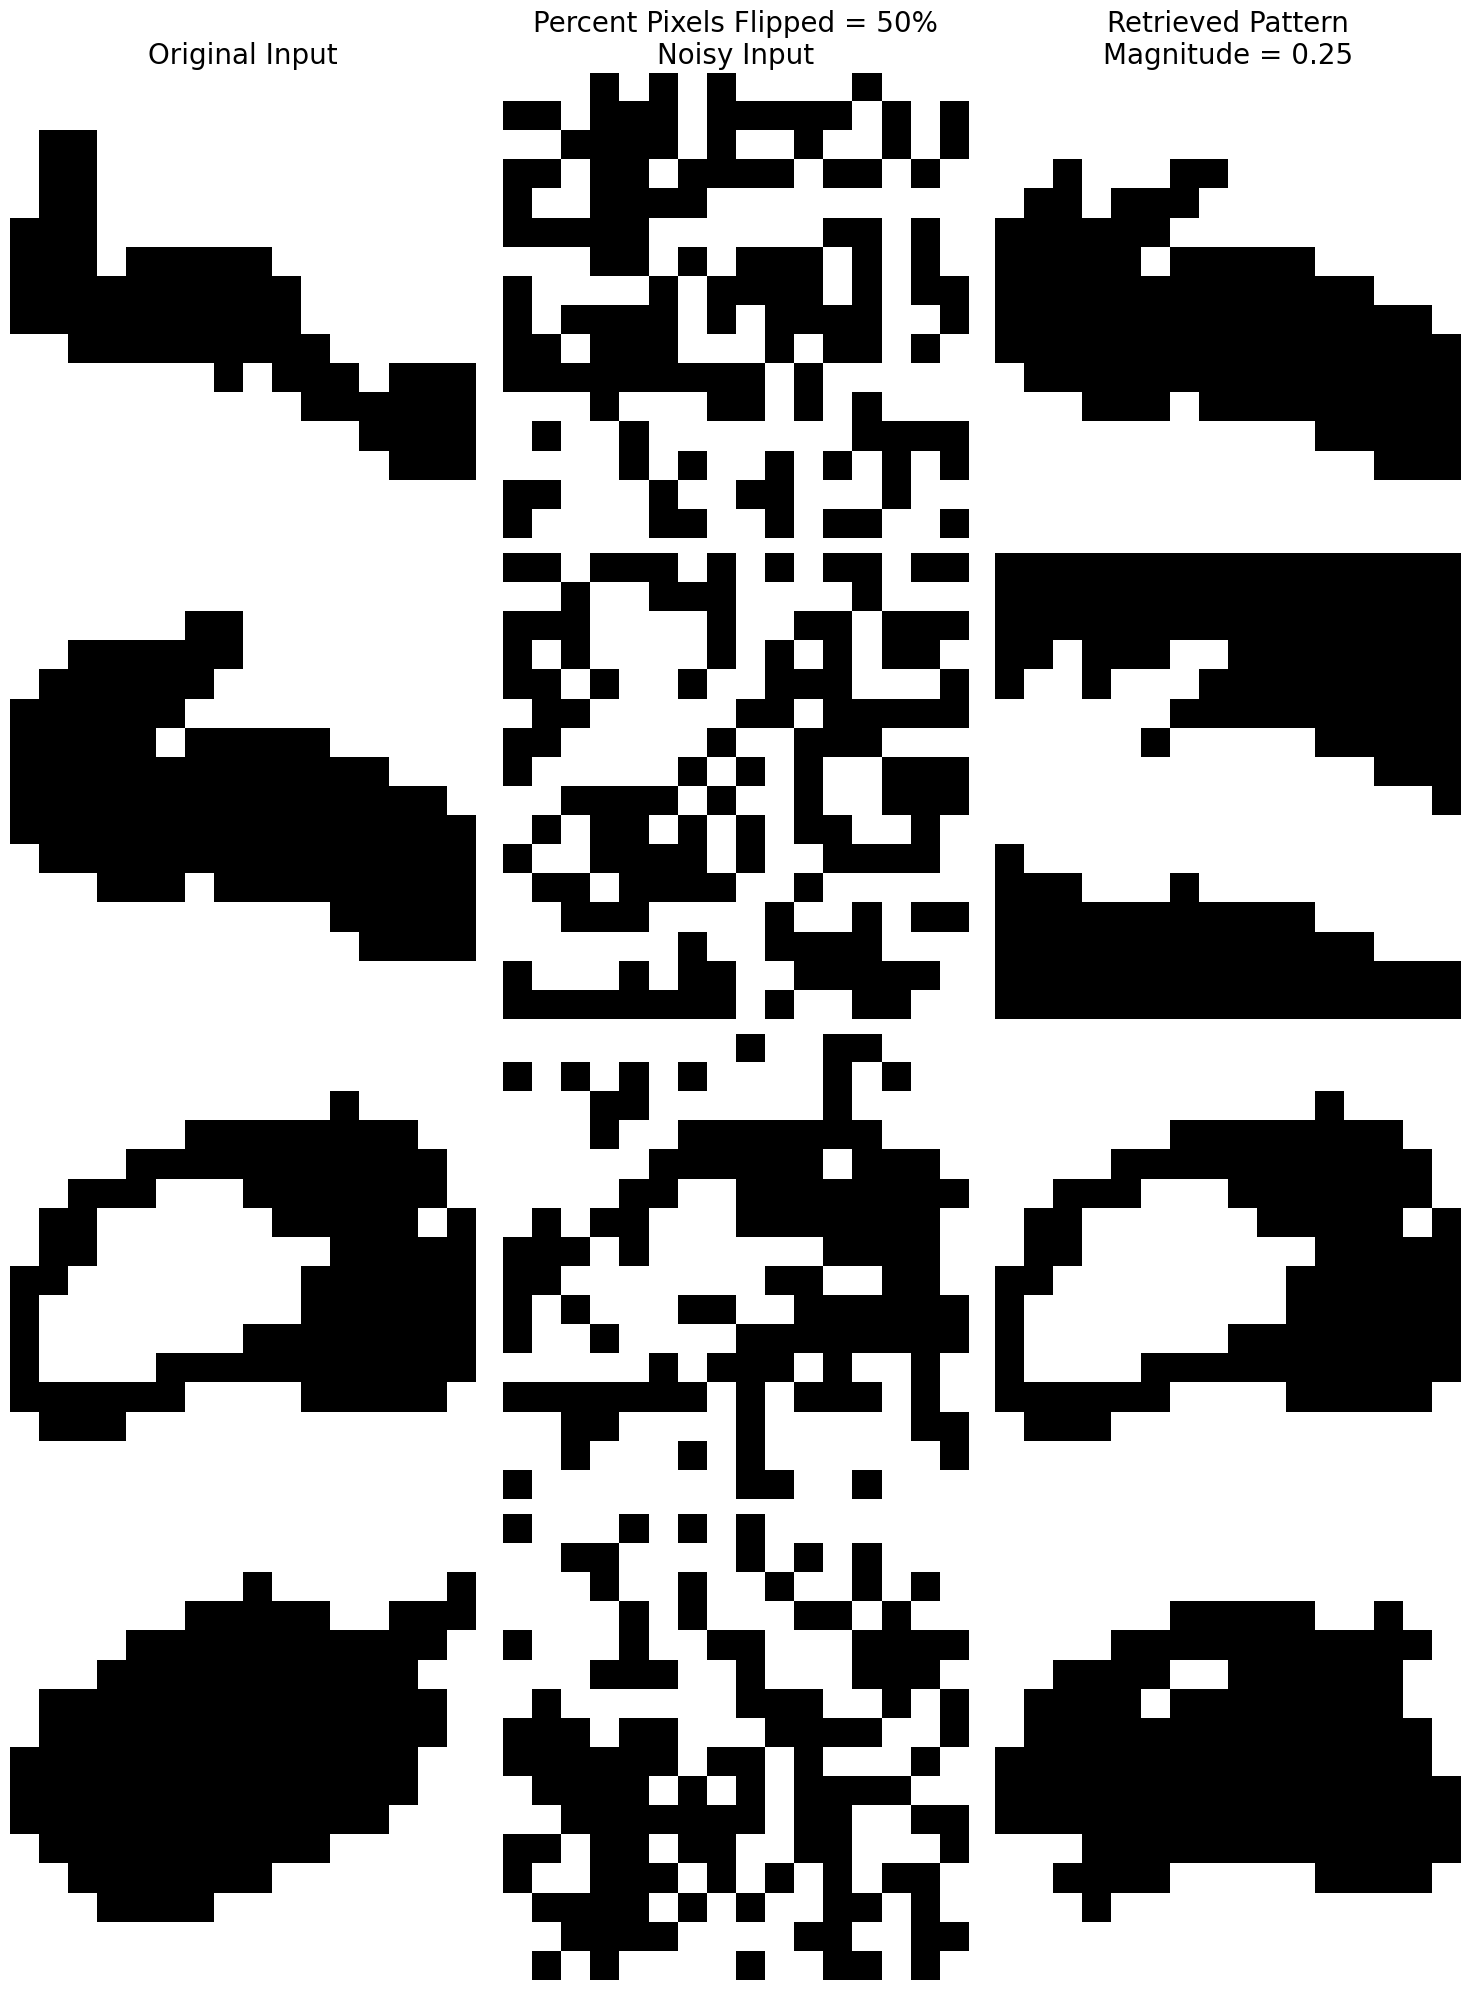

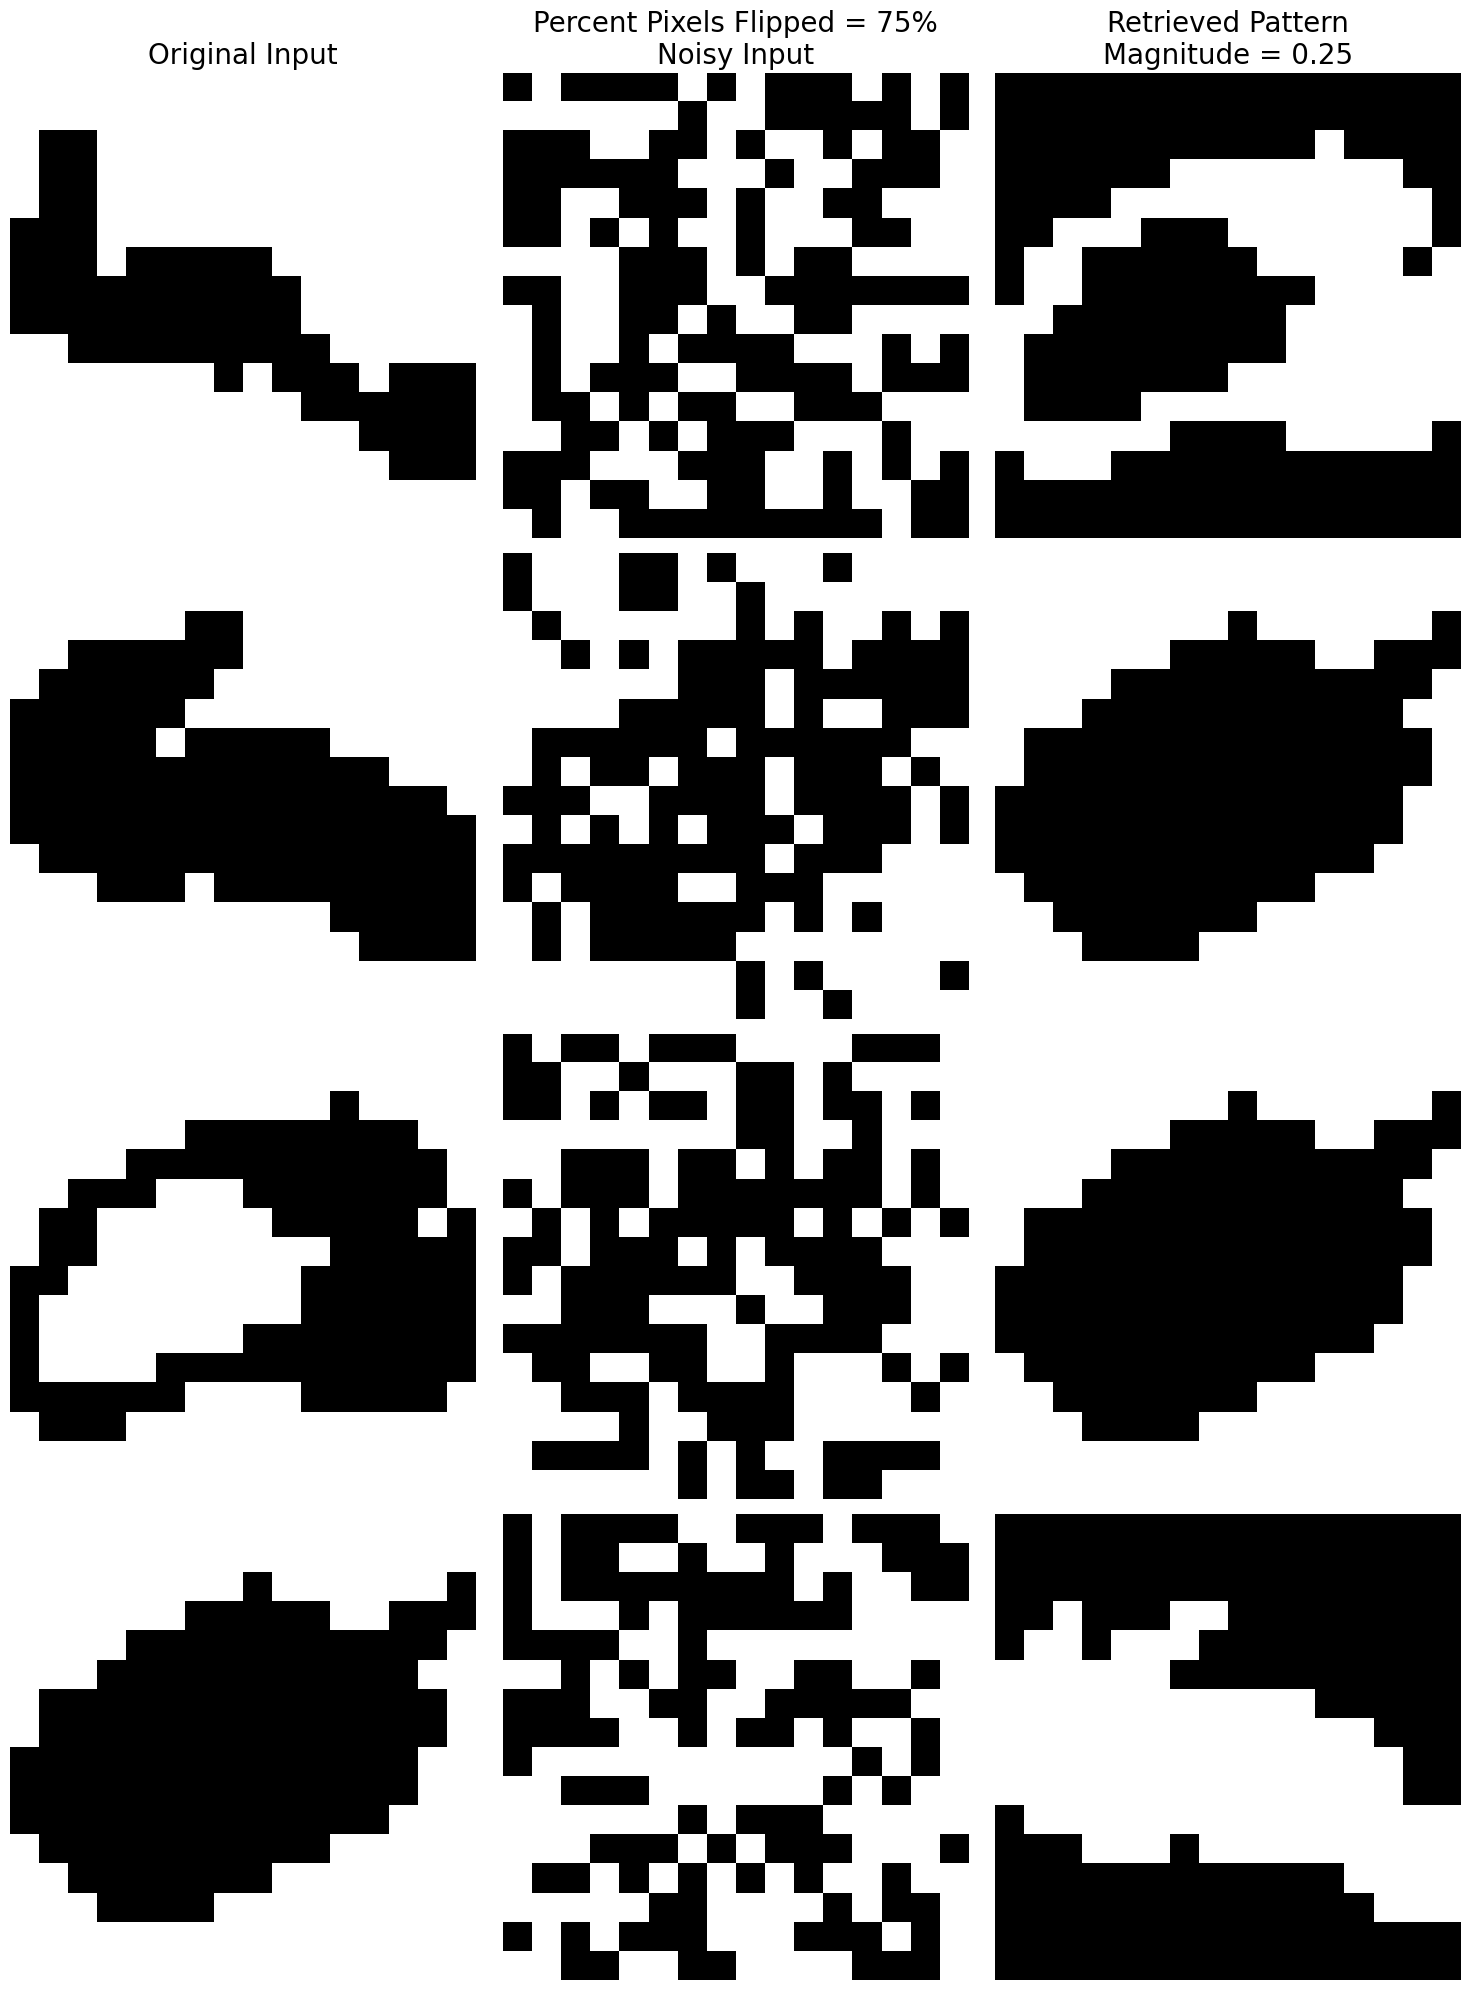

Running trial with a magnitude of 0.50


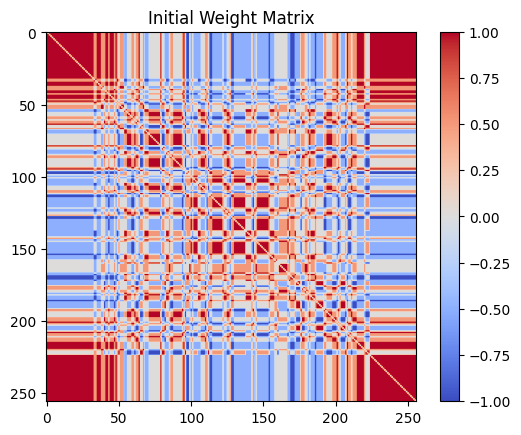

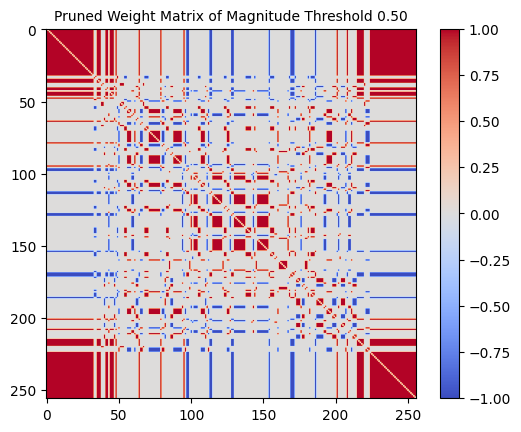

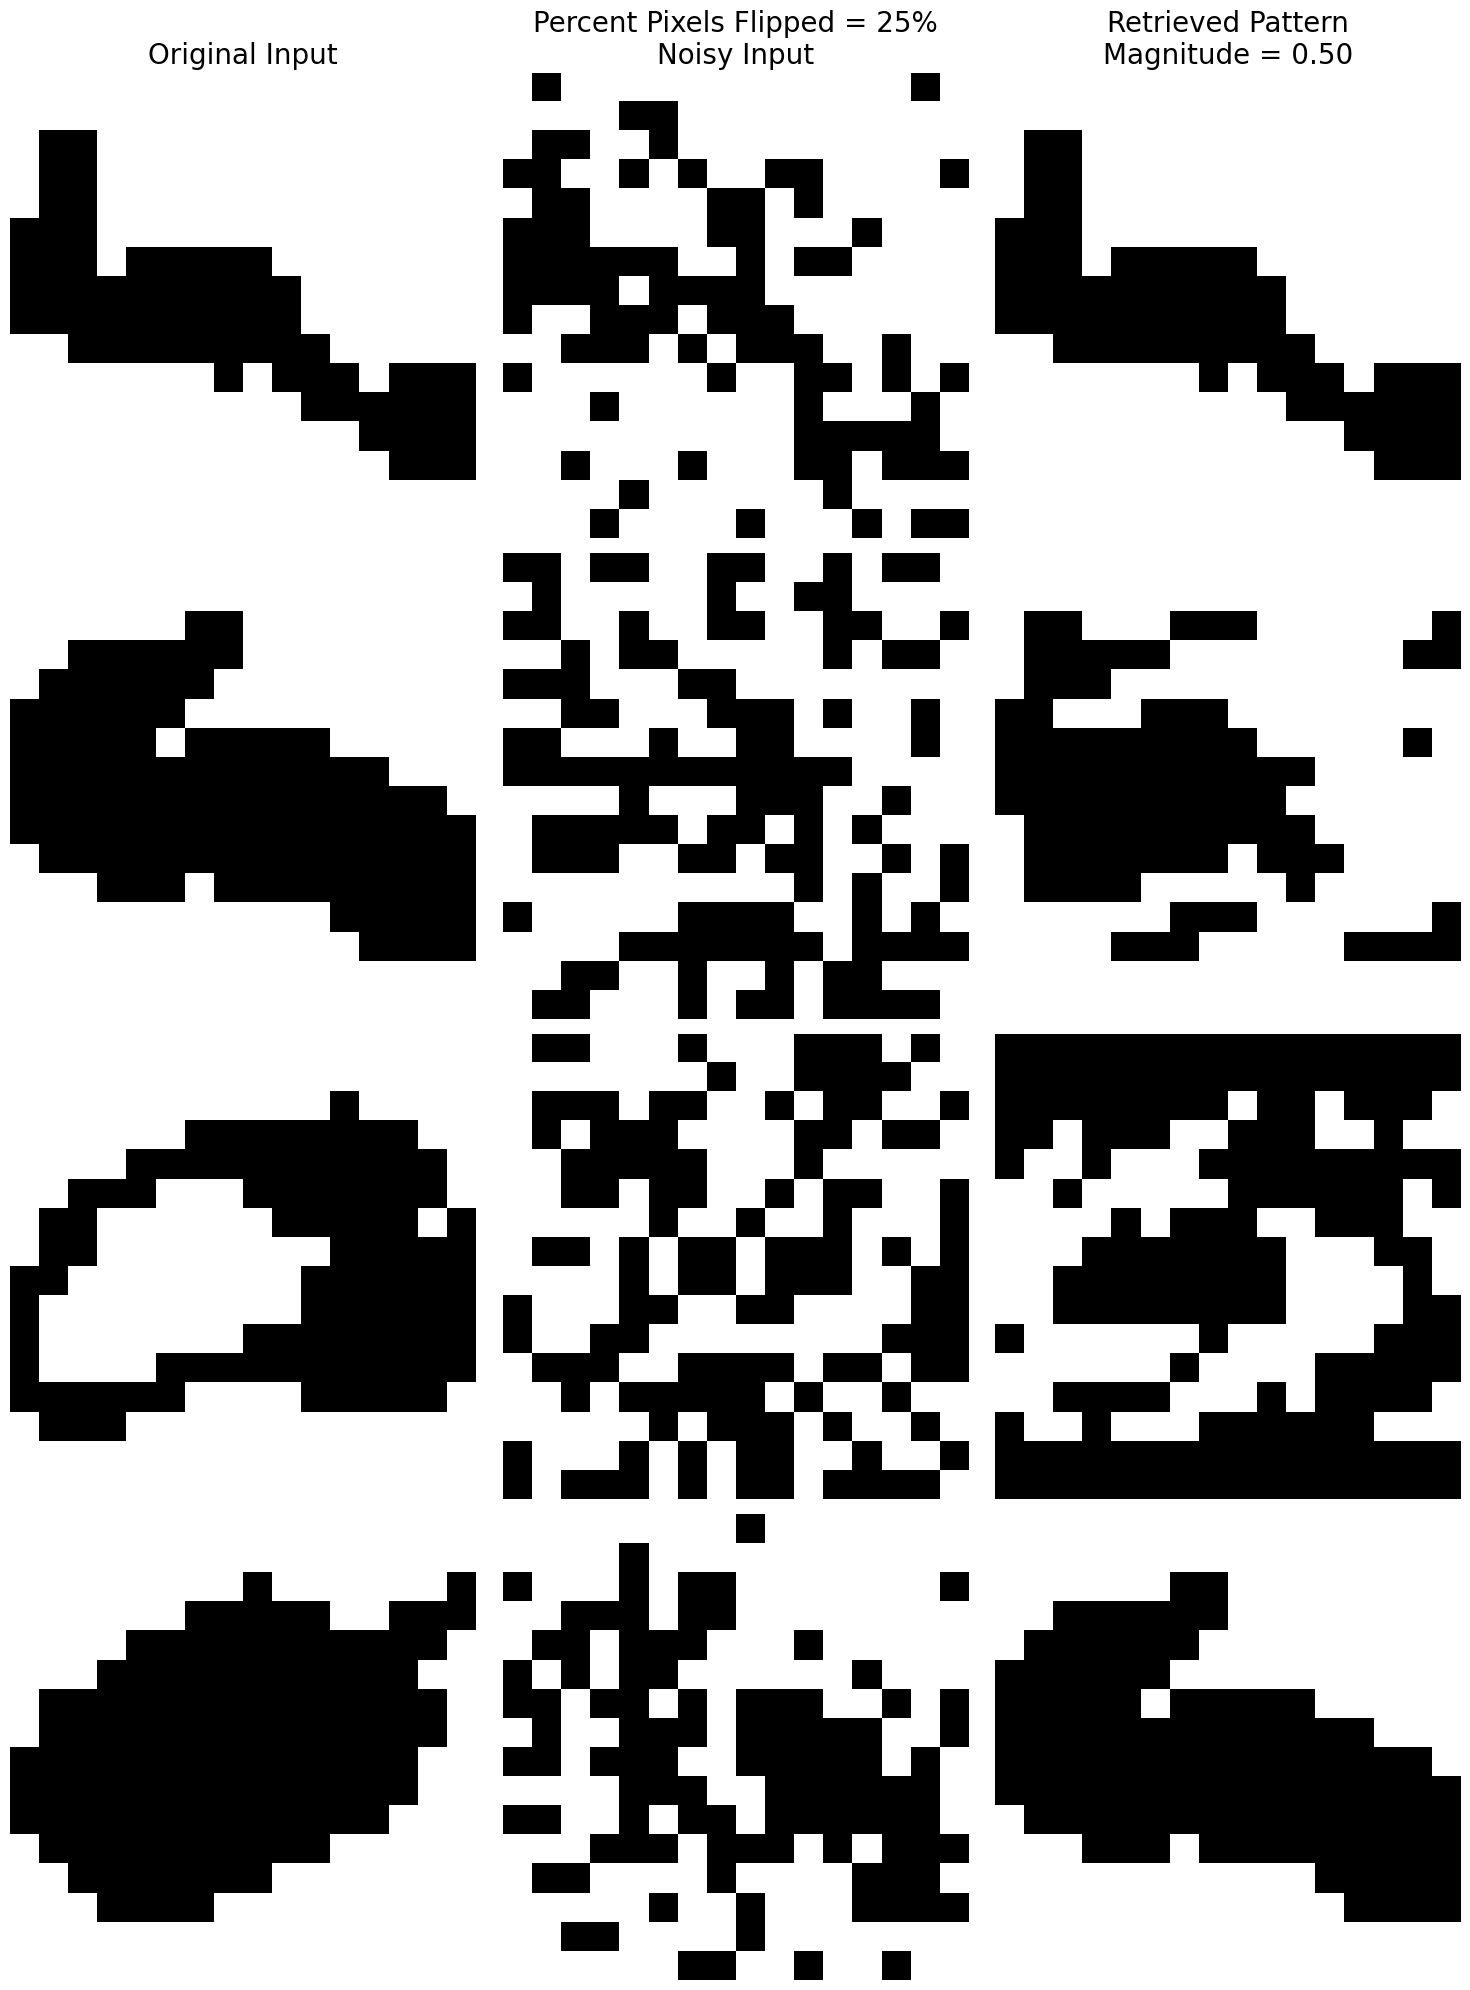

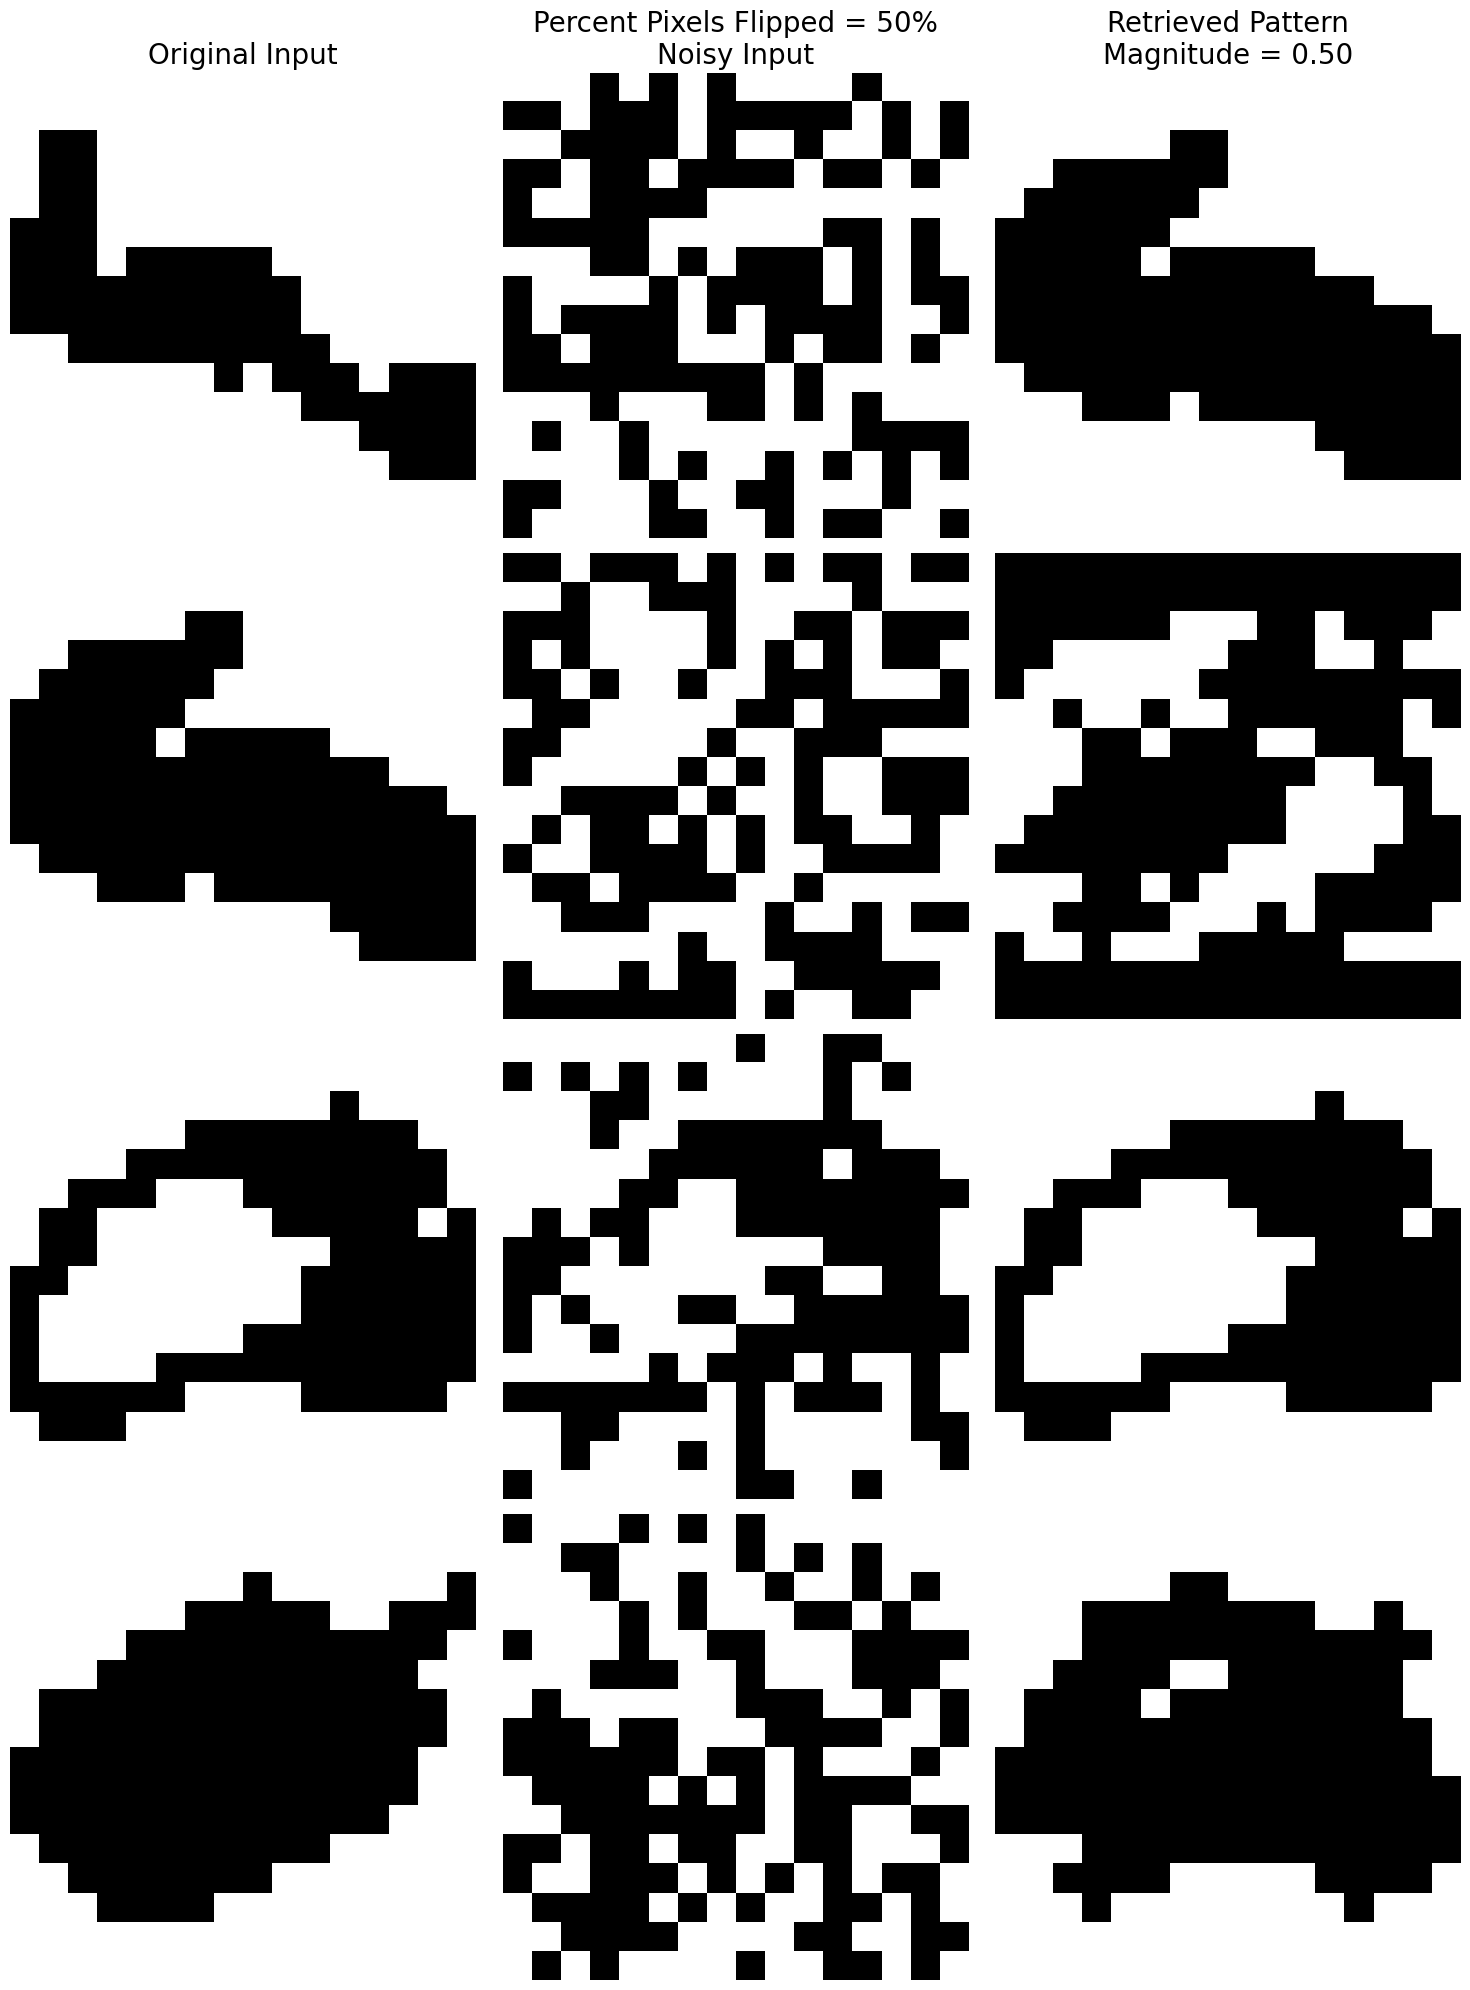

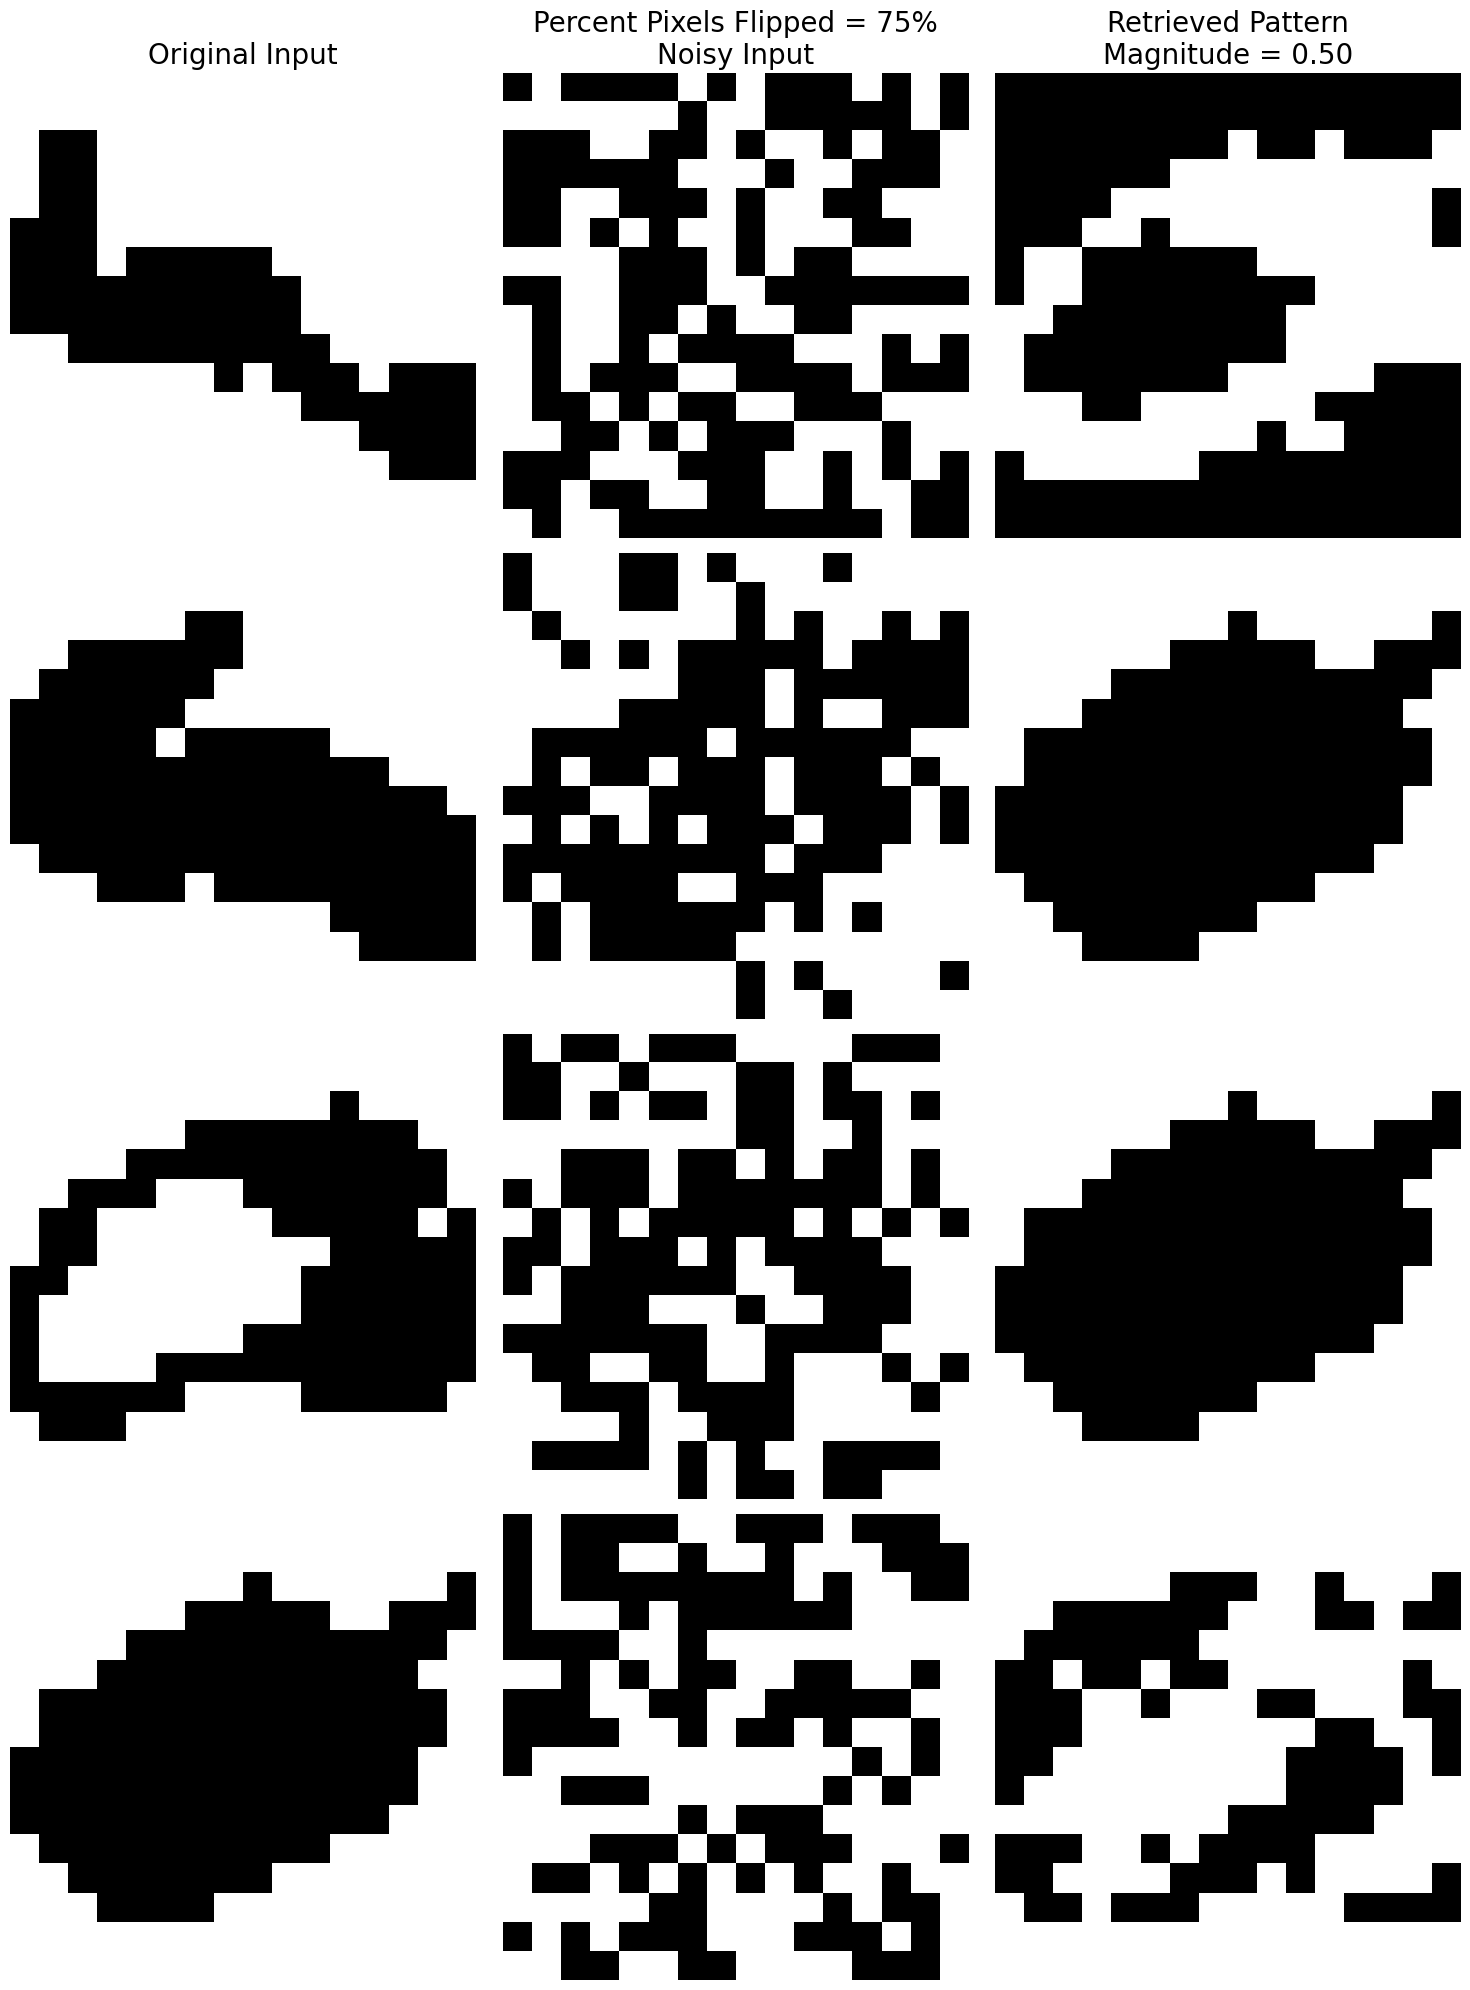

Running trial with a magnitude of 0.75


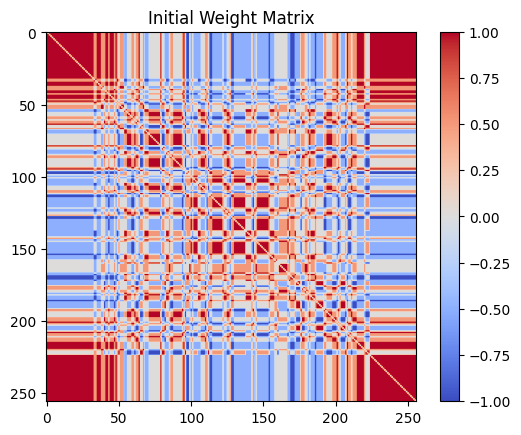

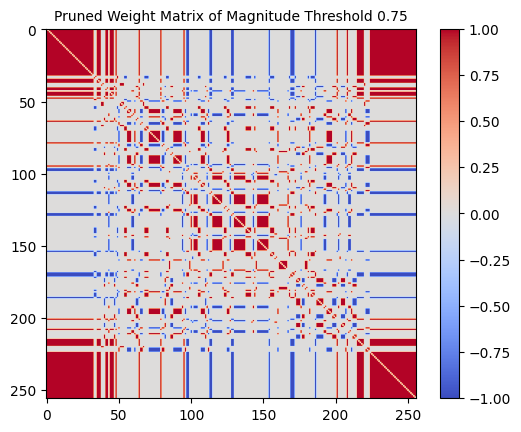

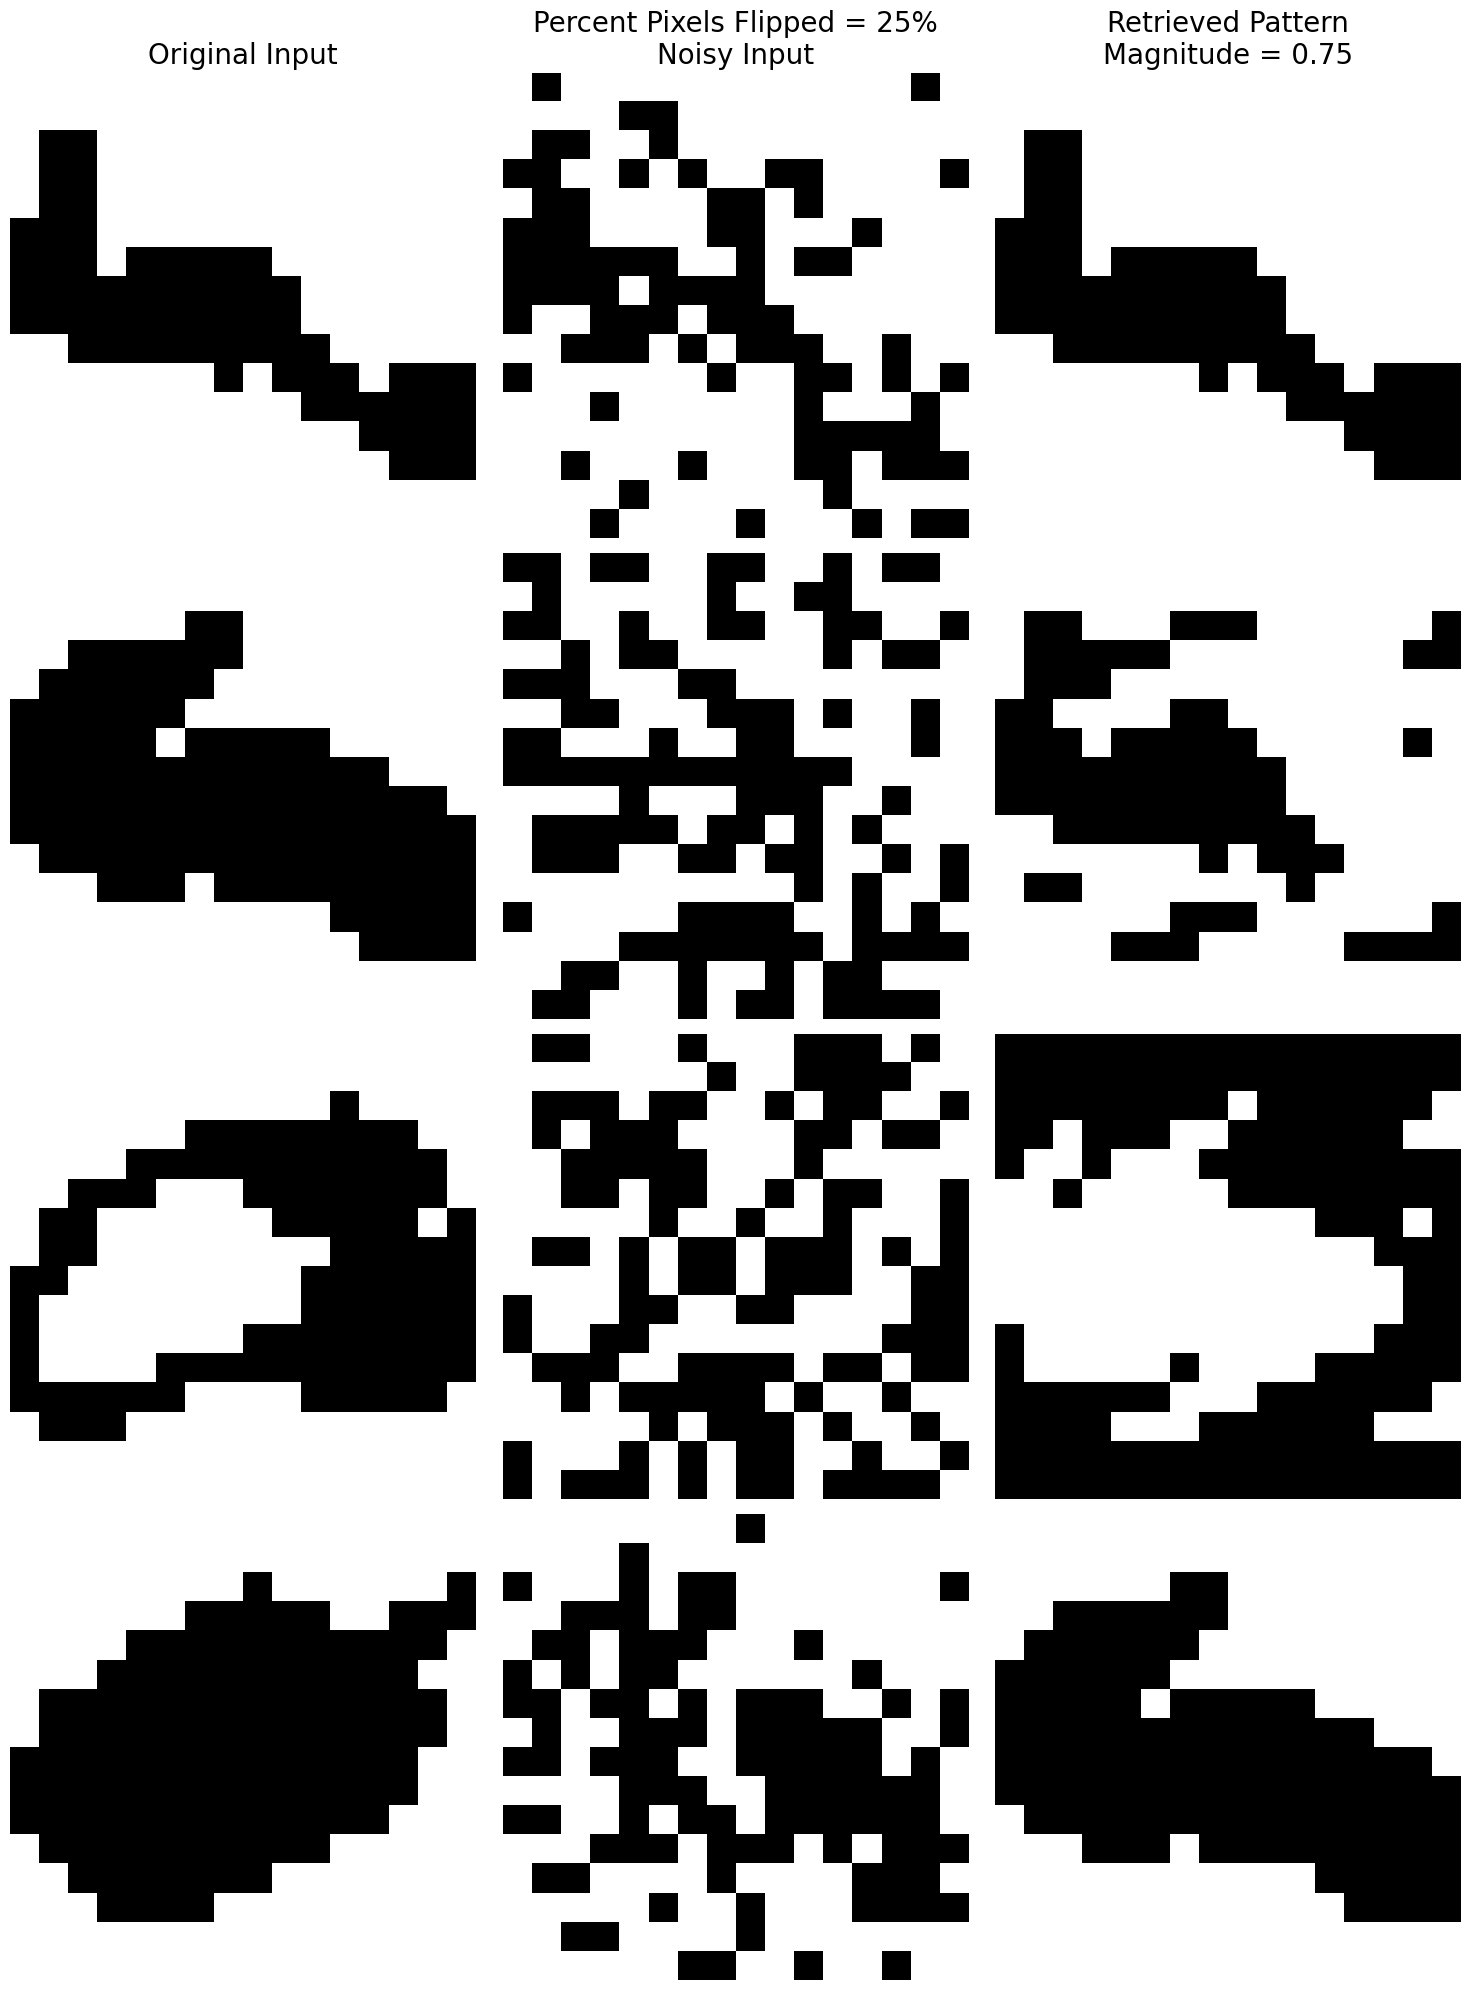

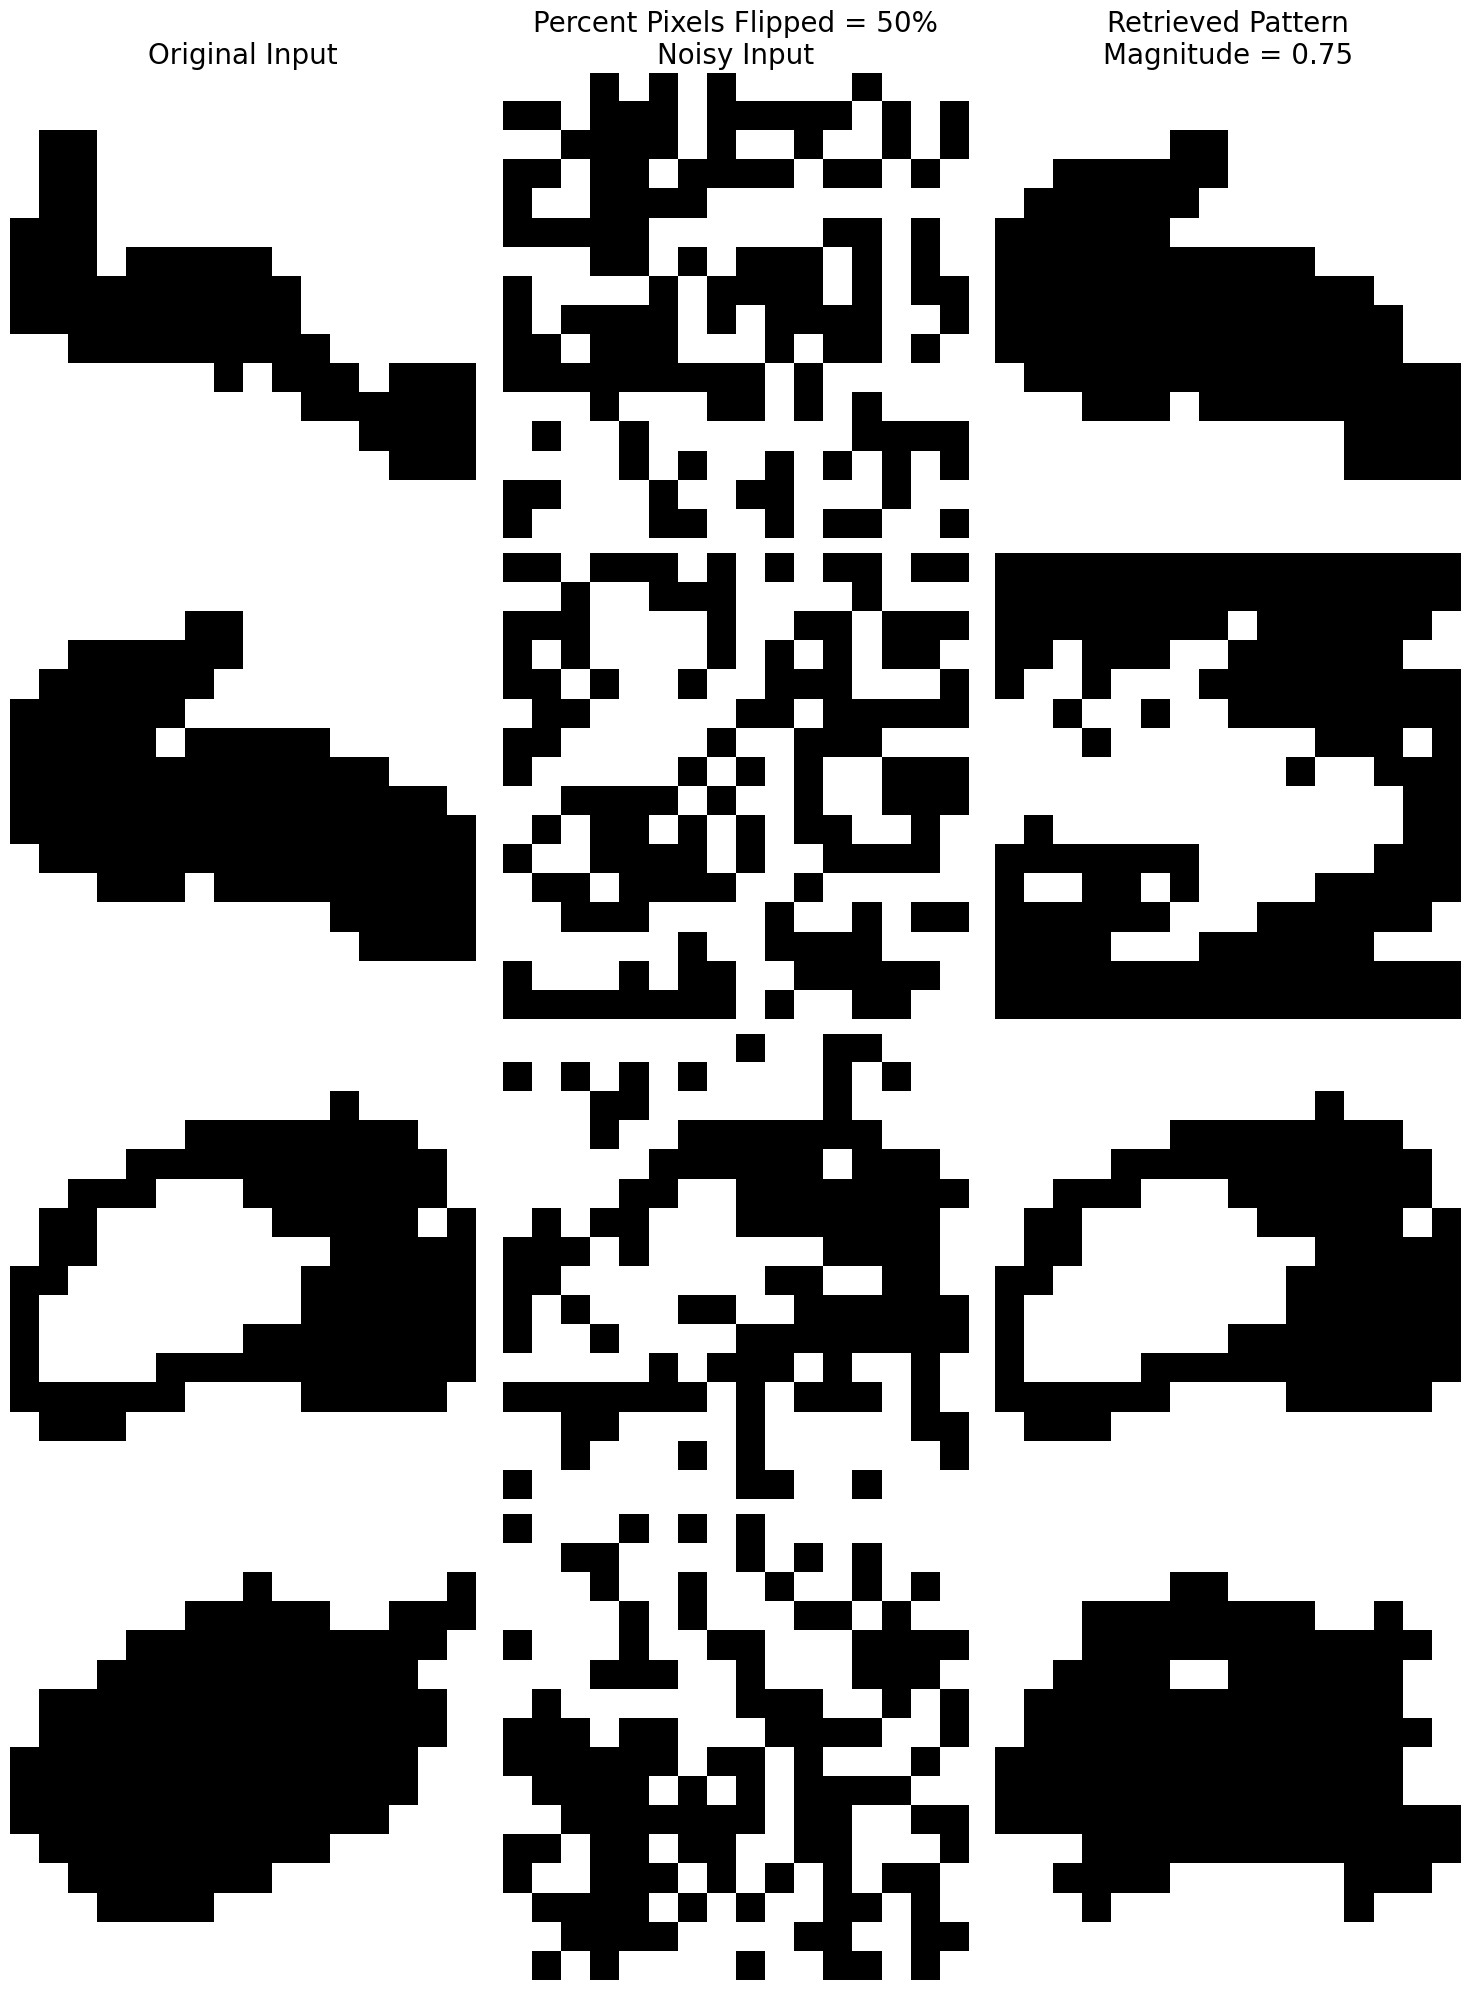

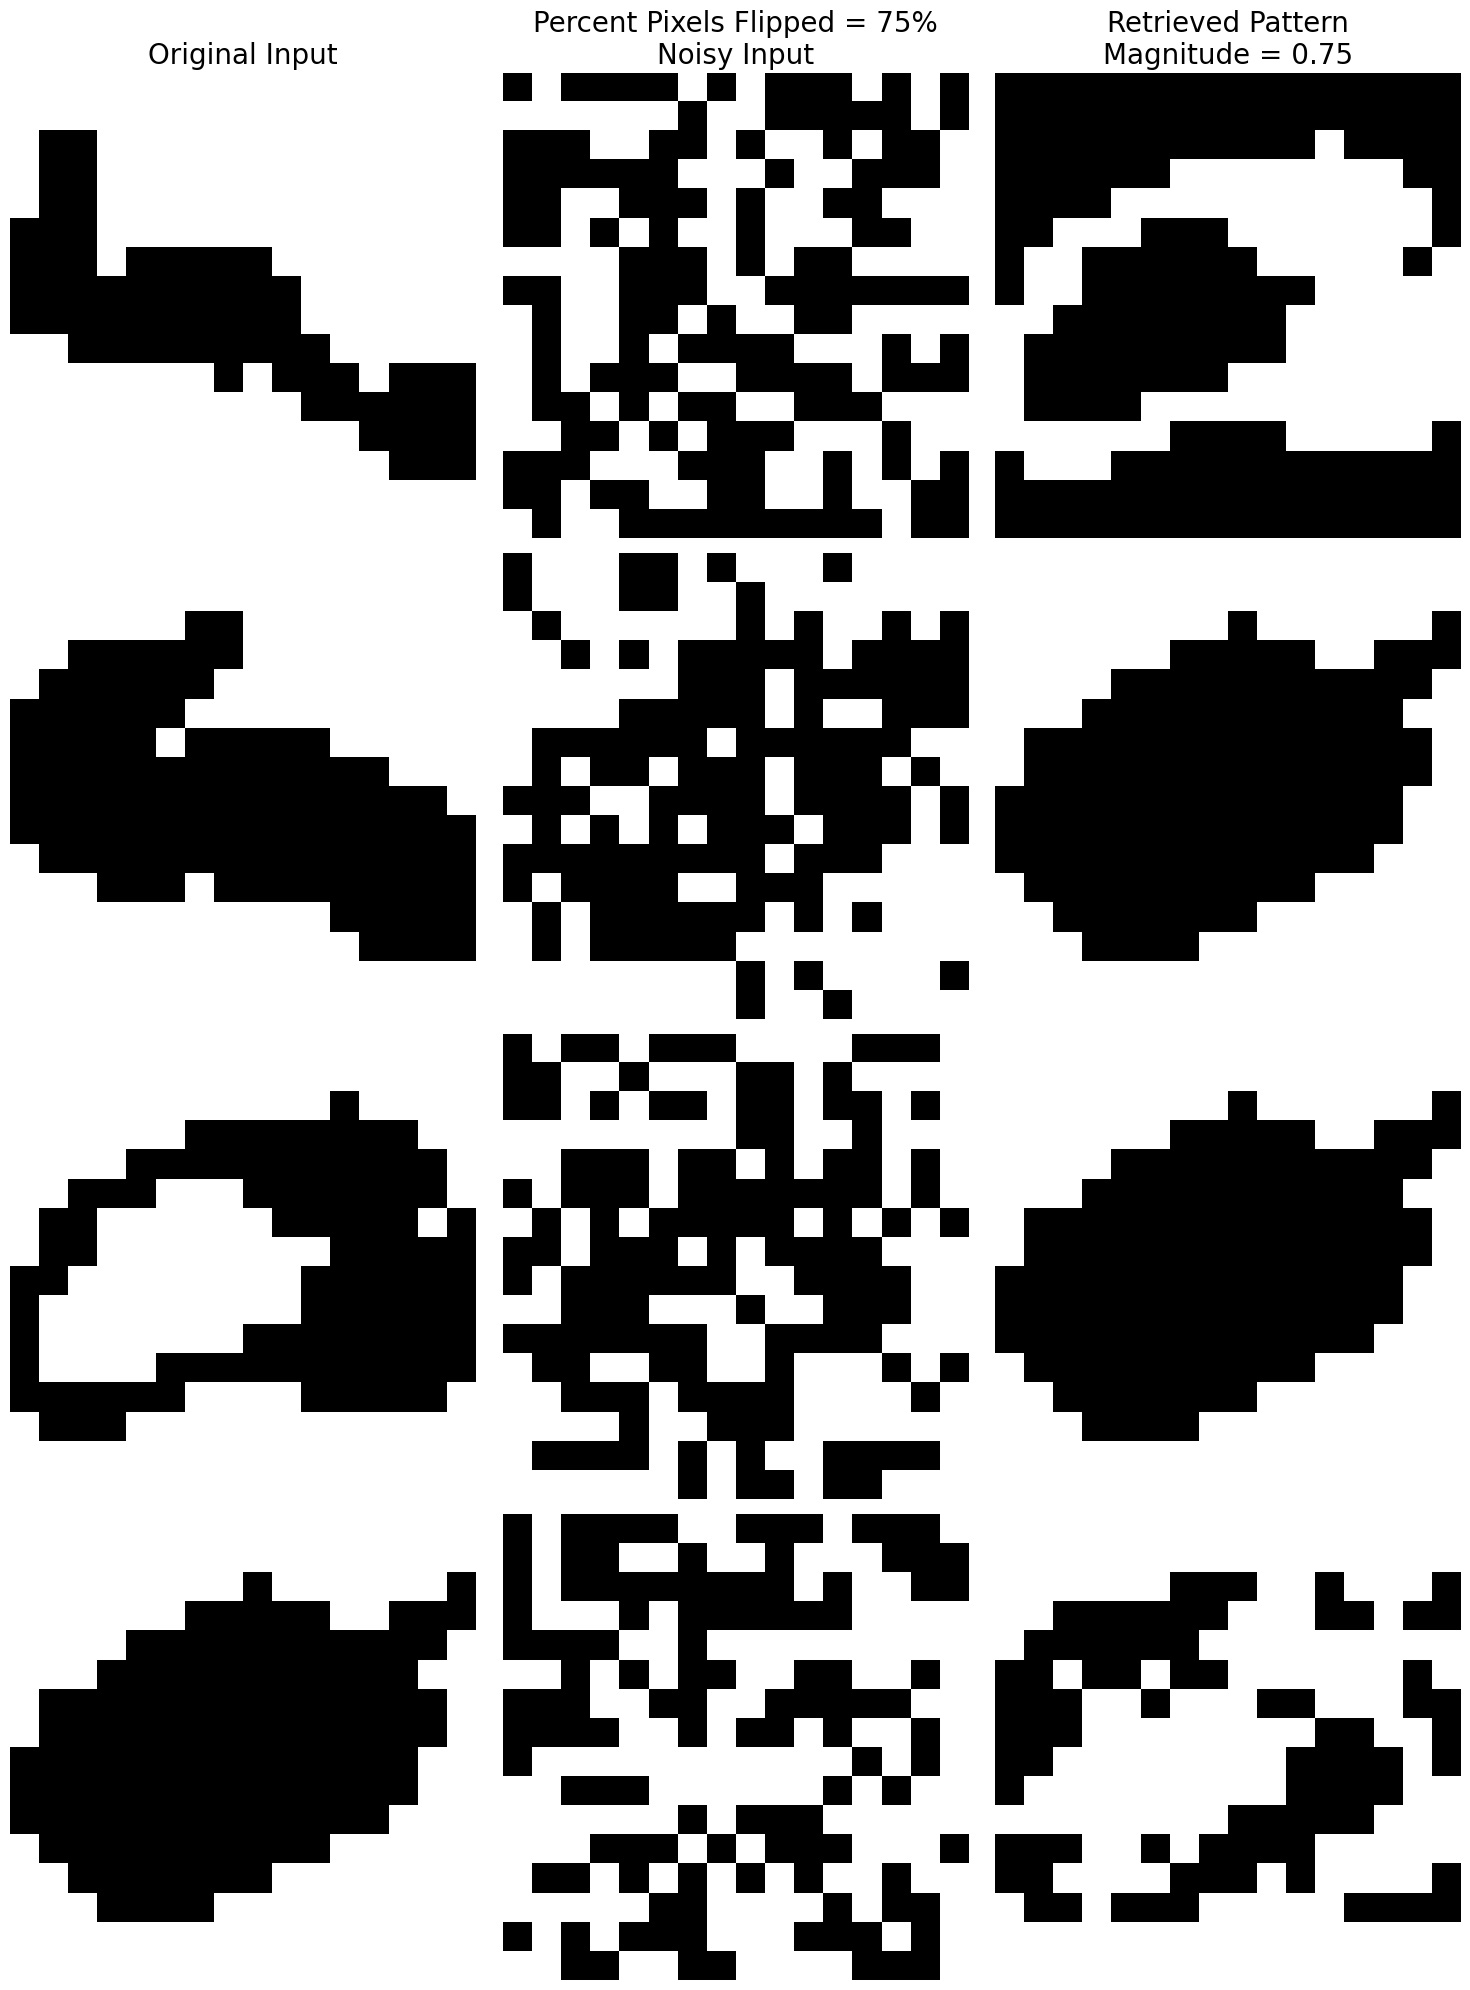

Running trial with a magnitude of 1.00


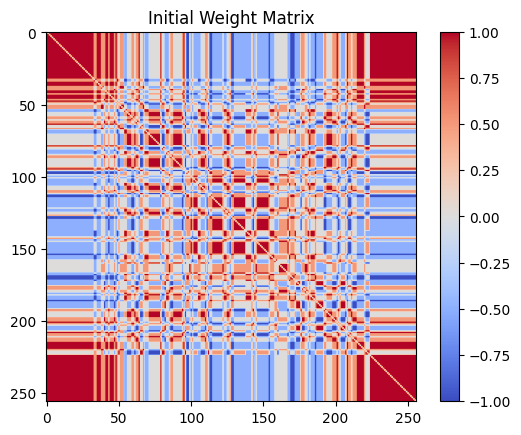

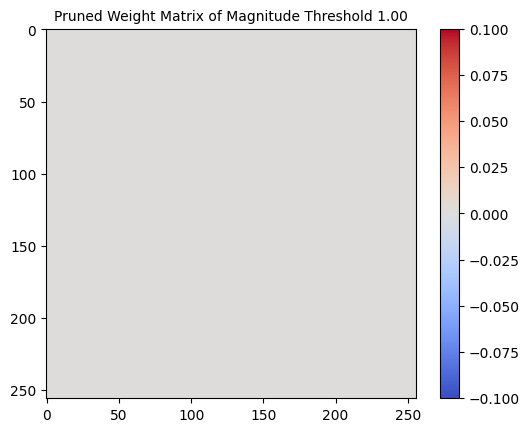

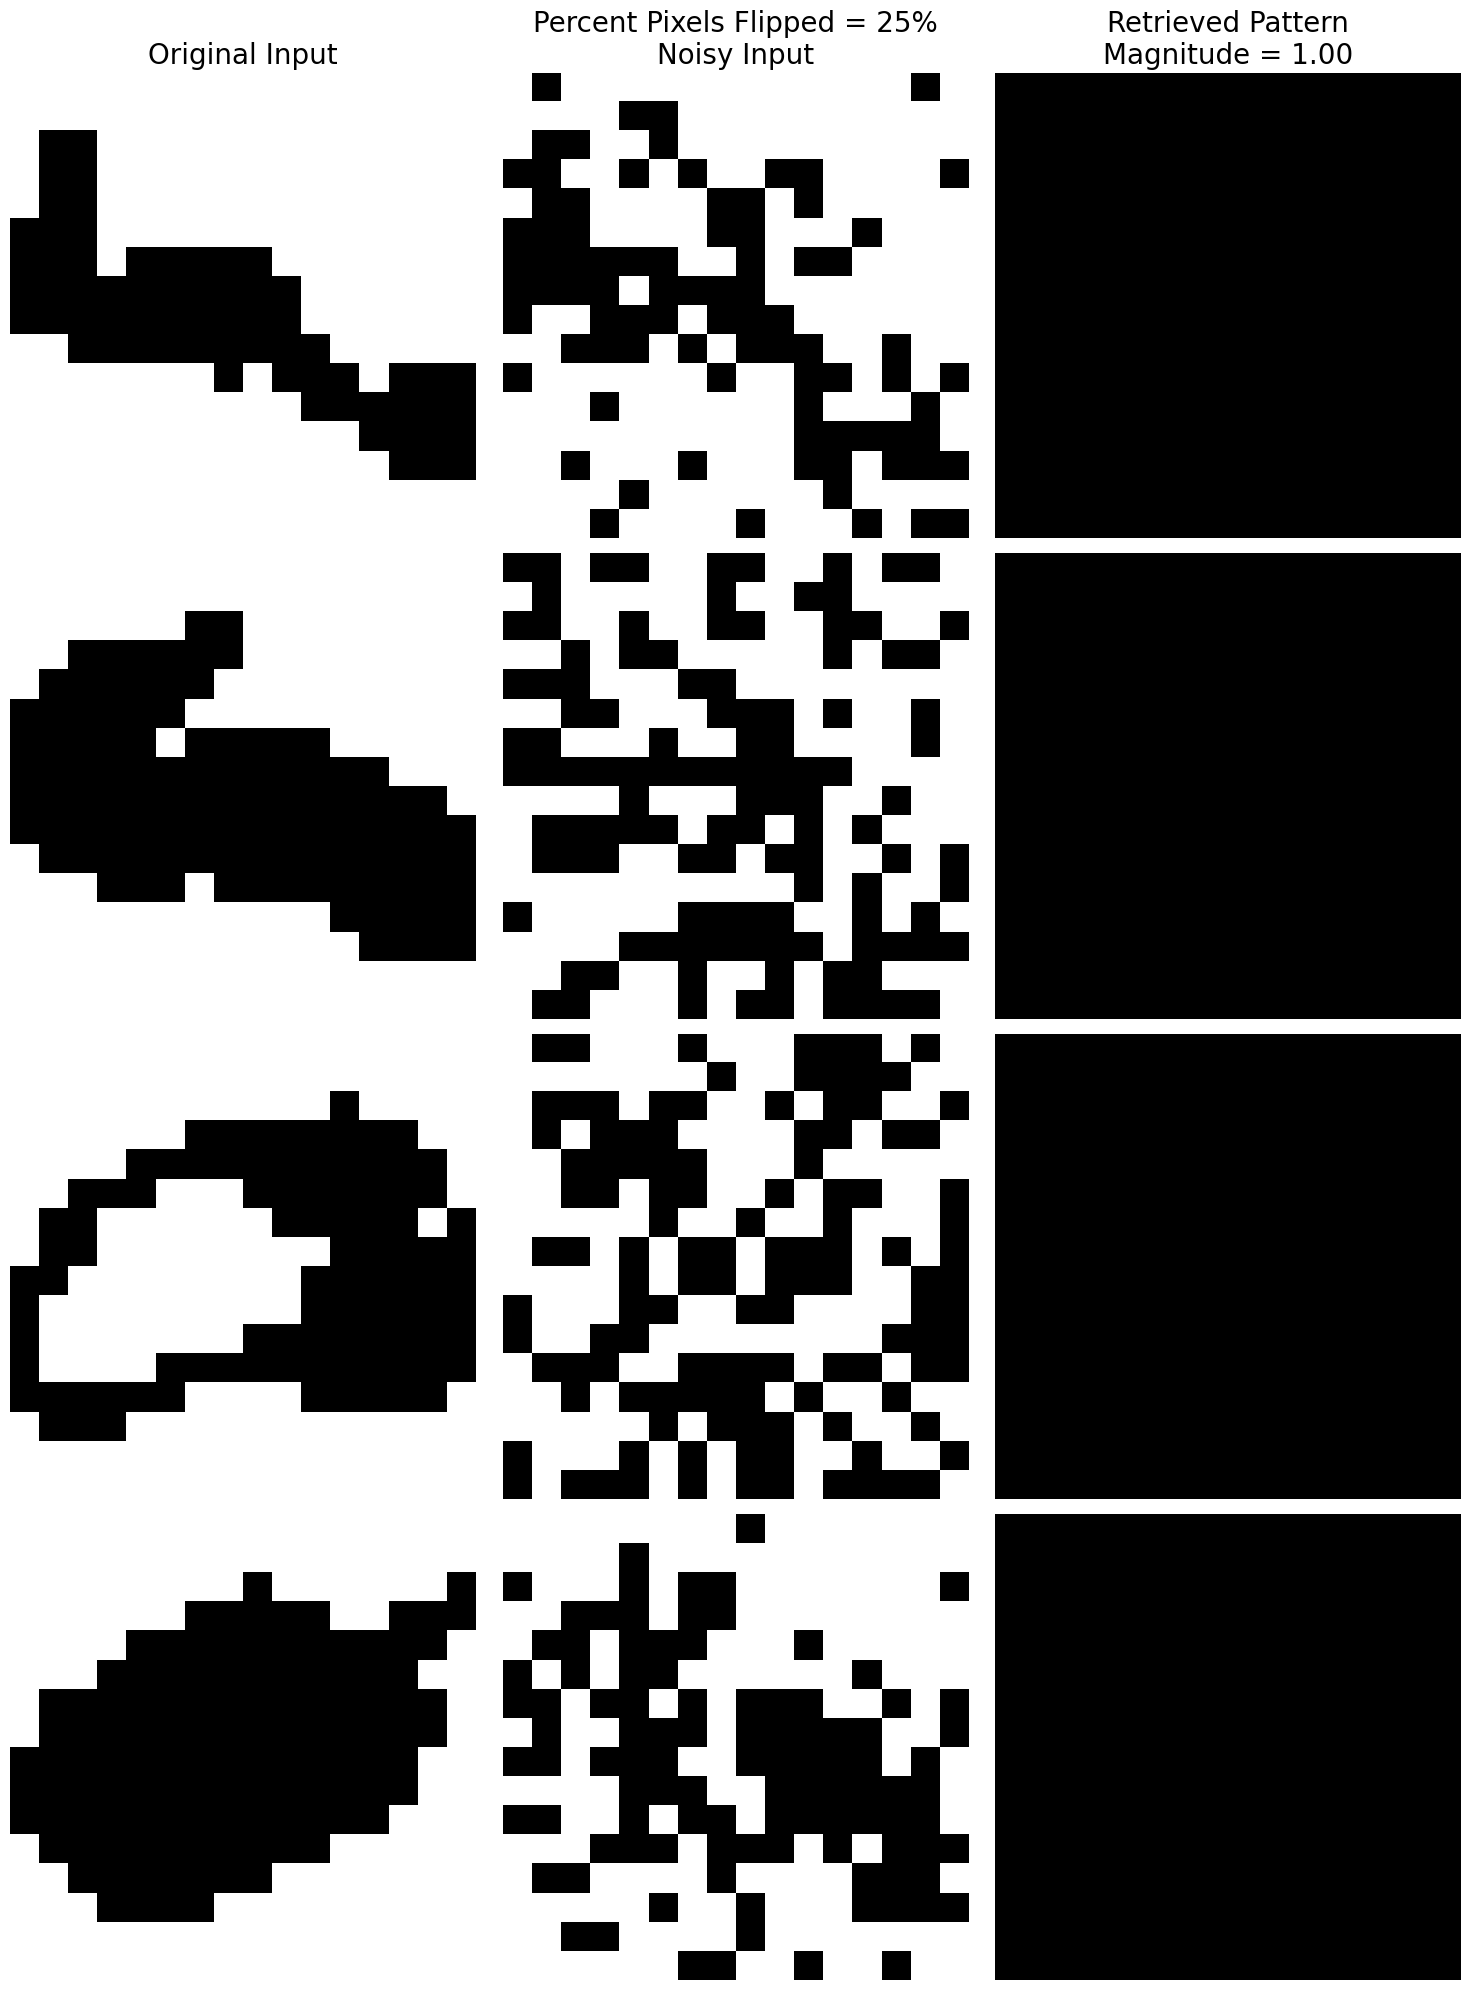

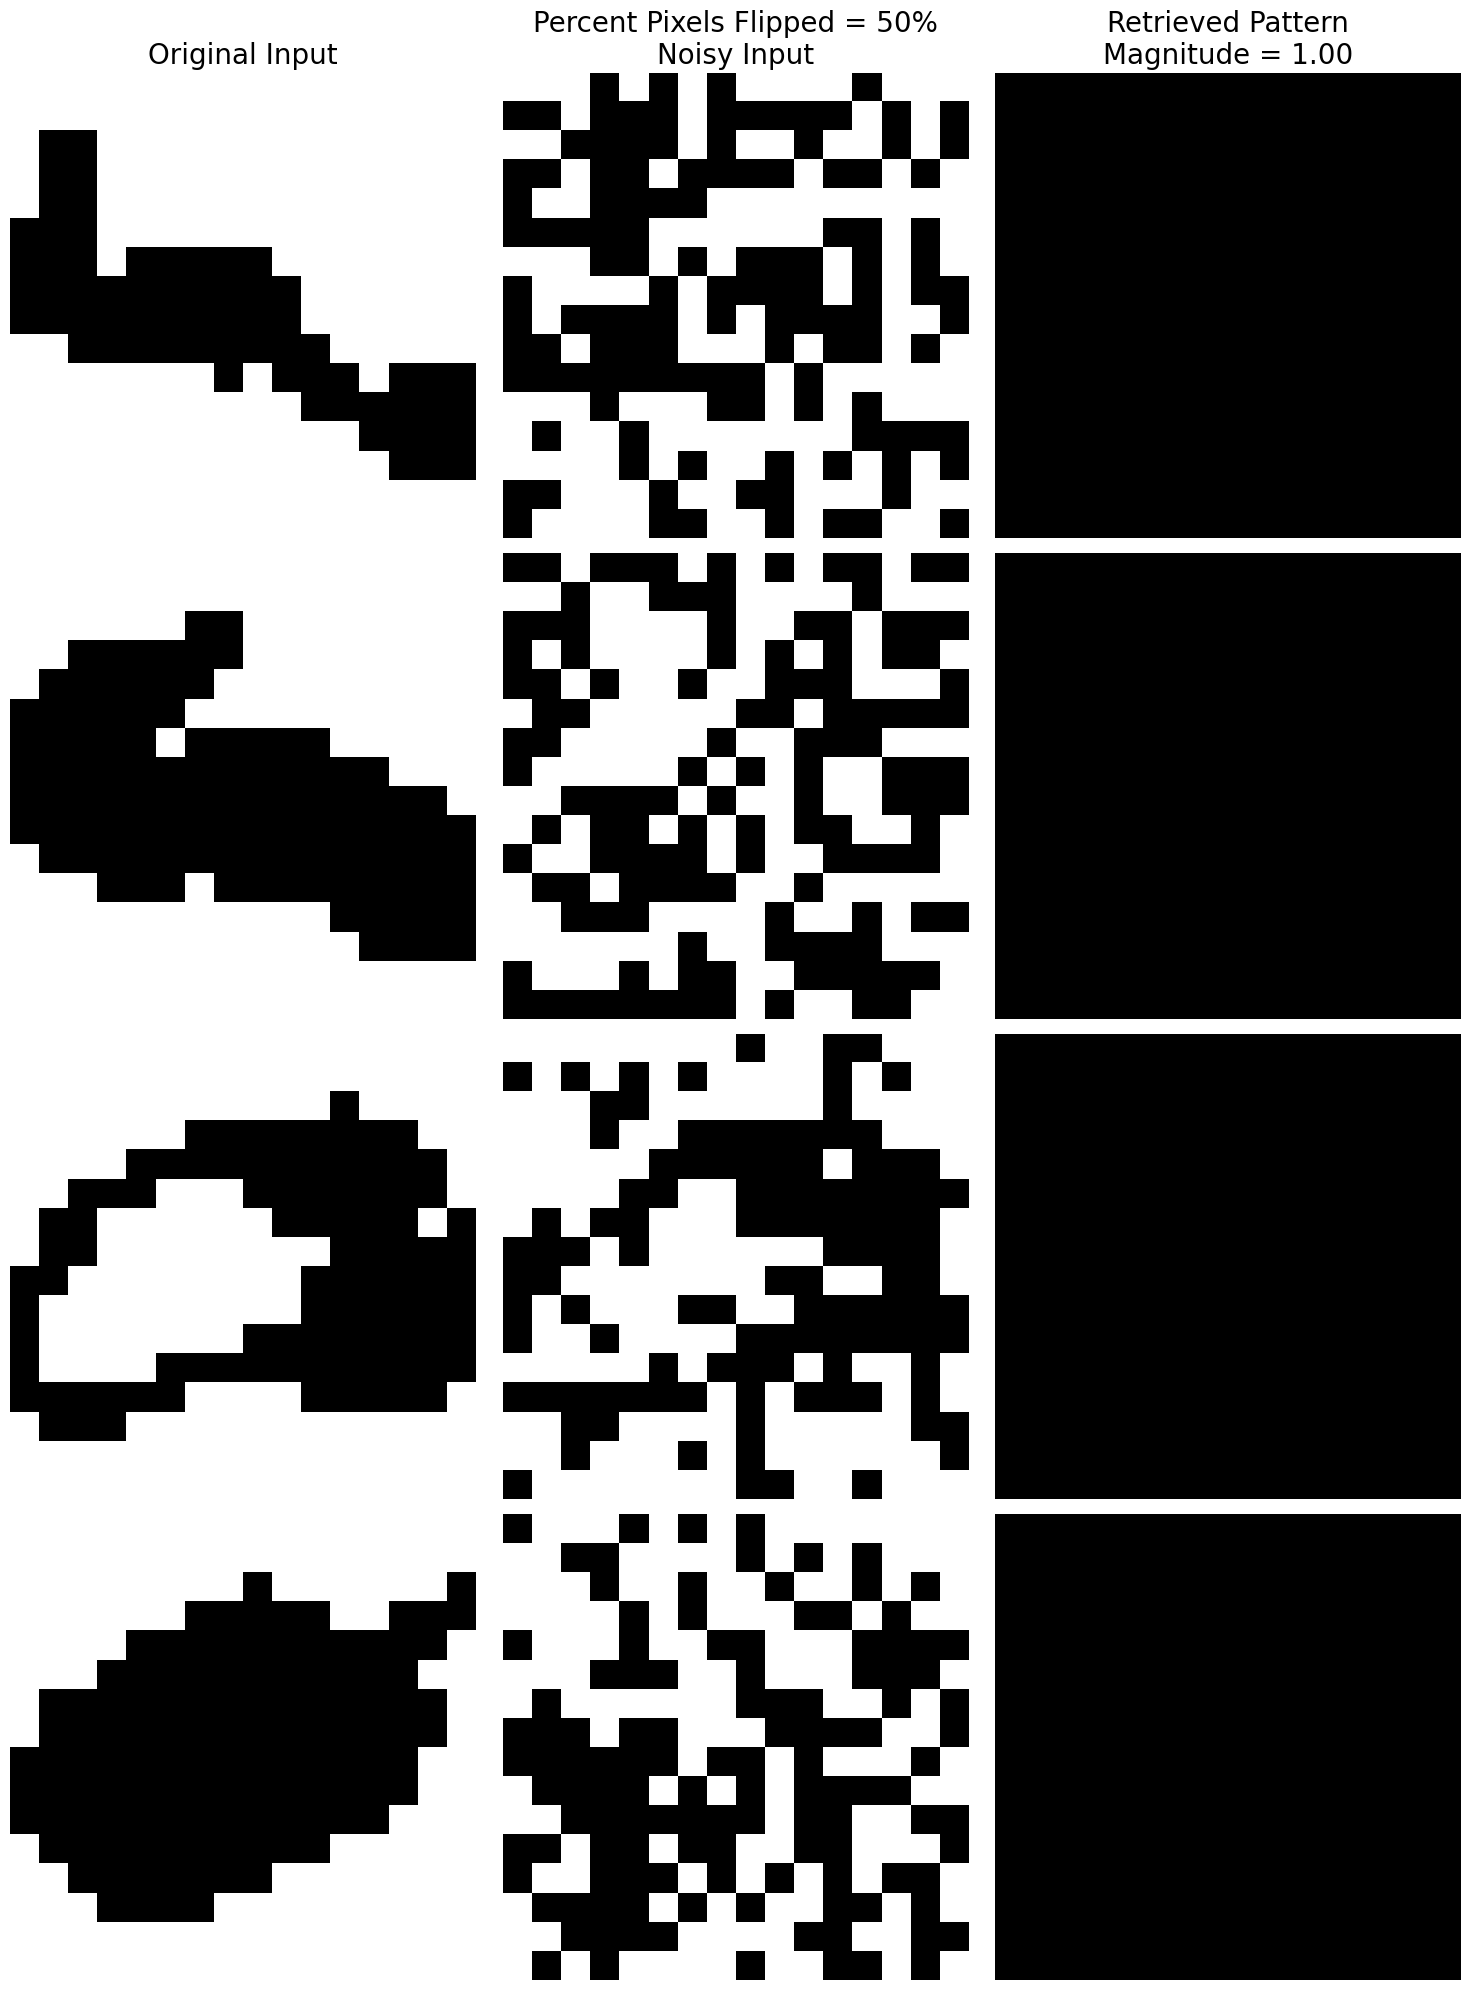

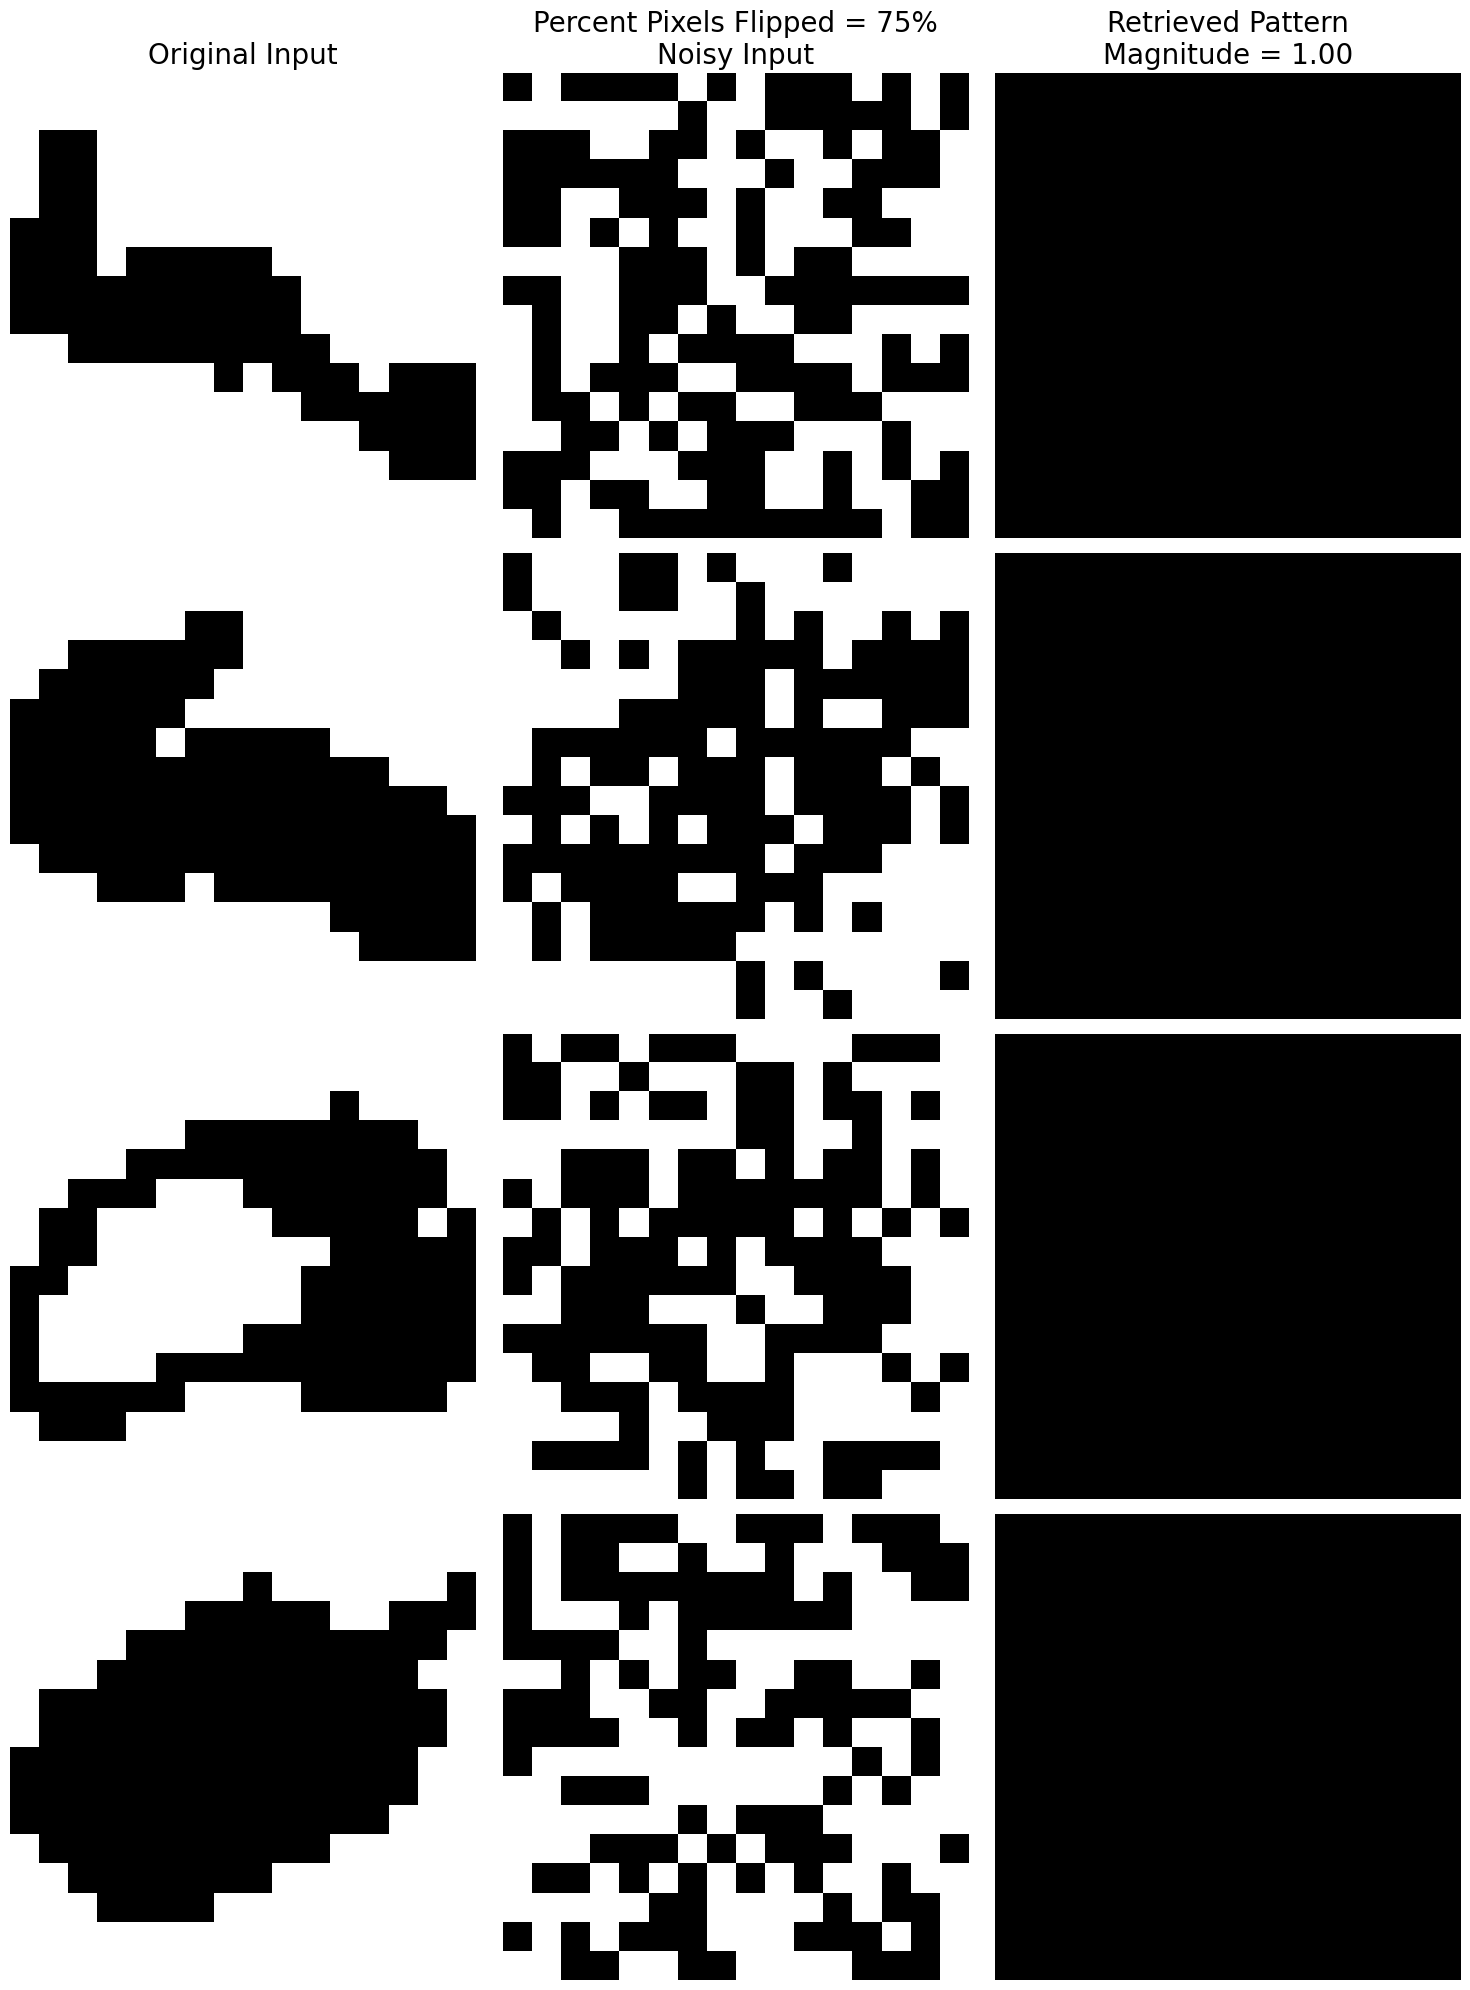

In [17]:
# Run magnitude pruning
positive_unique_weight = torch.unique(weight[weight > 0]).tolist()
print("Unique values in the weight matrix: ", positive_unique_weight)

max_unique_weight = max(positive_unique_weight)
magnitudes_gaps = max_unique_weight / 4
magnitudes = np.arange(0, max_unique_weight + magnitudes_gaps, magnitudes_gaps)

print("Magnitude values: ", magnitudes)

magnitude_pruned_patterns = compare_magnitude_pruning(weight, binary_inputs, noisy_inputs, magnitudes, bias, show_plot=True)

## Magnitude spectrum of how magnitude pruning the weight matrix affects the performance

magnitude spectrum values:  [0.   0.25 0.5  0.75 1.  ]
length of magnitude spectrum:  5
length of binary inputs:  4
magnitudes performance:  {0: [98.4375, 100.0, 100.0, 100.0, 25.78125], 1: [89.0625, 85.9375, 74.21875, 74.6875, 42.96875], 2: [26.8359375, 28.9453125, 60.3515625, 51.328125, 37.109375], 3: [71.484375, 71.484375, 69.140625, 68.75, 47.65625]}


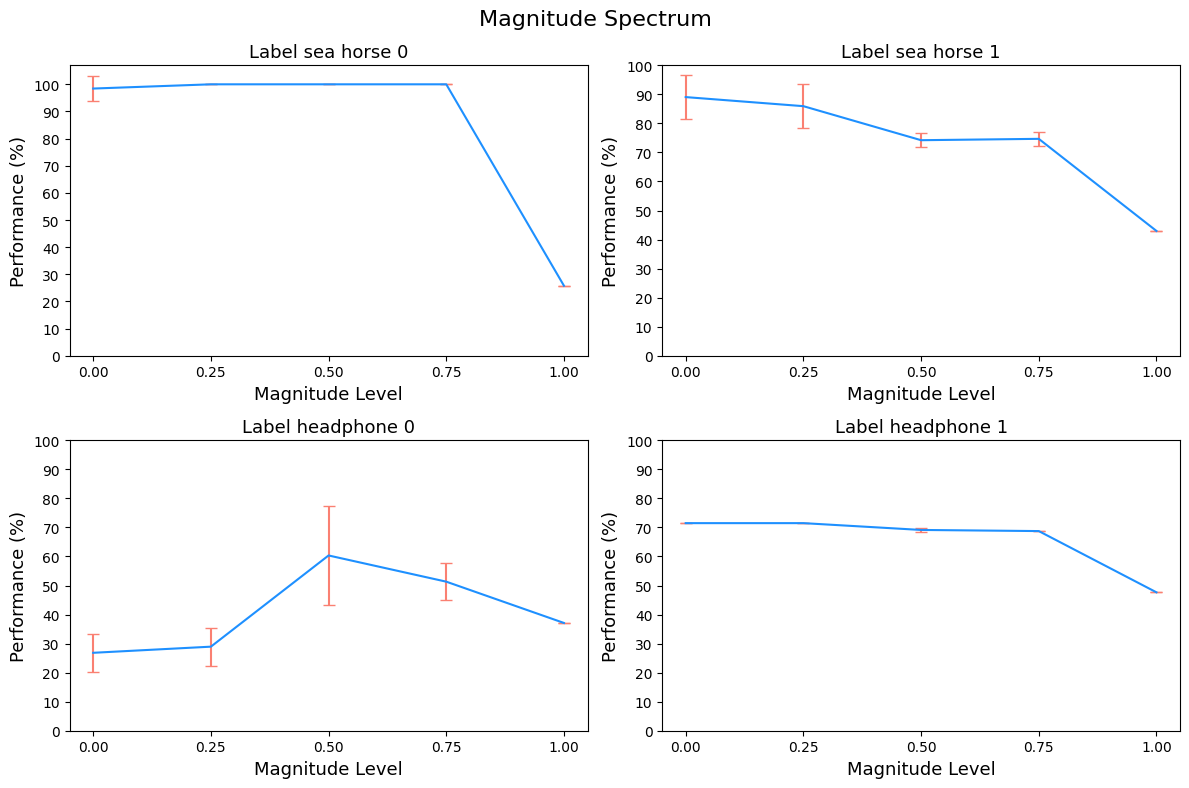

In [18]:
magnitude_spectrum = magnitudes

# Separate the sparsity performace for each input
magnitudes_perf = {i: [] for i in range(len(binary_inputs))}
magnitudes_mean = {i: [] for i in range(len(binary_inputs))}
magnitudes_std = {i: [] for i in range(len(binary_inputs))}


for magnitude in magnitude_spectrum:
    for i, binary_input in enumerate(binary_inputs):
        performances = []
        for _ in range(num_models):
            # Get sparse pruned pattern
            magnitude_pruned_pattern = run_magnitude_pruning(weight, binary_inputs, noisy_inputs, magnitude, bias, show_plot=False)

            magnitude_pruned_pattern = magnitude_pruned_pattern[i]
            
            # Get pruning performance
            perf = pruning_performance(binary_input, magnitude_pruned_pattern)
            performances.append(perf)
        
        magnitudes_perf[i].append(np.mean(performances))
        magnitudes_mean[i].append(np.mean(performances))
        magnitudes_std[i].append(np.std(performances))
        
        
print("magnitudes performance: ", magnitudes_perf)

def plot_magnitudes_spectrum(magnitudes_spectrum, magnitudes_perf, magnitudes_gaps, selected_labels, num_labels, num_images_per_label):
    num_rows = num_labels
    num_cols = num_images_per_label
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 4 * num_rows))
    fig.suptitle('Magnitude Spectrum', fontsize=16)
    
    # Ensure axs is always 2D
    if num_rows == 1 or num_cols == 1:
        axs = np.atleast_2d(axs).reshape(num_rows, num_cols)

    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            mean_perf = magnitudes_mean[idx]
            std_perf = magnitudes_std[idx]
            label = selected_labels[idx]
            
            axs[i, j].errorbar(magnitudes_spectrum, mean_perf, yerr=std_perf, color='dodgerblue', ecolor='salmon', capsize=4)
            
            axs[i, j].set_xlabel('Magnitude Level', fontsize=13)
            axs[i, j].set_xticks(np.arange(0, max_unique_weight + magnitudes_gaps, magnitudes_gaps), fontsize=8)
            axs[i, j].set_ylabel('Performance (%)', fontsize=13)
            axs[i, j].set_yticks(range(0, 101, 10), fontsize=8)
            axs[i, j].set_title(f'Label {label} {j}', fontsize=13)
            axs[i, j].axis('on')

    plt.tight_layout()
    plt.savefig(f"./images/spectrum/magnitude_spectrum.png")
    plt.show()
    plt.close(fig)

plot_magnitudes_spectrum(magnitude_spectrum, magnitudes_perf, magnitudes_gaps, selected_labels, num_labels, num_images_per_label)

In [19]:
def get_sparse_perf(binary_inputs, sparse_pruned_patterns, sparsities):
    sparse_perf = []
    
    for i in range(len(sparse_pruned_patterns)):
        for j in range(len(binary_inputs)):
            sparse_perf.append(pruning_performance(binary_inputs[j], sparse_pruned_patterns[sparsities[i]][j]))
    
    return sparse_perf

def get_magnitude_perf(binary_inputs, magnitude_pruned_patterns, magnitudes):
    """Get the performance of the magnitude pruning method at a single magnitude value"""
    magnitude_perf = []
    
    for i in range(len(magnitude_pruned_patterns)):
        for j in range(len(binary_inputs)):
            magnitude_perf.append(pruning_performance(binary_inputs[j], magnitude_pruned_patterns[magnitudes[i]][j]))
    return magnitude_perf

Running trial with a sparsity of 10
Running trial with a sparsity of 20
Running trial with a sparsity of 30
Running trial with a sparsity of 40
Running trial with a sparsity of 50
Running trial with a sparsity of 60
Running trial with a sparsity of 70
Running trial with a sparsity of 80
Running trial with a sparsity of 90
9 12


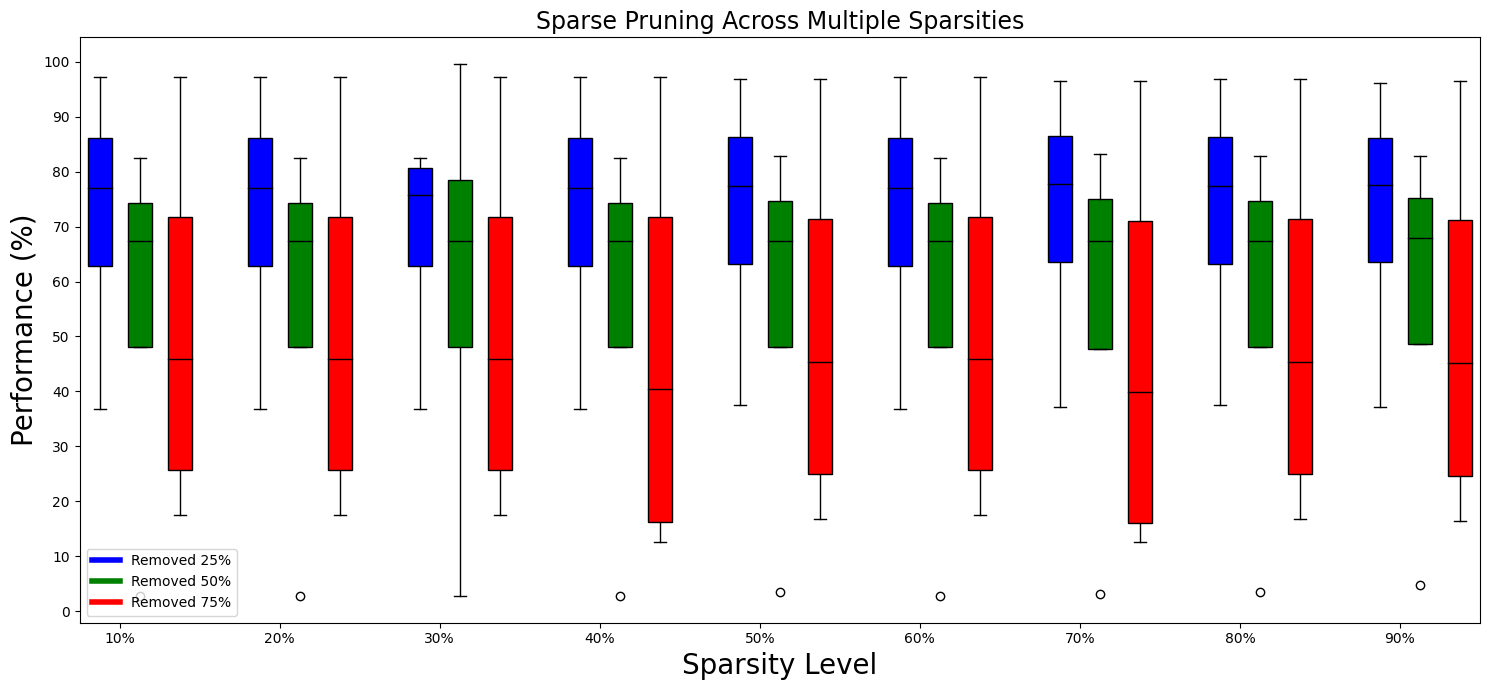

In [27]:
# Sparse pruning comparison
pruning_methods = ['Sparse Pruning']

flipped_percents = [25, 50, 75]
sparsity_interval = 10
sparsities = list(range(10, 100, sparsity_interval))
groups = [
    {pruning_method: [[] for _ in flipped_percents] for pruning_method in pruning_methods} for _ in range(len(sparsities))
]

sparse_pruned_patterns = compare_sparse_pruning(weight, binary_inputs, noisy_inputs, sparsities, bias, show_plot=False)
print(len(sparse_pruned_patterns), len(noisy_inputs))

# Get list of tuples of sparsities and pruned patterns
sparse_pruned_patterns_list = list(sparse_pruned_patterns.items())

for i in range(len(sparsities)):
    for j in range(len(flipped_percents)):
        # Get the pruned pattern
        sparsity, pruned_pattern = sparse_pruned_patterns_list[i]
        pruned_pattern = pruned_pattern[j:j + len(binary_inputs)]
        sparse_pruned_pat = {sparsity: pruned_pattern}
        
        sparse_perf = get_sparse_perf(binary_inputs, sparse_pruned_pat, [sparsities[i]])
        groups[i]['Sparse Pruning'][j] = sparse_perf

labels = [f"{sparsity}%" for sparsity in sparsities]

fig, ax = plt.subplots(figsize=(15, 7))

# Create the grouped boxplot
positions = []
data = []
colors = ['blue', 'green', 'red']

for i, group in enumerate(groups):
    for j, perc in enumerate(flipped_percents):
        positions.append(i * (len(flipped_percents) + 1) + j + 1)
        data.append(group['Sparse Pruning'][j])
    
box = ax.boxplot(data, positions=positions, patch_artist=True, widths=0.6)

# Color the boxes
for patch, color in zip(box['boxes'], colors * len(sparsities)):
    patch.set_facecolor(color)

# Set the median line color to black
for median in box['medians']:
    median.set_color('black')

# Set the labels for the x axis
ax.set_xticks([i * (len(flipped_percents) + 1) + 1.5 for i in range(len(sparsities))])
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticks(np.arange(0, 101, 10))

# Set the labels for the boxplot
ax.set_xlabel('Sparsity Level', fontsize=20)
ax.set_ylabel('Performance (%)', fontsize=20)
ax.set_title('Sparse Pruning Across Multiple Sparsities', fontsize=17)

# Legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
legend_labels = [f"Removed {perc}%" for perc in flipped_percents]
ax.legend(handles, legend_labels, loc='lower left', fontsize='medium')

# Show the plot
plt.tight_layout()
plt.savefig(f"./images/comparison/sparse_pruning_comparison.png")
plt.show()
plt.close(fig)

Running trial with a magnitude of 0.00
Running trial with a magnitude of 0.10
Running trial with a magnitude of 0.20
Running trial with a magnitude of 0.30
Running trial with a magnitude of 0.40
Running trial with a magnitude of 0.50
Running trial with a magnitude of 0.60
Running trial with a magnitude of 0.70
Running trial with a magnitude of 0.80
Running trial with a magnitude of 0.90
Running trial with a magnitude of 1.00


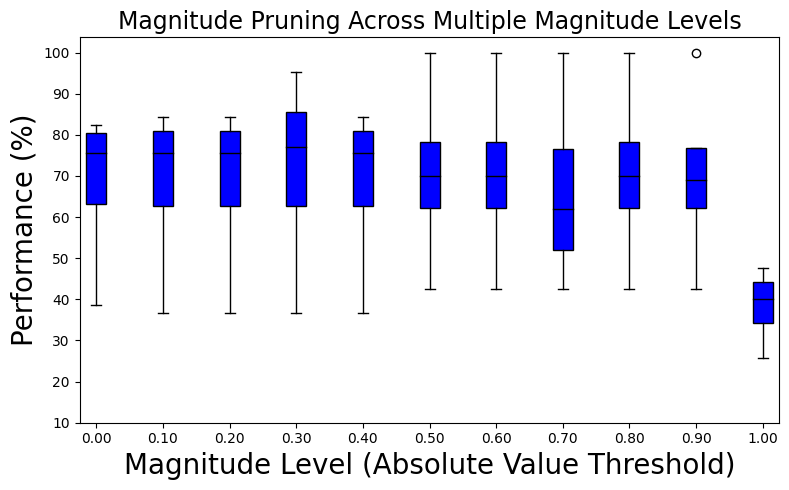

In [28]:
# Magnitude pruning comparison
pruning_methods = ['Magnitude Pruning']
magnitude_gaps = 0.1
magnitudes = np.arange(0, max_unique_weight + magnitude_gaps, magnitude_gaps)
groups = [
    {pruning_method: [] for pruning_method in pruning_methods} for _ in range(len(magnitudes))
]

magnitude_pruned_patterns = compare_magnitude_pruning(weight, binary_inputs, noisy_inputs, magnitudes, bias, show_plot=False)

# Get list of tuples of sparsities and pruned patterns
magnitude_pruned_patterns_list = list(magnitude_pruned_patterns.items())

for i in range(len(magnitudes)):
    magnitude, pruned_pattern = magnitude_pruned_patterns_list[i]
    magn_pruned_pat = {magnitude: pruned_pattern}
    
    magnitude_perf = get_magnitude_perf(binary_inputs, magn_pruned_pat, [magnitudes[i]])
    groups[i]['Magnitude Pruning'] = magnitude_perf

labels = [f"{magnitude:.2f}" for magnitude in magnitudes]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Create the grouped boxplot
for i, group in enumerate(groups):
    positions = np.arange(len(pruning_methods)) + i * (len(pruning_methods) + 1)
    box_data = [group[method] for method in pruning_methods]
    
    box = ax.boxplot(box_data, positions=positions, patch_artist=True, widths=0.6)
    
    # Color the boxes blue
    for patch in box['boxes']:
        patch.set_facecolor('blue')
    
    # Set the median line color to black
    for median in box['medians']:
        median.set_color('black')

# Set the labels for the x-axis
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticks(np.arange(10, 101, 10), fontsize=10)

# Set the labels for the boxplot
ax.set_xlabel('Magnitude Level (Absolute Value Threshold)', fontsize=20)
ax.set_ylabel('Performance (%)', fontsize=20)
ax.set_title('Magnitude Pruning Across Multiple Magnitude Levels', fontsize=17)

# Show the plot
plt.tight_layout()
plt.savefig(f"./images/comparison/magnitude_pruning_comparison.png")
plt.show()
plt.close(fig)

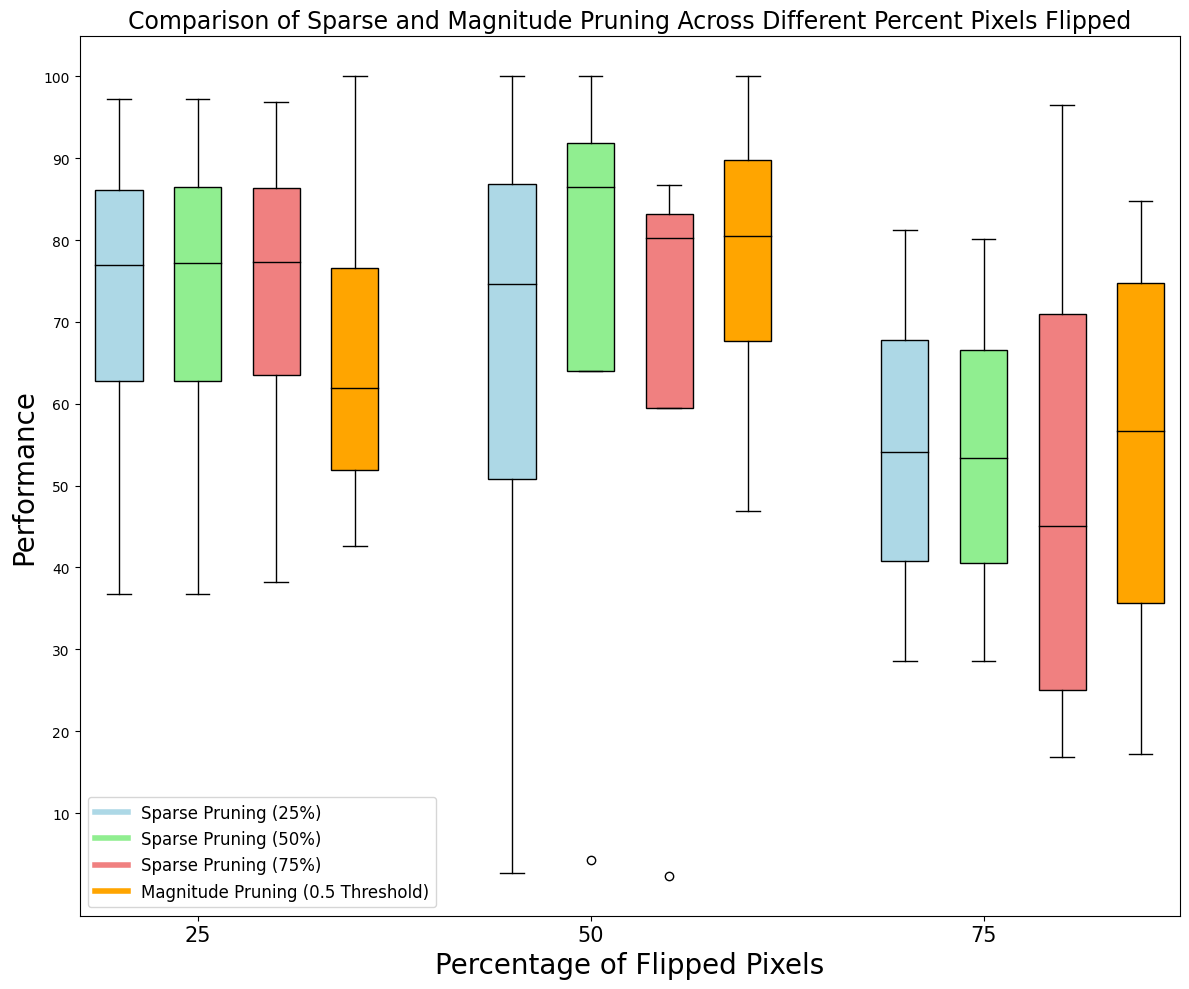

In [26]:
# Boxplot: Comparison of Sparse and Magnitude Pruning Across Different Pixel Flipped Percentages

flipped_percents_interval = 25
flipped_percents = list(range(flipped_percents_interval, 100, flipped_percents_interval))

sparsities = [25, 50, 75]
magnitudes = positive_unique_weight
magnitudes = magnitudes[:-1]

sparse_pruning_methods = ['Sparse Pruning (25%)', 'Sparse Pruning (50%)', 'Sparse Pruning (75%)']
magnitude_pruning_methods = [f'Magnitude Pruning ({magnitude} Threshold)' for magnitude in magnitudes]
pruning_methods = sparse_pruning_methods + magnitude_pruning_methods

groups = [
    {pruning_method: [] for pruning_method in pruning_methods} for _ in range(len(flipped_percents))
]

noisy_inputs = []

# Get noisy inputs
for i in range(len(binary_inputs)):
    for j in range(len(flipped_percents)):
        noisy_inputs.append(flip_pixels(binary_inputs[i], flipped_percents[j]))

for i in range(len(flipped_percents)):
    noisy_group = noisy_inputs[i * len(binary_inputs) : (i + 1) * len(binary_inputs)]
    
    # Get sparse performances
    for sparsity in sparsities:
        # Get the sparse pruned pattern
        sparse_pruned_pat = run_sparse_pruning(weight, binary_inputs, noisy_group, sparsity, bias, show_plot=False)
        sparse_pruned_pat = {sparsity: sparse_pruned_pat}
        sparse_perf = get_sparse_perf(binary_inputs, sparse_pruned_pat, [sparsity])
        groups[i][f'Sparse Pruning ({sparsity}%)'] = sparse_perf
    
    # Get magnitude performances
    for magnitude in magnitudes:
        # Get the magnitude median pruned pattern
        magn_median_pruned_pat = run_magnitude_pruning(weight, binary_inputs, noisy_group, magnitude, bias, show_plot=False)
        magn_pruned_pat = {magnitude: magn_median_pruned_pat}
        magn_perf = get_magnitude_perf(binary_inputs, magn_pruned_pat, [magnitude])
        groups[i][f'Magnitude Pruning ({magnitude} Threshold)'] = magn_perf

labels = [f"{percent}" for percent in flipped_percents]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'orange']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Create the grouped boxplot
for i, group in enumerate(groups):
    # Create a boxplot for each pruning method in the group
    positions = np.arange(len(pruning_methods)) + i * (len(pruning_methods) + 1)
    box_data = [group[method] for method in pruning_methods]
    
    box = ax.boxplot(box_data, positions=positions, widths=0.6, patch_artist=True)
    
    # Set colors
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    for median in box['medians']:
        median.set_color('black')

# Set the labels for the x-axis
ax.set_xticks(np.arange(len(labels)) * (len(pruning_methods) + 1) + 1, fontsize=15)
ax.set_xticklabels(labels, fontsize=15)
ax.set_yticks(np.arange(10, 101, 10))

# Set the labels for the boxplot
ax.set_xlabel('Percentage of Flipped Pixels', fontsize=20)
ax.set_ylabel('Performance', fontsize=20)
ax.set_title('Comparison of Sparse and Magnitude Pruning Across Different Percent Pixels Flipped', fontsize=17)

# Create a legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(handles, pruning_methods, loc='lower left', fontsize='large')

# Show the plot
plt.tight_layout()
plt.savefig(f"./images/comparison/comparison_flipped_percents.png")
plt.show()
plt.close(fig)